# Symmetric molecules analysis summary
- There are 609 fully symmetric molesules
- logP is bigger among symmetric molecules on the average

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
from rdkit import Chem, DataStructs
from scipy import stats
from rdkit.Chem import AllChem

DATA_PATH = "../data/3_final_data/"

In [2]:
data = pd.read_csv(DATA_PATH + "logp_wo_averaging.csv")

In [3]:
data

smiles  logP
0                      BrC(Br)(Br)Br  3.42
1                  BrC1C2CC3C(C2)C13  3.11
2                      BrC1CC2CCC1C2  3.54
3                         BrC1CCCCC1  3.20
4                        BrC=C(Br)Br  3.20
...                              ...   ...
13772                       c1ncncn1 -0.73
13773                     c1nn[nH]n1 -0.60
13774  c1nnn(C23CC4CC(CC(C4)C2)C3)n1  2.95
13775    c1nnnn1C12CC3CC(CC(C3)C1)C2  2.95
13776       n1onc2c1NC1Nc3nonc3NC1N2  0.30

[13777 rows x 2 columns]

In [4]:
mols = [Chem.MolFromSmiles(s) for s in data.smiles]

In [7]:
values_list = [pd.Series(Chem.CanonicalRankAtoms(mol, breakTies=False)).value_counts() for mol in mols]

In [43]:
symmetry_list = [(len(values) - 1 <= len(values[values % 2 == 0])) or (len(values) - 1 <= len(values[(values % 2 == 1) & (values > 1)])) for values in values_list]

In [44]:
symmetry_data = data[symmetry_list]

In [45]:
not_symmetry_data = data[[not e for e in symmetry_list]]

In [46]:
symmetry_data

smiles  logP
0                     BrC(Br)(Br)Br  3.42
5                 BrCC(CBr)(CBr)CBr  3.99
7                           BrCCCBr  2.37
8                    BrCCCCCCCCCCBr  6.12
12     Brc1c(Br)c(Br)c(Br)c(Br)c1Br  6.07
...                             ...   ...
13762                       c1cnon1  0.16
13764   c1csc(-c2ccc(-c3cccs3)s2)c1  5.57
13765             c1csc(-c2cccs2)c1  3.75
13772                      c1ncncn1 -0.73
13776      n1onc2c1NC1Nc3nonc3NC1N2  0.30

[609 rows x 2 columns]

BrC(Br)(Br)Br
[0, 4, 0, 0, 0]


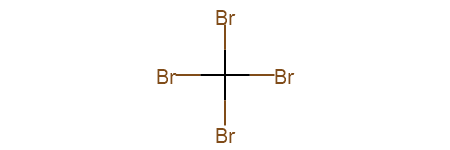

BrCC(CBr)(CBr)CBr
[0, 4, 8, 4, 0, 4, 0, 4, 0]


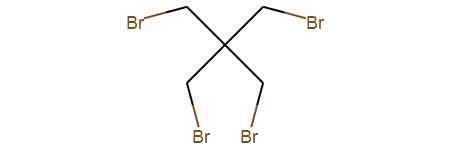

BrCCCBr
[0, 2, 4, 2, 0]


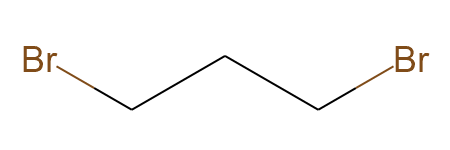

BrCCCCCCCCCCBr
[0, 2, 4, 6, 8, 10, 10, 8, 6, 4, 2, 0]


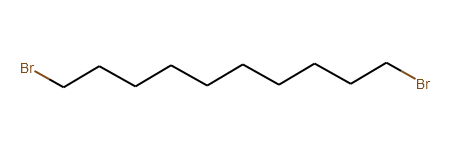

Brc1c(Br)c(Br)c(Br)c(Br)c1Br
[0, 6, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0]


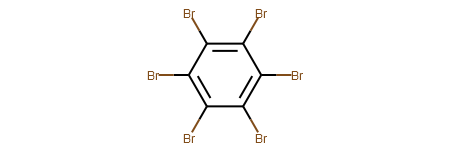

Brc1cc(Br)c(-c2c(Br)cc(Br)cc2Br)c(Br)c1
[0, 10, 6, 12, 2, 16, 16, 12, 2, 6, 10, 0, 6, 12, 2, 12, 2, 6]


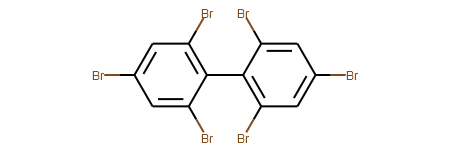

Brc1cc(Br)c(Br)c(-c2c(Br)c(Br)cc(Br)c2Br)c1Br
[0, 10, 8, 10, 0, 14, 4, 18, 18, 14, 4, 10, 0, 8, 10, 0, 14, 4, 14, 4]


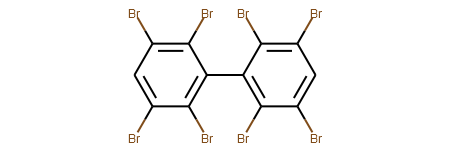

Brc1cc(Br)c(Br)cc1Br
[0, 6, 4, 6, 0, 6, 0, 4, 6, 0]


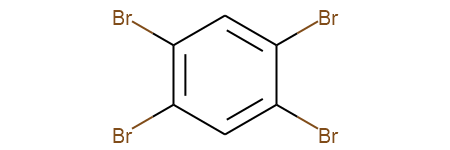

Brc1cc(Br)cc(Br)c1
[0, 6, 3, 6, 0, 3, 6, 0, 3]


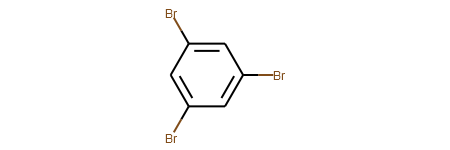

Brc1cc2oc3cc(Br)c(Br)cc3c2cc1Br
[0, 9, 4, 13, 8, 13, 4, 9, 0, 11, 2, 6, 15, 15, 6, 11, 2]


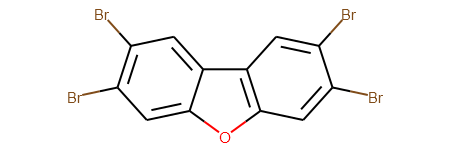

Brc1ccc(-c2ccc(Br)cc2)cc1
[0, 10, 2, 6, 12, 12, 6, 2, 10, 0, 2, 6, 6, 2]


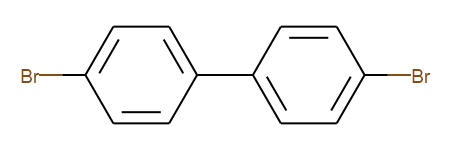

Brc1ccc(Br)cc1
[0, 6, 2, 2, 6, 0, 2, 2]


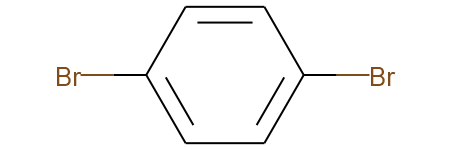

Brc1ccccc1Br
[0, 6, 4, 2, 2, 4, 6, 0]


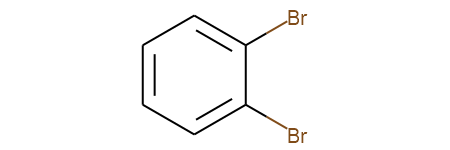

C#CCN(CC#C)CC#C
[0, 3, 6, 9, 6, 3, 0, 6, 3, 0]


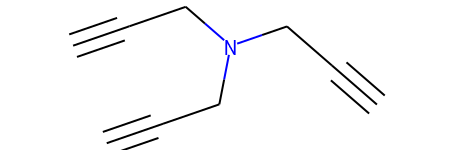

C(#Cc1ccccc1)c1ccccc1
[0, 0, 12, 8, 4, 2, 4, 8, 12, 8, 4, 2, 4, 8]


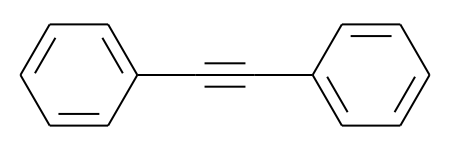

C(=C/c1ccccc1)\c1ccccc1
[0, 0, 12, 8, 4, 2, 4, 8, 12, 8, 4, 2, 4, 8]


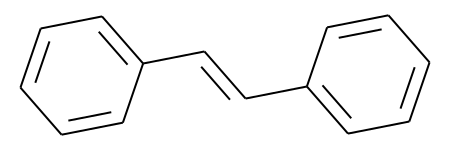

C(=C/c1ccccn1)\c1ccccn1
[0, 0, 12, 8, 4, 2, 6, 10, 12, 8, 4, 2, 6, 10]


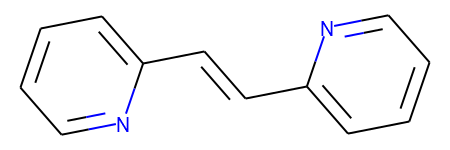

C(=Cc1ccccc1)c1ccccc1
[0, 0, 12, 8, 4, 2, 4, 8, 12, 8, 4, 2, 4, 8]


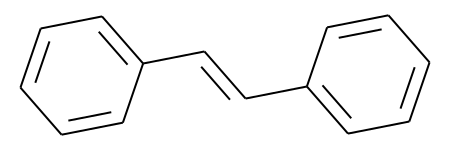

C(=Cc1ccccn1)c1ccccn1
[0, 0, 12, 8, 4, 2, 6, 10, 12, 8, 4, 2, 6, 10]


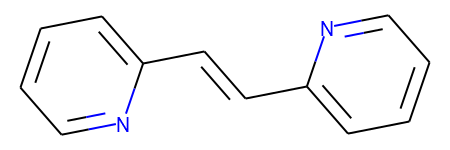

C1=CC2C=CC1C2
[0, 0, 5, 0, 0, 5, 4]


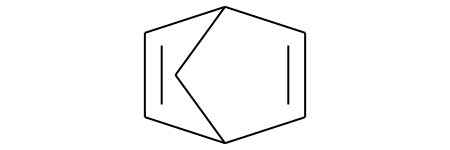

C1=CC2CCC1C2
[0, 0, 5, 2, 2, 5, 4]


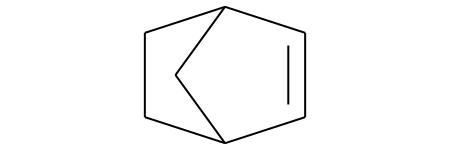

C1=CC=CC=CC=C1
[0, 0, 0, 0, 0, 0, 0, 0]


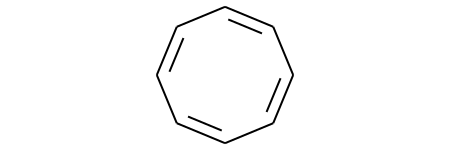

C1=CC=CCC=C1
[0, 0, 2, 4, 6, 4, 2]


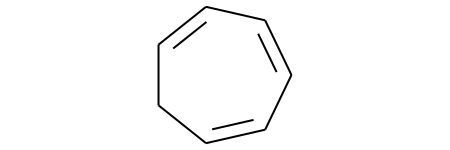

C1=CCC=CC1
[0, 0, 4, 0, 0, 4]


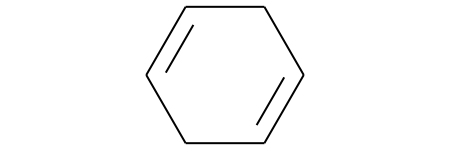

C1=CCCC=C1
[0, 2, 4, 4, 2, 0]


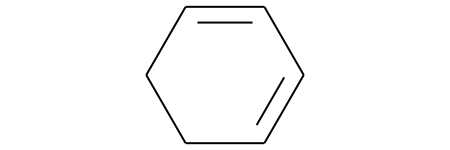

C1=CCCC=CCC1
[0, 0, 4, 4, 0, 0, 4, 4]


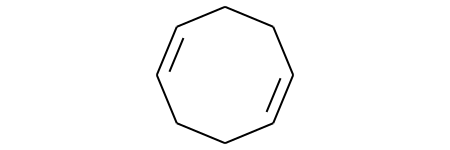

C1=CCCC=CCCC=CCC1
[0, 0, 6, 6, 0, 0, 6, 6, 0, 0, 6, 6]


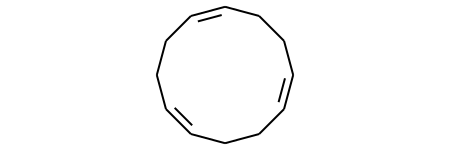

C1=CCCCC1
[0, 0, 2, 4, 4, 2]


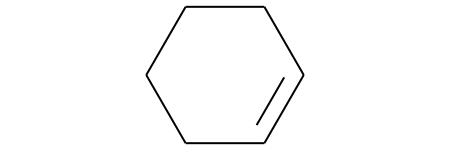

C1=CCOC1
[0, 0, 2, 4, 2]


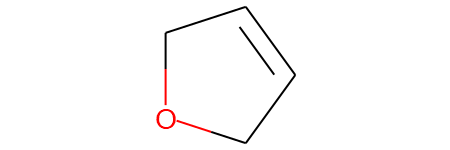

C1=C\C=C/C=C\C=C/1
[0, 0, 0, 0, 0, 0, 0, 0]


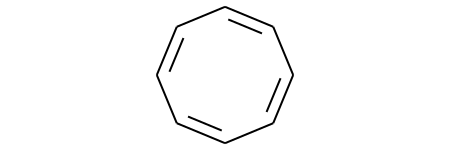

C1=C\CC/C=C\CC/1
[0, 0, 4, 4, 0, 0, 4, 4]


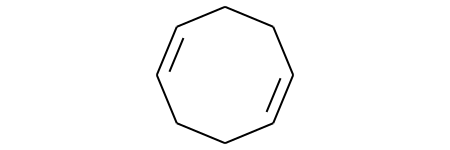

C1=c2ccc3c4c(ccc(c24)=C1)=CC=3
[0, 8, 4, 4, 8, 12, 8, 4, 4, 8, 12, 0, 0, 0]


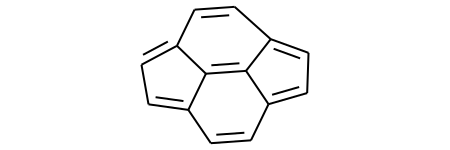

C1C2C3C2C2C1C32
[0, 1, 3, 3, 3, 1, 3]


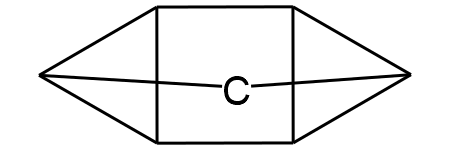

C1C2CC3CC1CC(C2)C3
[0, 6, 0, 6, 0, 6, 0, 6, 0, 0]


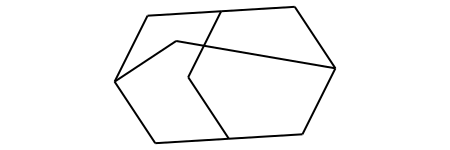

C1CC2CCC1C2
[0, 0, 5, 0, 0, 5, 4]


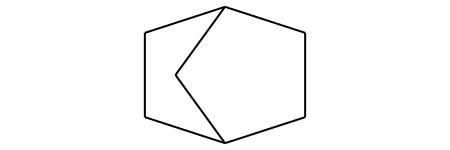

C1CCCC1
[0, 0, 0, 0, 0]


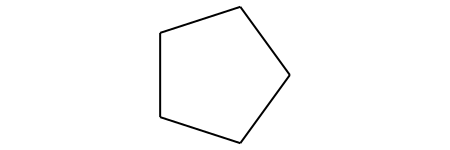

C1CCCCC1
[0, 0, 0, 0, 0, 0]


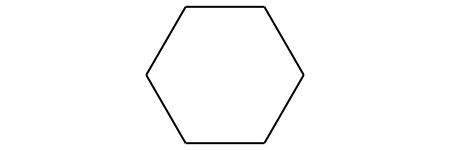

C1CCCCCC1
[0, 0, 0, 0, 0, 0, 0]


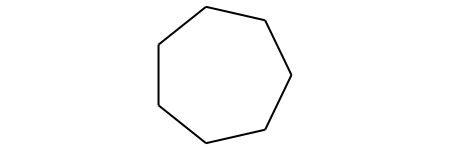

C1CCCCCCC1
[0, 0, 0, 0, 0, 0, 0, 0]


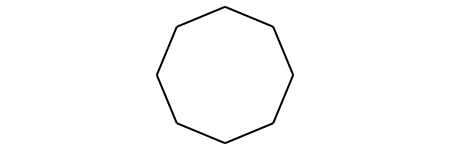

C1CCNC1
[0, 0, 2, 4, 2]


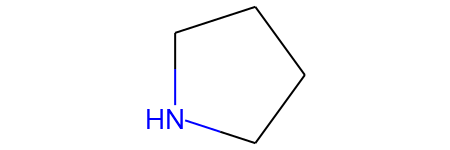

C1CCOC1
[0, 0, 2, 4, 2]


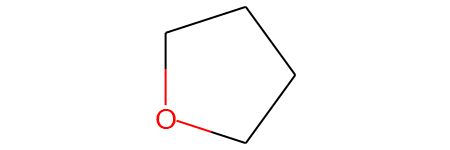

C1CNCCN1
[0, 0, 4, 0, 0, 4]


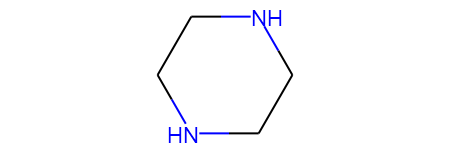

C1COCCO1
[0, 0, 4, 0, 0, 4]


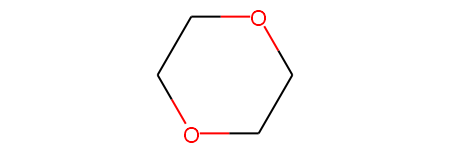

C1COCCOCCOCCO1
[0, 0, 8, 0, 0, 8, 0, 0, 8, 0, 0, 8]


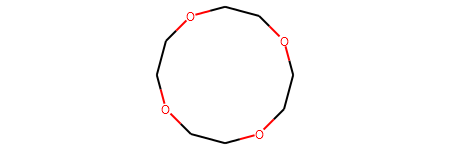

C1COCCOCCOCCOCCO1
[0, 0, 10, 0, 0, 10, 0, 0, 10, 0, 0, 10, 0, 0, 10]


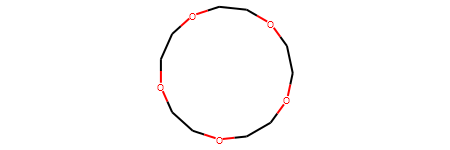

C1COCCOCCOCCOCCOCCO1
[0, 0, 12, 0, 0, 12, 0, 0, 12, 0, 0, 12, 0, 0, 12, 0, 0, 12]


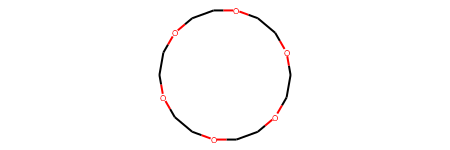

C1COCO1
[0, 0, 3, 2, 3]


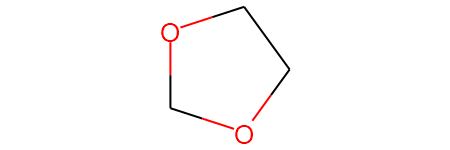

C1OC1C1CO1
[0, 2, 4, 4, 0, 2]


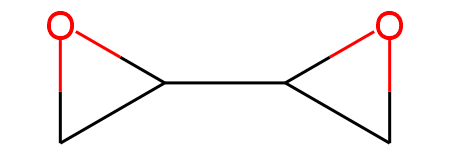

C1OC1CN1CCN(CC2CO2)CC1
[0, 8, 10, 6, 12, 2, 2, 12, 6, 10, 0, 8, 2, 2]


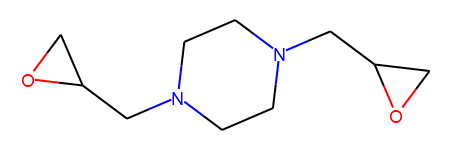

C1OCOCO1
[0, 3, 0, 3, 0, 3]


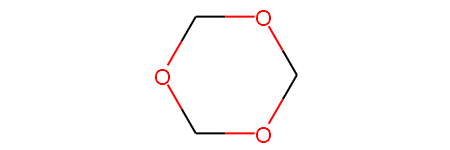

C=C(C)C(=O)OCC(C)(C)COC(=O)C(=C)C
[0, 12, 2, 14, 6, 10, 8, 16, 4, 4, 8, 10, 14, 6, 12, 0, 2]


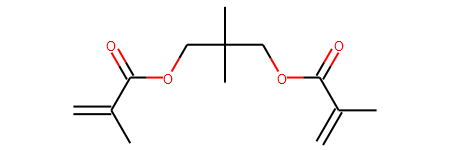

C=C(C)C(=O)OCCCOC(=O)C(=C)C
[0, 11, 2, 13, 4, 9, 7, 6, 7, 9, 13, 4, 11, 0, 2]


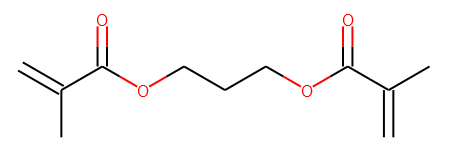

C=C(C)C(=O)OCCOCCOCCOC(=O)C(=C)C
[0, 16, 2, 18, 4, 14, 10, 8, 12, 6, 6, 12, 8, 10, 14, 18, 4, 16, 0, 2]


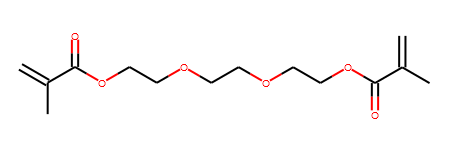

C=C1C(=O)OC2CC(C)C3=CCC(=O)C3(C)C(OC(=O)CC(=O)OC3C4C(=C)C(=O)OC4CC(C)C4=CCC(=O)C43C)C12
[0, 23, 27, 8, 19, 35, 17, 33, 2, 31, 12, 15, 29, 10, 41, 4, 39, 21, 25, 6, 14, 25, 6, 21, 39, 37, 23, 0, 27, 8, 19, 35, 17, 33, 2, 31, 12, 15, 29, 10, 41, 4, 37]


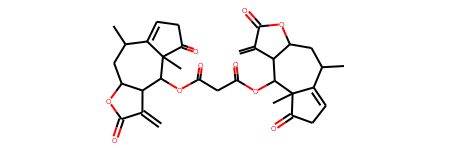

C=C1C(=O)OC2CC(C)C3=CCC(=O)C3(C)C(OC(=O)CCCC(=O)OC3C4C(=C)C(=O)OC4CC(C)C4=CCC(=O)C43C)C12
[0, 25, 29, 8, 21, 37, 19, 35, 2, 33, 12, 17, 31, 10, 43, 4, 41, 23, 27, 6, 15, 14, 15, 27, 6, 23, 41, 39, 25, 0, 29, 8, 21, 37, 19, 35, 2, 33, 12, 17, 31, 10, 43, 4, 39]


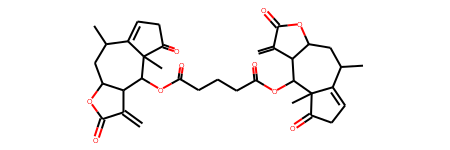

C=CC(=O)OCCOCCOCCOC(=O)C=C
[0, 4, 16, 2, 14, 10, 8, 12, 6, 6, 12, 8, 10, 14, 16, 2, 4, 0]


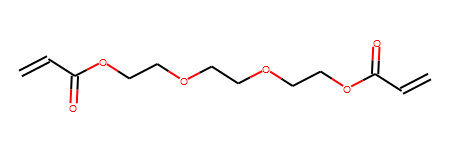

C=CC(=O)OCCOCCOCCOCCOC(=O)C=C
[0, 4, 19, 2, 17, 12, 10, 15, 8, 6, 14, 6, 8, 15, 10, 12, 17, 19, 2, 4, 0]


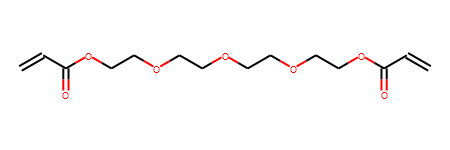

C=CCC=C
[0, 2, 4, 2, 0]


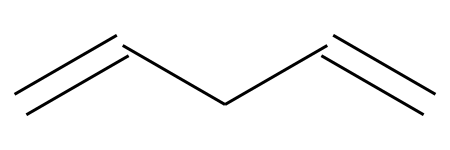

C=CCCC=C
[0, 2, 4, 4, 2, 0]


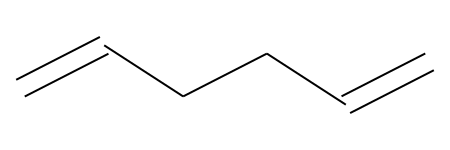

C=CCN(CC=C)CC=C
[0, 3, 6, 9, 6, 3, 0, 6, 3, 0]


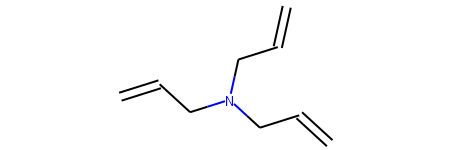

C=CCNCC=C
[0, 2, 4, 6, 4, 2, 0]


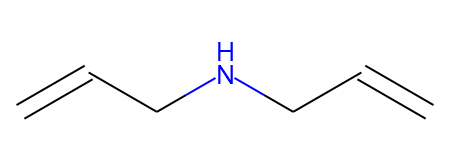

C=CCOC(=O)c1ccccc1C(=O)OCC=C
[0, 4, 10, 12, 14, 2, 16, 8, 6, 6, 8, 16, 14, 2, 12, 10, 4, 0]


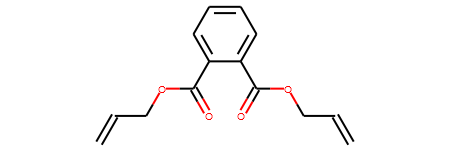

C=c1c(C)c(O)c(=C)c(C)c1O
[0, 10, 6, 2, 8, 4, 10, 0, 6, 2, 8, 4]


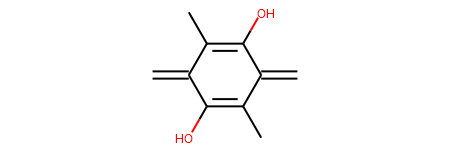

C=c1c(O)c(OC)c(OC)c(O)c1=C
[0, 12, 10, 4, 8, 6, 2, 8, 6, 2, 10, 4, 12, 0]


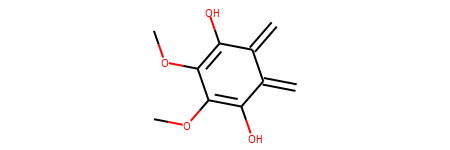

C=c1c(O)ccc(O)c1=C
[0, 8, 6, 2, 4, 4, 6, 2, 8, 0]


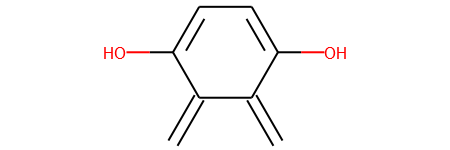

C=c1cc(O)c(=C)cc1O
[0, 8, 4, 6, 2, 8, 0, 4, 6, 2]


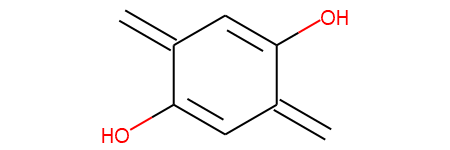

CC#CC#CC
[0, 2, 4, 4, 2, 0]


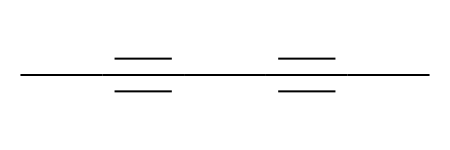

CC(=O)C(C)=O
[0, 4, 2, 4, 0, 2]


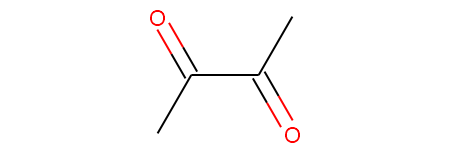

CC(=O)CC(=O)Nc1ccc(-c2ccc(NC(=O)CC(C)=O)c(C)c2)cc1C
[0, 18, 4, 14, 20, 6, 16, 26, 12, 8, 22, 22, 8, 12, 26, 16, 20, 6, 14, 18, 0, 4, 24, 2, 10, 10, 24, 2]


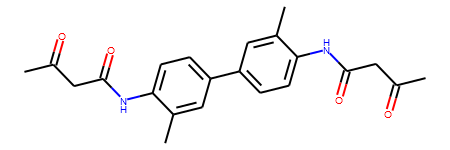

CC(=O)CC(C)=O
[0, 5, 2, 4, 5, 0, 2]


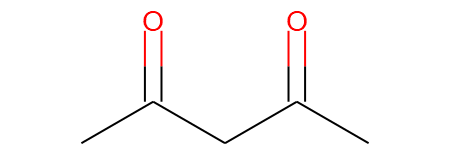

CC(=O)CCC(C)=O
[0, 6, 2, 4, 4, 6, 0, 2]


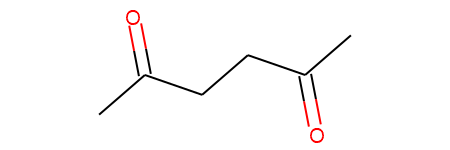

CC(=O)N=c1[nH]c2cc3sc(=NC(C)=O)[nH]c3cc2s1
[0, 12, 2, 6, 14, 8, 16, 4, 18, 10, 14, 6, 12, 0, 2, 8, 16, 4, 18, 10]


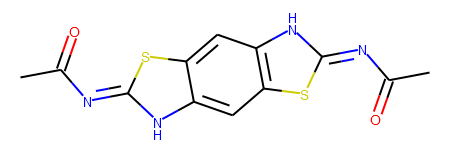

CC(=O)NC(CSSCC(NC(C)=O)C(N)=O)C(N)=O
[0, 14, 4, 10, 18, 8, 12, 12, 8, 18, 10, 14, 0, 4, 16, 2, 6, 16, 2, 6]


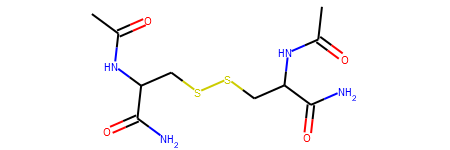

CC(=O)Nc1ccccc1NC(C)=O
[0, 10, 2, 8, 12, 6, 4, 4, 6, 12, 8, 10, 0, 2]


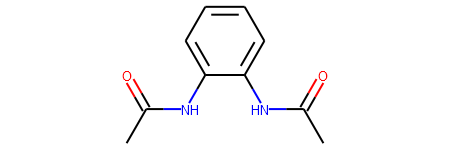

CC(=O)c1ccc(C(C)=O)cc1
[0, 8, 2, 10, 4, 4, 10, 8, 0, 2, 4, 4]


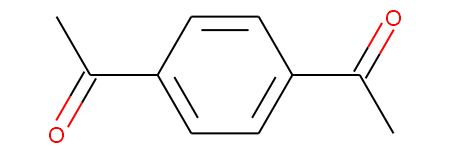

CC(C)(C#N)N=NC(C)(C)C#N
[0, 10, 0, 6, 4, 8, 8, 10, 0, 0, 6, 4]


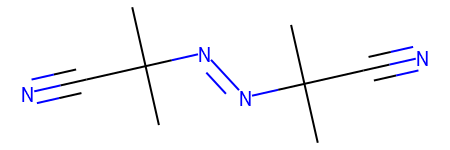

CC(C)(C(=O)O)C(=O)O
[0, 8, 0, 6, 2, 4, 6, 2, 4]


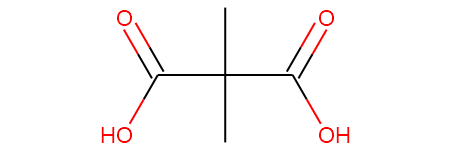

CC(C)(C)C
[0, 4, 0, 0, 0]


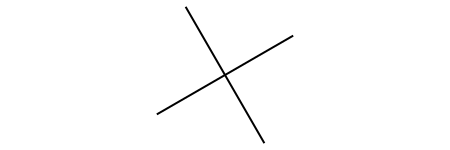

CC(C)(C)C(=O)Nc1ccc(NC(=O)C(C)(C)C)cc1
[0, 18, 0, 0, 14, 6, 12, 16, 8, 8, 16, 12, 14, 6, 18, 0, 0, 0, 8, 8]


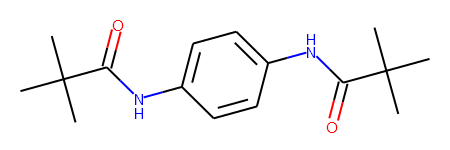

CC(C)(C)c1cc(CCC(=O)OCC(COC(=O)CCc2cc(C(C)(C)C)c(O)c(C(C)(C)C)c2)(COC(=O)CCc2cc(C(C)(C)C)c(O)c(C(C)(C)C)c2)COC(=O)CCc2cc(C(C)(C)C)c(O)c(C(C)(C)C)c2)cc(C(C)(C)C)c1O
[0, 77, 0, 0, 64, 32, 60, 44, 40, 56, 24, 52, 48, 76, 48, 52, 56, 24, 40, 44, 60, 32, 64, 77, 0, 0, 0, 72, 28, 64, 77, 0, 0, 0, 32, 48, 52, 56, 24, 40, 44, 60, 32, 64, 77, 0, 0, 0, 72, 28, 64, 77, 0, 0, 0, 32, 48, 52, 56, 24, 40, 44, 60, 32, 64, 77, 0, 0, 0, 72, 28, 64, 77, 0, 0, 0, 32, 32, 64, 77, 0, 0, 0, 72, 28]


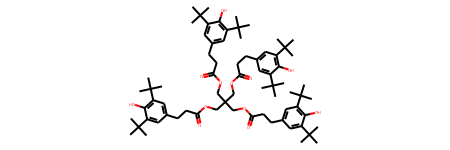

CC(C)(OOC(C)(C)c1ccccc1)c1ccccc1
[0, 18, 0, 14, 14, 18, 0, 0, 16, 10, 6, 4, 6, 10, 16, 10, 6, 4, 6, 10]


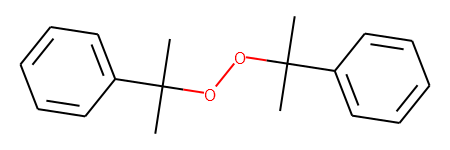

CC(C)(c1ccc(O)cc1)c1ccc(O)cc1
[0, 16, 0, 14, 8, 4, 12, 2, 4, 8, 14, 8, 4, 12, 2, 4, 8]


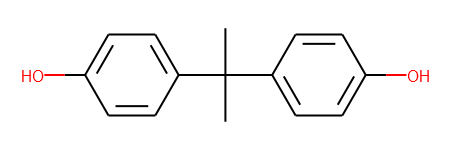

CC(C)=CC=C(C)C
[0, 6, 0, 4, 4, 6, 0, 0]


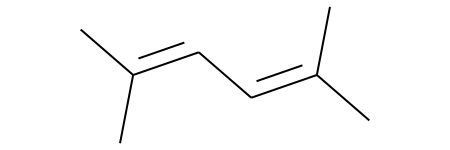

CC(C)C(=O)CC(=O)C(C)C
[0, 9, 0, 7, 4, 6, 7, 4, 9, 0, 0]


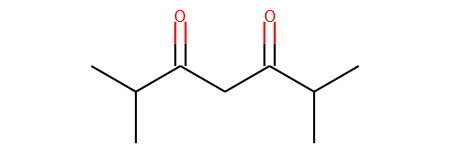

CC(C)C(C)C
[0, 4, 0, 4, 0, 0]


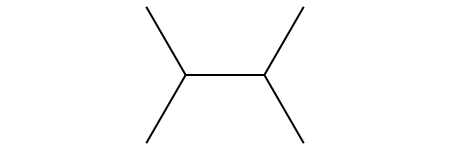

CC(C)CCOCCC(C)C
[0, 9, 0, 6, 4, 8, 4, 6, 9, 0, 0]


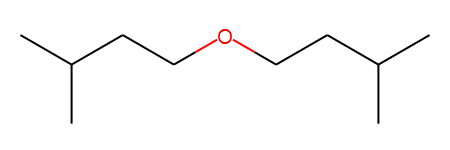

CC(C)COC(=O)c1ccccc1C(=O)OCC(C)C
[0, 18, 0, 10, 12, 14, 4, 16, 8, 6, 6, 8, 16, 14, 4, 12, 10, 18, 0, 0]


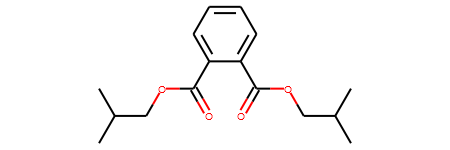

CC(C)COCC(C)C
[0, 7, 0, 4, 6, 4, 7, 0, 0]


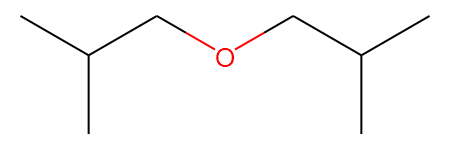

CC(C)NC(C)C
[0, 5, 0, 4, 5, 0, 0]


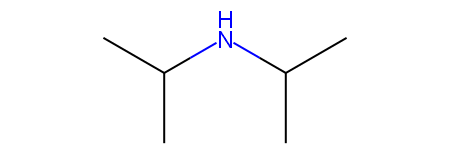

CC(C)OC(=O)c1ccccc1C(=O)OC(C)C
[0, 16, 0, 10, 12, 4, 14, 8, 6, 6, 8, 14, 12, 4, 10, 16, 0, 0]


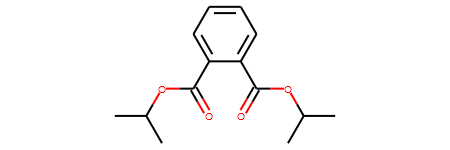

CC(C)OC(C)C
[0, 5, 0, 4, 5, 0, 0]


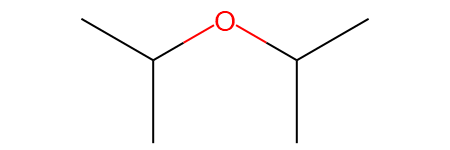

CC(C)SC(C)C
[0, 5, 0, 4, 5, 0, 0]


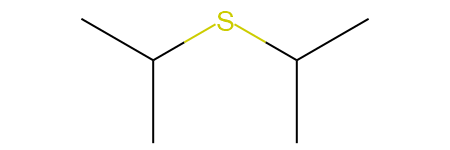

CC(C)c1ccccc1C(C)C
[0, 10, 0, 8, 6, 4, 4, 6, 8, 10, 0, 0]


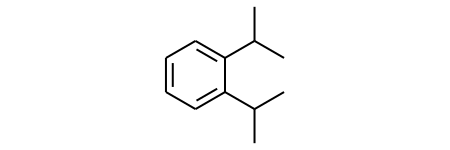

CC(CCl)OC(C)CCl
[0, 7, 4, 2, 6, 7, 0, 4, 2]


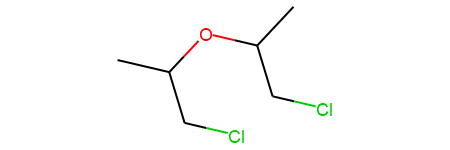

CC(CO)OC(C)CO
[0, 7, 4, 2, 6, 7, 0, 4, 2]


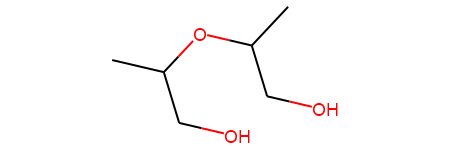

CC(O)C(C)O
[0, 4, 2, 4, 0, 2]


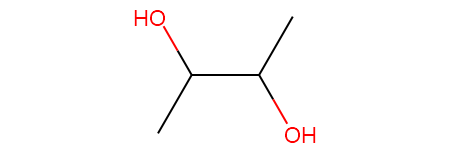

CC(O)CNCC(C)O
[0, 7, 2, 4, 6, 4, 7, 0, 2]


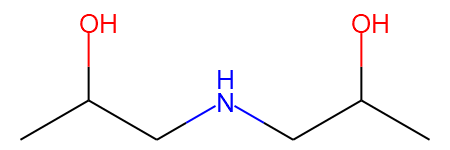

CC1(C)CCC(C)(C)O1
[0, 7, 0, 4, 4, 7, 0, 0, 6]


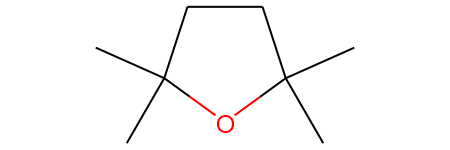

CC1(C)OCCO1
[0, 6, 0, 4, 2, 2, 4]


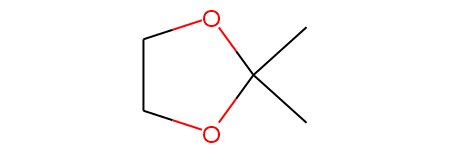

CC1=C(C)S(=O)(=O)CCS1(=O)=O
[0, 8, 8, 0, 10, 2, 2, 6, 6, 10, 2, 2]


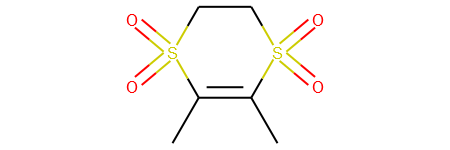

CC1C(C)N(N=O)C(C)C(C)N1N=O
[0, 8, 8, 0, 12, 6, 4, 8, 0, 8, 0, 12, 6, 4]


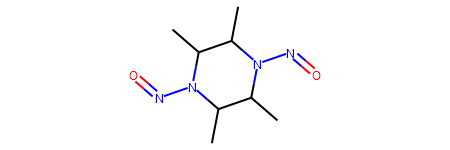

CC1C(Cl)C(Cl)C(C)C(Cl)C1Cl
[0, 6, 8, 2, 8, 2, 6, 0, 8, 2, 8, 2]


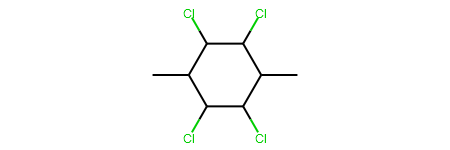

CC1CC2OC(=O)C(C)C2C(OC(=O)CC(=O)OC2C3C(CC(C)C4CCC(=O)C42C)OC(=O)C3C)C2(C)C(=O)CCC12
[0, 29, 15, 31, 19, 25, 8, 33, 2, 35, 39, 21, 23, 6, 12, 23, 6, 21, 39, 35, 31, 15, 29, 0, 37, 17, 13, 27, 10, 41, 4, 19, 25, 8, 33, 2, 41, 4, 27, 10, 13, 17, 37]


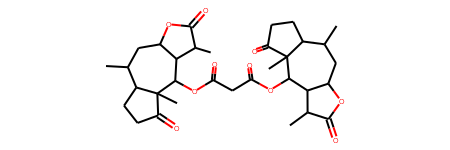

CC1CCC(C)O1
[0, 5, 2, 2, 5, 0, 4]


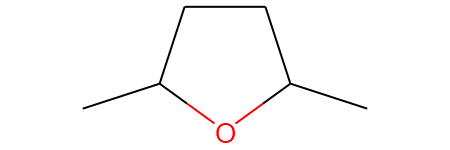

CC1CN(N=O)C(C)CN1N=O
[0, 8, 4, 10, 6, 2, 8, 0, 4, 10, 6, 2]


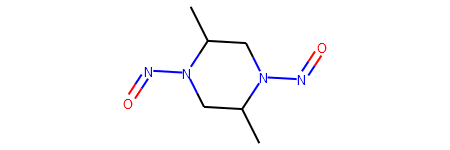

CC1CN1C1=C(F)C(=O)C(N2CC2C)=C(F)C1=O
[0, 14, 6, 16, 12, 10, 4, 8, 2, 12, 16, 6, 14, 0, 10, 4, 8, 2]


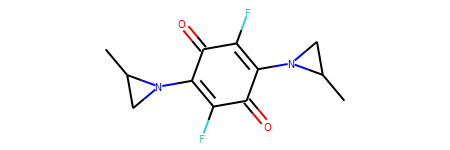

CC1CN1C1=CC(=O)C(N2CC2C)=CC1=O
[0, 12, 6, 14, 10, 4, 8, 2, 10, 14, 6, 12, 0, 4, 8, 2]


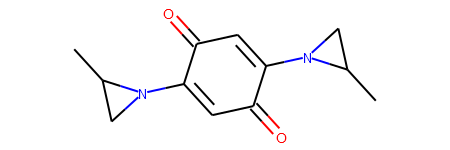

CC1OC(C)OC(C)O1
[0, 6, 3, 6, 0, 3, 6, 0, 3]


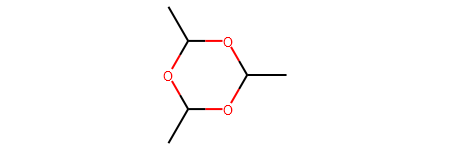

CC1OC(C)OC(C)OC(C)O1
[0, 8, 4, 8, 0, 4, 8, 0, 4, 8, 0, 4]


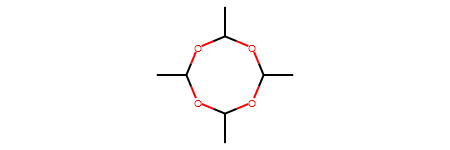

CC=CC=CC
[0, 2, 4, 4, 2, 0]


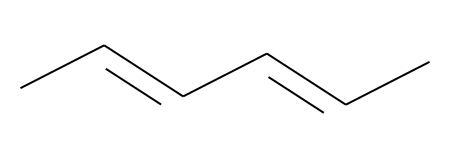

CCC(=O)CC(=O)CC
[0, 4, 7, 2, 6, 7, 2, 4, 0]


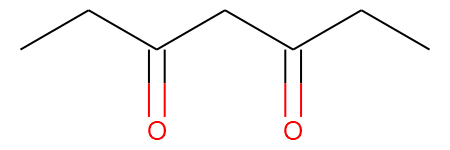

CCC(=O)N1N=C(c2ccc(C3=NN(C(=O)CC)[C@@H](c4cccc(OC)c4OC)C3)cc2)C[C@@H]1c1cccc(OC)c1OC
[0, 18, 28, 6, 42, 22, 30, 32, 10, 10, 32, 30, 22, 42, 28, 6, 18, 0, 40, 36, 16, 8, 14, 34, 24, 2, 38, 26, 4, 20, 10, 10, 20, 40, 36, 16, 8, 14, 34, 24, 2, 38, 26, 4]


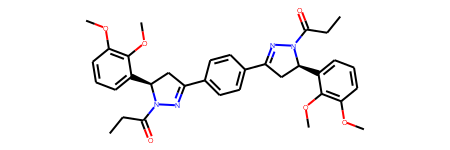

CCC(=O)Oc1c(OC)c(OC)c(OC(=O)CC)c2ccccc12
[0, 10, 16, 4, 14, 20, 18, 12, 2, 18, 12, 2, 20, 14, 16, 4, 10, 0, 22, 8, 6, 6, 8, 22]


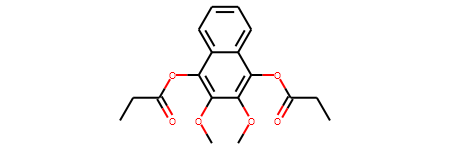

CCC(C(=O)N1CCCN(C(=O)C(CC)c2ccccc2)CC1)c1ccccc1
[0, 15, 25, 21, 2, 27, 17, 14, 17, 27, 21, 2, 25, 15, 0, 23, 10, 6, 4, 6, 10, 19, 19, 23, 10, 6, 4, 6, 10]


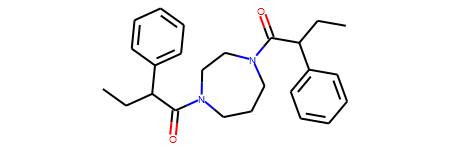

CCC(c1ccc(O)cc1)C(CC)c1ccc(O)cc1
[0, 12, 18, 16, 8, 4, 14, 2, 4, 8, 18, 12, 0, 16, 8, 4, 14, 2, 4, 8]


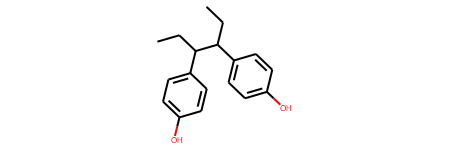

CCCC(=O)CC(=O)CCC
[0, 4, 6, 9, 2, 8, 9, 2, 6, 4, 0]


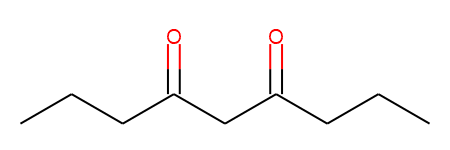

CCCC(=O)N1CC2(C)CN(C(=O)CCC)CC(C)(C1)C2
[0, 6, 8, 15, 4, 17, 10, 19, 2, 10, 17, 15, 4, 8, 6, 0, 10, 19, 2, 10, 14]


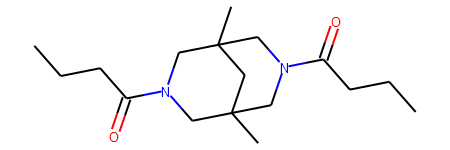

CCCCC
[0, 2, 4, 2, 0]


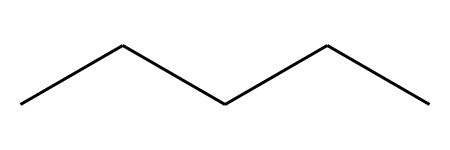

CCCCC(=O)CC(=O)CCCC
[0, 4, 6, 8, 11, 2, 10, 11, 2, 8, 6, 4, 0]


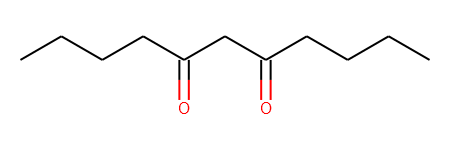

CCCCC(CC)COC(=O)c1ccccc1C(=O)OCC(CC)CCCC
[0, 10, 12, 16, 26, 14, 2, 18, 20, 22, 4, 24, 8, 6, 6, 8, 24, 22, 4, 20, 18, 26, 14, 2, 16, 12, 10, 0]


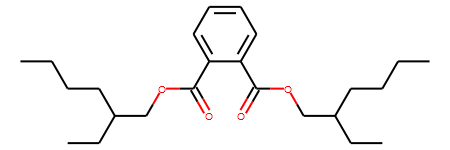

CCCCCC
[0, 2, 4, 4, 2, 0]


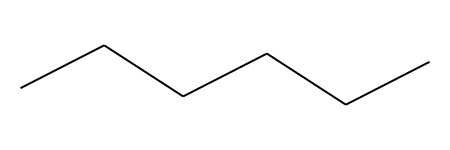

CCCCCCC
[0, 2, 4, 6, 4, 2, 0]


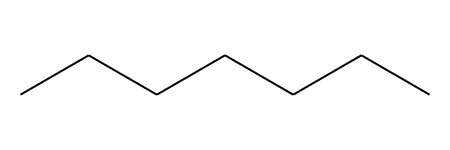

CCCCCCCC
[0, 2, 4, 6, 6, 4, 2, 0]


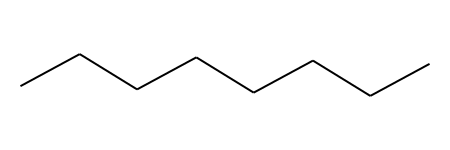

CCCCCCCCC
[0, 2, 4, 6, 8, 6, 4, 2, 0]


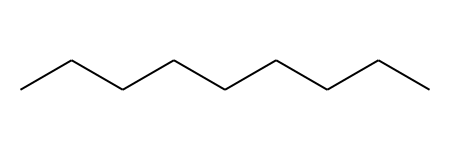

CCCCCCCCCC
[0, 2, 4, 6, 8, 8, 6, 4, 2, 0]


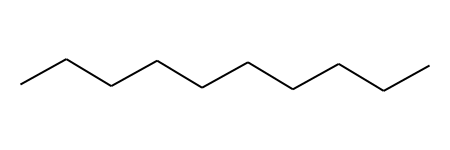

CCCCCCCCCCCC
[0, 2, 4, 6, 8, 10, 10, 8, 6, 4, 2, 0]


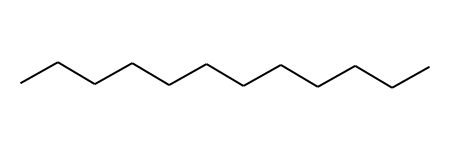

CCCCCCCCCCCCCC
[0, 2, 4, 6, 8, 10, 12, 12, 10, 8, 6, 4, 2, 0]


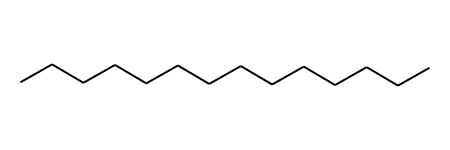

CCCCCCCCCCOC(=O)c1ccccc1C(=O)OCCCCCCCCCC
[0, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 2, 30, 6, 4, 4, 6, 30, 28, 2, 26, 24, 22, 20, 18, 16, 14, 12, 10, 8, 0]


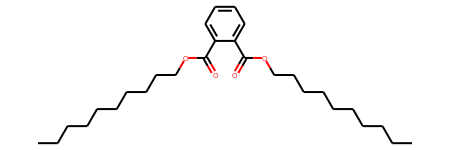

CCCCCCCCOC(=O)c1ccccc1C(=O)OCCCCCCCC
[0, 8, 10, 12, 14, 16, 18, 20, 22, 24, 2, 26, 6, 4, 4, 6, 26, 24, 2, 22, 20, 18, 16, 14, 12, 10, 8, 0]


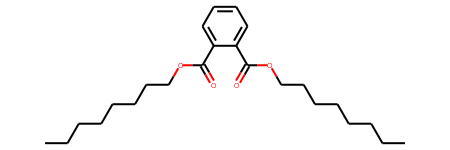

CCCCCCOC(=O)c1ccccc1C(=O)OCCCCCC
[0, 8, 10, 12, 14, 16, 18, 20, 2, 22, 6, 4, 4, 6, 22, 20, 2, 18, 16, 14, 12, 10, 8, 0]


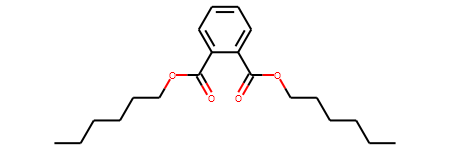

CCCCCOC(=O)c1ccccc1C(=O)OCCCCC
[0, 8, 10, 12, 14, 16, 18, 2, 20, 6, 4, 4, 6, 20, 18, 2, 16, 14, 12, 10, 8, 0]


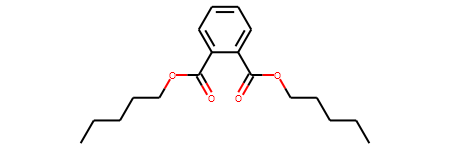

CCCCN1C(=O)N(C)[C@@H]2[C@H]1N(C)C(=O)N2CCCC
[0, 6, 8, 10, 18, 12, 4, 16, 2, 14, 14, 16, 2, 12, 4, 18, 10, 8, 6, 0]


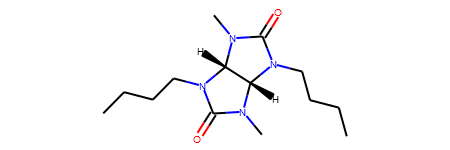

CCCCNCCCC
[0, 2, 4, 6, 8, 6, 4, 2, 0]


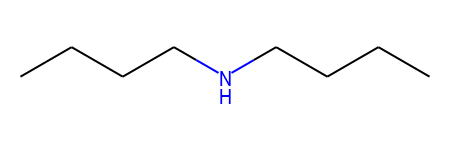

CCCCOC(=O)c1ccc(C(=O)OCCCC)cc1
[0, 8, 10, 12, 14, 16, 2, 18, 4, 4, 18, 16, 2, 14, 12, 10, 8, 0, 4, 4]


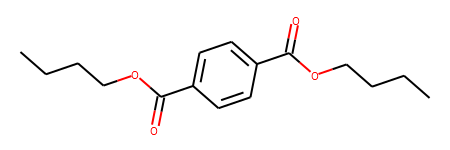

CCCCOC(=O)c1ccccc1C(=O)OCCCC
[0, 8, 10, 12, 14, 16, 2, 18, 6, 4, 4, 6, 18, 16, 2, 14, 12, 10, 8, 0]


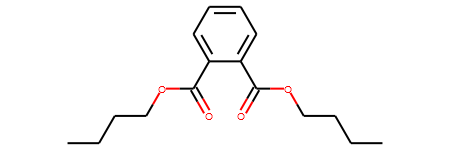

CCCCOCCCC
[0, 2, 4, 6, 8, 6, 4, 2, 0]


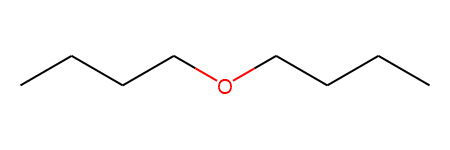

CCCCOCCOCCCC
[0, 2, 4, 6, 10, 8, 8, 10, 6, 4, 2, 0]


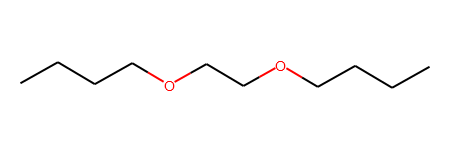

CCCCOCCOCCOCCCC
[0, 2, 4, 6, 12, 8, 10, 14, 10, 8, 12, 6, 4, 2, 0]


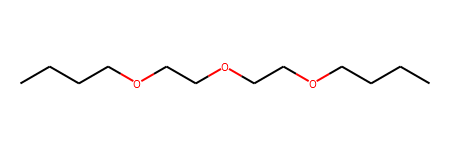

CCCN(CCC)CCC
[0, 3, 6, 9, 6, 3, 0, 6, 3, 0]


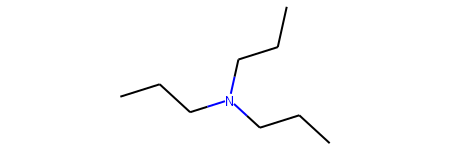

CCCNC(=O)N1CCN(C(=O)NCCC)CC1
[0, 4, 6, 12, 14, 2, 16, 8, 8, 16, 14, 2, 12, 6, 4, 0, 8, 8]


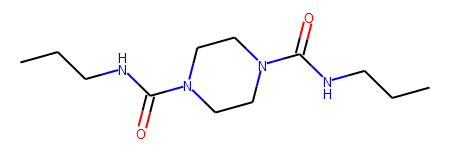

CCCNCCC
[0, 2, 4, 6, 4, 2, 0]


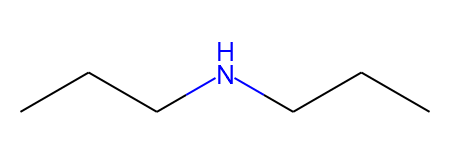

CCCOC(=O)CCC(=O)OCCC
[0, 4, 6, 10, 12, 2, 8, 8, 12, 2, 10, 6, 4, 0]


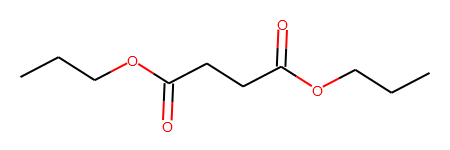

CCCOC(=O)c1ccccc1C(=O)OCCC
[0, 8, 10, 12, 14, 2, 16, 6, 4, 4, 6, 16, 14, 2, 12, 10, 8, 0]


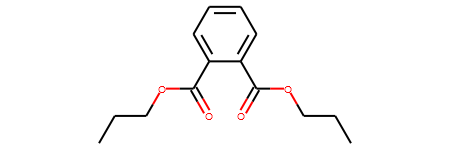

CCCOCCC
[0, 2, 4, 6, 4, 2, 0]


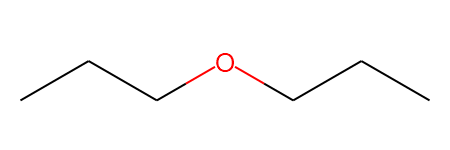

CCCOP(OCCC)OCCC
[0, 3, 6, 9, 12, 9, 6, 3, 0, 9, 6, 3, 0]


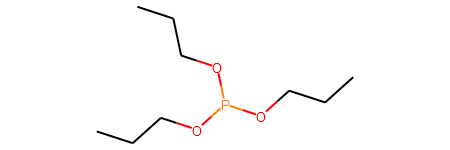

CCCS(=O)(=O)CCC
[0, 4, 6, 8, 2, 2, 6, 4, 0]


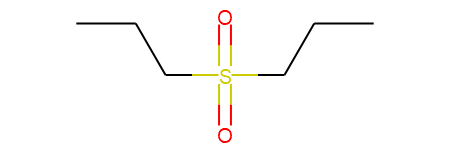

CCN(C)c1nc(N(C)CC)nc(N(C)CC)n1
[0, 6, 15, 3, 12, 9, 12, 15, 3, 6, 0, 9, 12, 15, 3, 6, 0, 9]


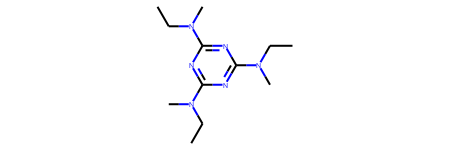

CCN(CC)C(=S)SSC(=S)N(CC)CC
[0, 6, 14, 6, 0, 12, 4, 10, 10, 12, 4, 14, 6, 0, 6, 0]


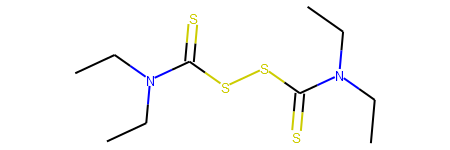

CCN(CC)CC
[0, 3, 6, 3, 0, 3, 0]


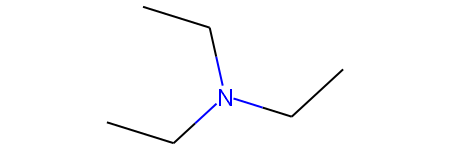

CCNCC
[0, 2, 4, 2, 0]


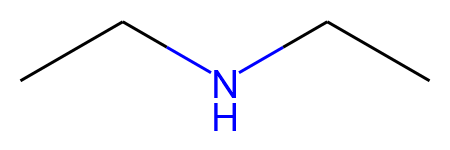

CCNCCNCC
[0, 2, 6, 4, 4, 6, 2, 0]


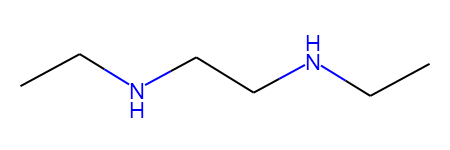

CCOC(=O)C(=O)OCC
[0, 4, 6, 8, 2, 8, 2, 6, 4, 0]


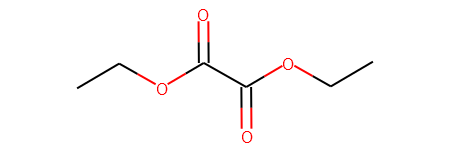

CCOC(=O)C(C(=O)OCC)=C(C(=O)OCC)C(=O)OCC
[0, 8, 12, 16, 4, 20, 16, 4, 12, 8, 0, 20, 16, 4, 12, 8, 0, 16, 4, 12, 8, 0]


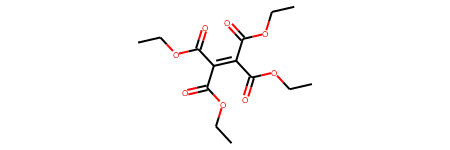

CCOC(=O)CC(=O)OCC
[0, 4, 7, 9, 2, 6, 9, 2, 7, 4, 0]


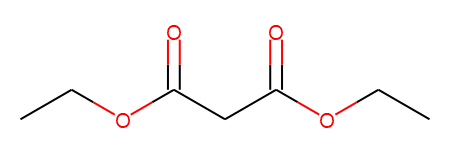

CCOC(=O)CCC(=O)OCC
[0, 4, 8, 10, 2, 6, 6, 10, 2, 8, 4, 0]


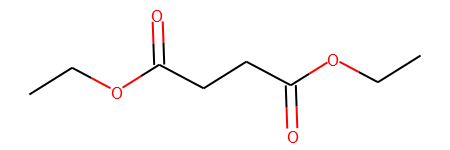

CCOC(=O)NC1=C(N2CC2)C(=O)C(NC(=O)OCC)=C(N2CC2)C1=O
[0, 6, 14, 16, 2, 12, 20, 22, 24, 8, 8, 18, 4, 20, 12, 16, 2, 14, 6, 0, 22, 24, 8, 8, 18, 4]


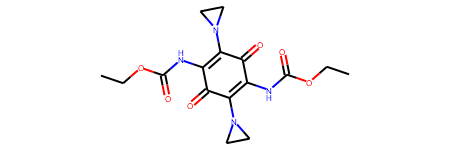

CCOC(=O)c1ccccc1C(=O)OCC
[0, 8, 10, 12, 2, 14, 6, 4, 4, 6, 14, 12, 2, 10, 8, 0]


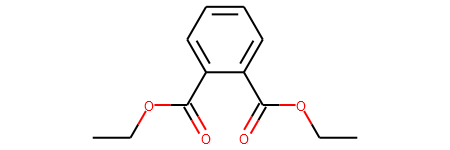

CCOC(=O)c1nccnc1C(=O)OCC
[0, 6, 10, 12, 2, 14, 8, 4, 4, 8, 14, 12, 2, 10, 6, 0]


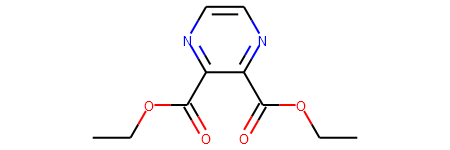

CCOC(=O)c1sc(=NCCN=c2[nH]c(C)c(C(=O)OCC)s2)[nH]c1C
[0, 8, 14, 18, 4, 22, 16, 24, 10, 6, 6, 10, 24, 12, 20, 2, 22, 18, 4, 14, 8, 0, 16, 12, 20, 2]


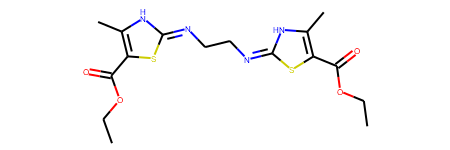

CCOC(OCC)OCC
[0, 3, 6, 9, 6, 3, 0, 6, 3, 0]


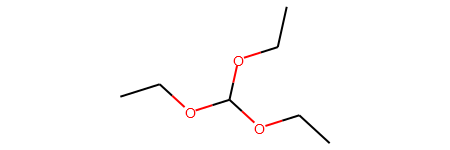

CCOCC
[0, 2, 4, 2, 0]


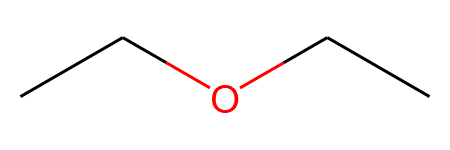

CCOCCOCC
[0, 2, 6, 4, 4, 6, 2, 0]


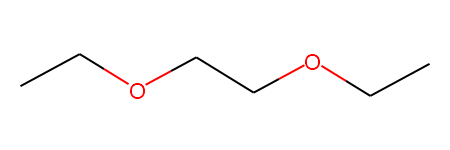

CCOCCOCCOCC
[0, 2, 8, 4, 6, 10, 6, 4, 8, 2, 0]


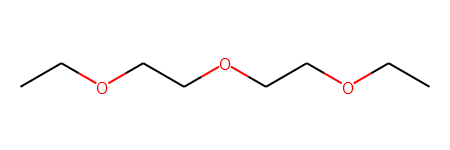

CCOCOCC
[0, 2, 5, 4, 5, 2, 0]


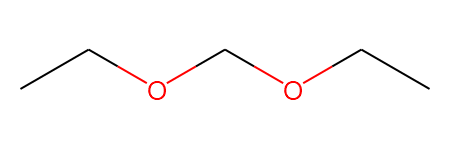

CCOP(=O)(Cc1ccc(CP(=O)(OCC)OCC)o1)OCC
[0, 8, 14, 21, 4, 12, 19, 6, 6, 19, 12, 21, 4, 14, 8, 0, 14, 8, 0, 18, 14, 8, 0]


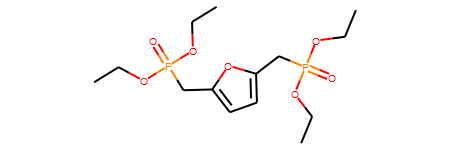

CCOP(=S)(OCC)OP(=S)(OCC)OCC
[0, 6, 10, 15, 4, 10, 6, 0, 14, 15, 4, 10, 6, 0, 10, 6, 0]


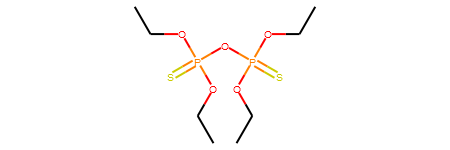

CCOP(=S)(OCC)SCSP(=S)(OCC)OCC
[0, 6, 11, 17, 4, 11, 6, 0, 15, 10, 15, 17, 4, 11, 6, 0, 11, 6, 0]


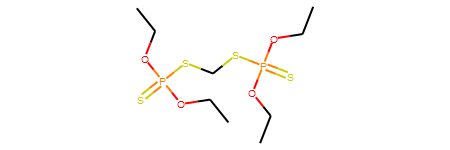

CCOS(=O)(=O)OCC
[0, 4, 6, 8, 2, 2, 6, 4, 0]


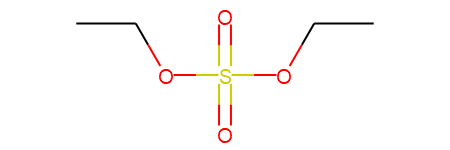

CCOc1ccccc1OCC
[0, 6, 8, 10, 4, 2, 2, 4, 10, 8, 6, 0]


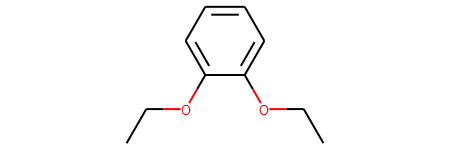

CCS(=O)(=O)CC
[0, 4, 6, 2, 2, 4, 0]


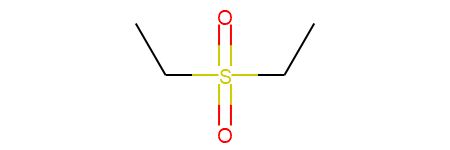

CCSCC
[0, 2, 4, 2, 0]


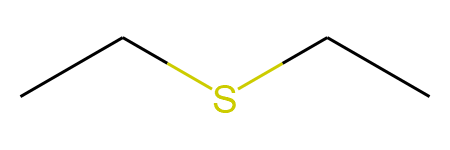

CC[C@]1(C)NC(=S)N2N1C(=S)N[C@@]2(C)CC
[0, 6, 14, 2, 8, 10, 4, 12, 12, 10, 4, 8, 14, 2, 6, 0]


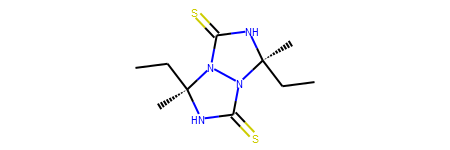

CCc1ccc(CC)cc1
[0, 6, 8, 2, 2, 8, 6, 0, 2, 2]


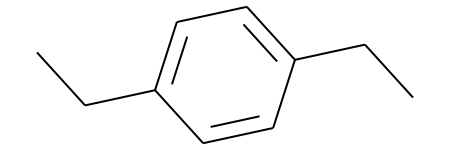

CCc1ccccc1CC
[0, 6, 8, 4, 2, 2, 4, 8, 6, 0]


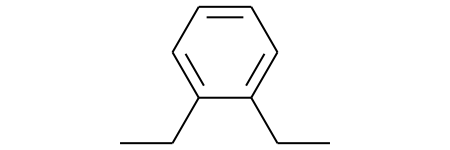

CCc1nc(-c2ccccc2)c(CC)nc1-c1ccccc1
[0, 12, 18, 14, 20, 16, 8, 4, 2, 4, 8, 18, 12, 0, 14, 20, 16, 8, 4, 2, 4, 8]


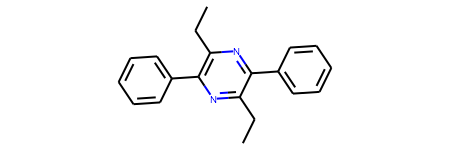

CCc1nccnc1CC
[0, 4, 8, 6, 2, 2, 6, 8, 4, 0]


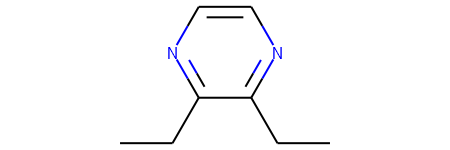

CN(C)C(=O)C1OC(C)(C)OC1C(=O)N(C)C
[0, 14, 0, 10, 6, 12, 8, 16, 4, 4, 8, 12, 10, 6, 14, 0, 0]


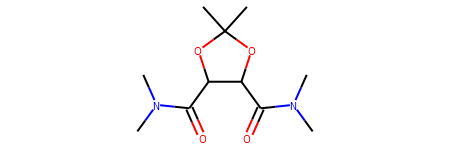

CN(C)C(=S)SSC(=S)N(C)C
[0, 10, 0, 8, 4, 6, 6, 8, 4, 10, 0, 0]


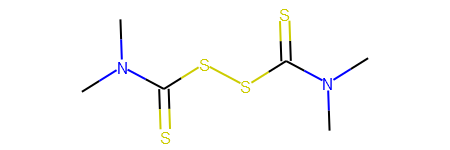

CN(C)C1=CC(=O)C(N(C)C)=CC1=O
[0, 12, 0, 10, 6, 8, 4, 10, 12, 0, 0, 6, 8, 4]


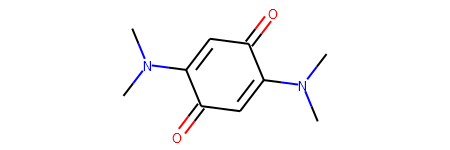

CN(C)CCN(C)C
[0, 6, 0, 4, 4, 6, 0, 0]


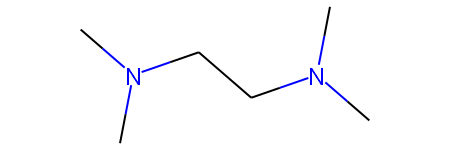

CN(C)c1ccc(N(C)C)nn1
[0, 10, 0, 8, 4, 4, 8, 10, 0, 0, 6, 6]


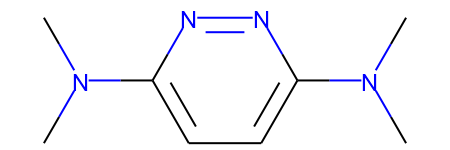

CN(C)c1nc(N(C)C)nc(N(C)C)n1
[0, 12, 0, 9, 6, 9, 12, 0, 0, 6, 9, 12, 0, 0, 6]


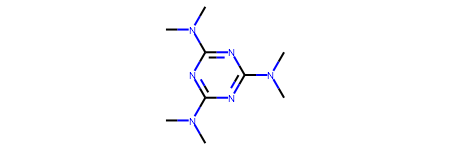

CN(CCO)C1=C(N2CC2)C(=O)C(N(C)CCO)=C(N2CC2)C1=O
[0, 20, 8, 6, 4, 16, 18, 22, 10, 10, 14, 2, 16, 20, 0, 8, 6, 4, 18, 22, 10, 10, 14, 2]


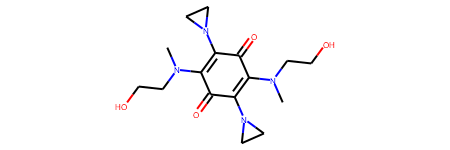

CN(CO)c1nc(N(C)CO)nc(N(C)CO)n1
[0, 15, 6, 3, 12, 9, 12, 15, 0, 6, 3, 9, 12, 15, 0, 6, 3, 9]


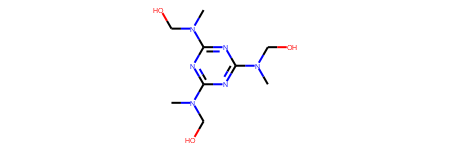

CN1CCN(C)CC1
[0, 6, 2, 2, 6, 0, 2, 2]


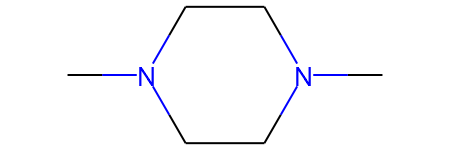

CNCCNC
[0, 4, 2, 2, 4, 0]


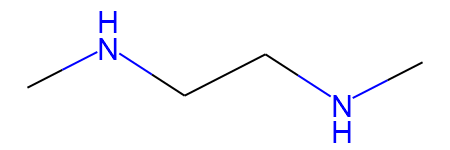

COC(=O)/C=C/C(=O)OC
[0, 6, 8, 2, 4, 4, 8, 2, 6, 0]


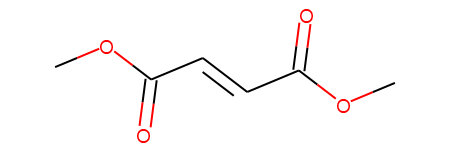

COC(=O)C(=O)OC
[0, 4, 6, 2, 6, 2, 4, 0]


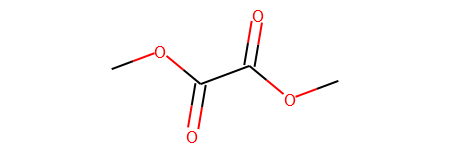

COC(=O)C=CC(=O)OC
[0, 6, 8, 2, 4, 4, 8, 2, 6, 0]


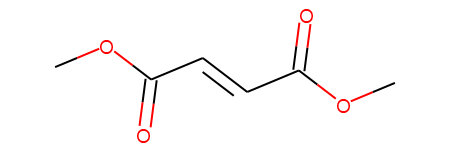

COC(=O)CC(=O)OC
[0, 5, 7, 2, 4, 7, 2, 5, 0]


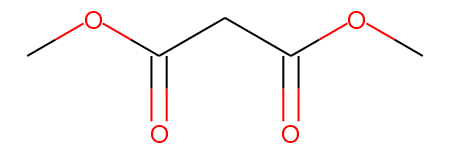

COC(=O)CCC(=O)OC
[0, 6, 8, 2, 4, 4, 8, 2, 6, 0]


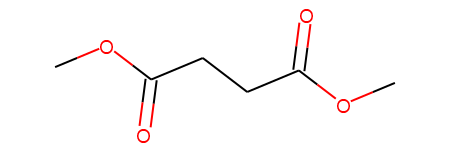

COC(=O)CCCC(=O)OC
[0, 7, 9, 2, 5, 4, 5, 9, 2, 7, 0]


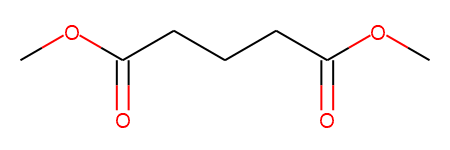

COC(=O)CCCCC(=O)OC
[0, 8, 10, 2, 6, 4, 4, 6, 10, 2, 8, 0]


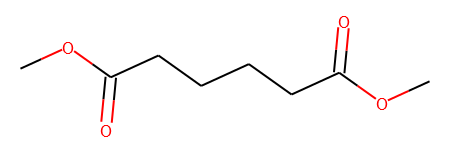

COC(=O)CCCCCC(=O)OC
[0, 9, 11, 2, 7, 5, 4, 5, 7, 11, 2, 9, 0]


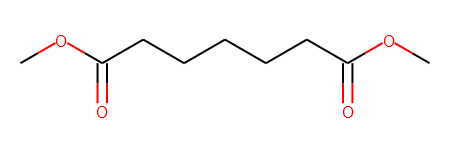

COC(=O)NC(=S)Nc1ccccc1NC(=S)NC(=O)OC
[0, 14, 16, 2, 10, 18, 4, 12, 20, 8, 6, 6, 8, 20, 12, 18, 4, 10, 16, 2, 14, 0]


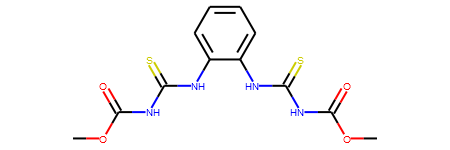

COC(=O)c1c(Cl)c(Cl)c(C(=O)OC)c(Cl)c1Cl
[0, 8, 10, 2, 16, 12, 4, 12, 4, 16, 10, 2, 8, 0, 12, 4, 12, 4]


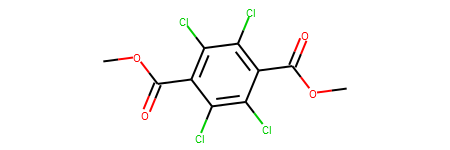

COC(=O)c1ccc(C(=O)OC)cc1
[0, 8, 10, 2, 12, 4, 4, 12, 10, 2, 8, 0, 4, 4]


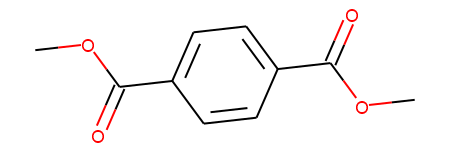

COC(=O)c1ccccc1C(=O)OC
[0, 8, 10, 2, 12, 6, 4, 4, 6, 12, 10, 2, 8, 0]


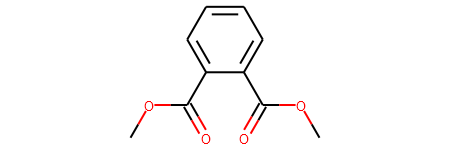

COC(=O)c1nccnc1C(=O)OC
[0, 8, 10, 2, 12, 6, 4, 4, 6, 12, 10, 2, 8, 0]


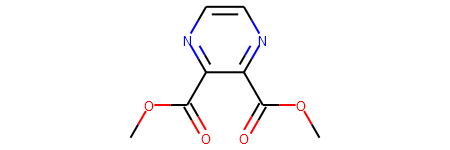

COC(OC)OC
[0, 3, 6, 3, 0, 3, 0]


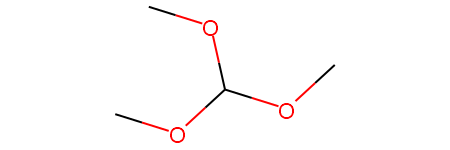

COC1=C(N2CC2)C(=O)C(OC)=C(N2CC2)C1=O
[0, 8, 12, 14, 16, 4, 4, 10, 2, 12, 8, 0, 14, 16, 4, 4, 10, 2]


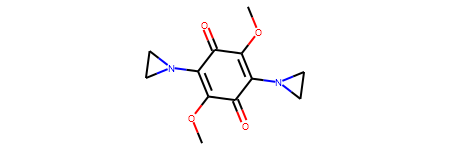

COC1=C(OC)C(=O)C(OC)=C(OC)C1=O
[0, 6, 12, 12, 6, 0, 10, 4, 12, 6, 0, 12, 6, 0, 10, 4]


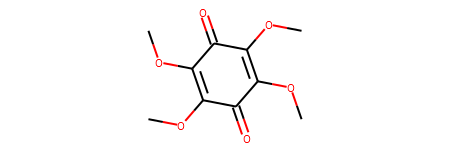

COC1=C(OC)C(=O)C=CC1=O
[0, 6, 10, 10, 6, 0, 8, 2, 4, 4, 8, 2]


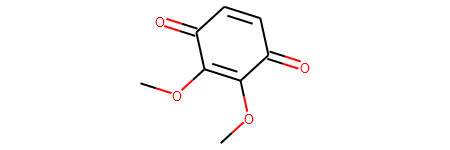

COC1C(Cl)C(Cl)C(Cl)C(Cl)C1OC
[0, 6, 12, 10, 4, 8, 2, 8, 2, 10, 4, 12, 6, 0]


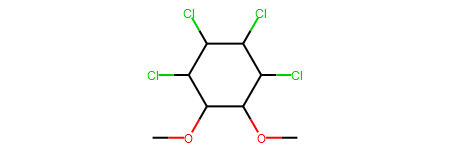

COC1C(Cl)C(Cl)C(OC)C(Cl)C1Cl
[0, 6, 12, 8, 2, 8, 2, 12, 6, 0, 8, 2, 8, 2]


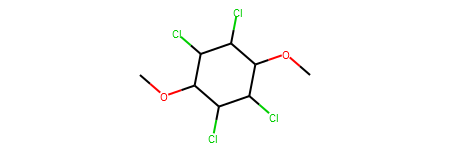

COCCOC
[0, 4, 2, 2, 4, 0]


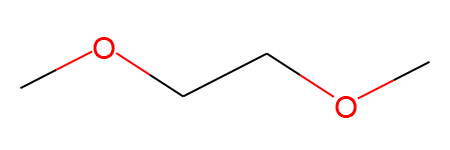

COCCOCCOC
[0, 6, 2, 4, 8, 4, 2, 6, 0]


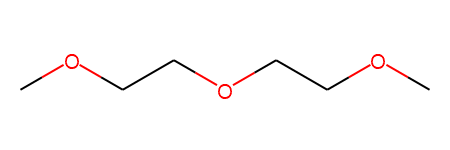

COCCOCCOCCOc1ccccc1OCCOCCOCCOC
[0, 18, 6, 8, 20, 10, 12, 22, 14, 16, 24, 26, 4, 2, 2, 4, 26, 24, 16, 14, 22, 12, 10, 20, 8, 6, 18, 0]


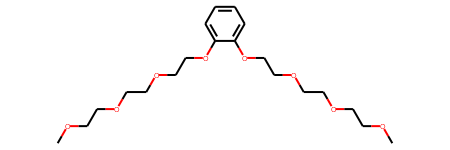

COCCOCCOc1ccc(OCCOCCOC)cc1
[0, 14, 6, 8, 16, 10, 12, 18, 20, 2, 2, 20, 18, 12, 10, 16, 8, 6, 14, 0, 2, 2]


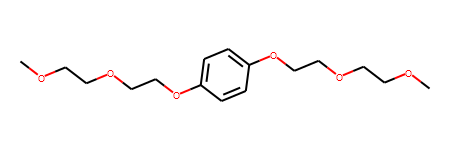

COCCOCCOc1ccccc1OCCOCCOC
[0, 14, 6, 8, 16, 10, 12, 18, 20, 4, 2, 2, 4, 20, 18, 12, 10, 16, 8, 6, 14, 0]


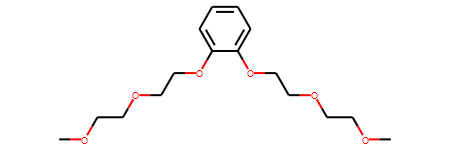

COCCOc1ccccc1OCCOC
[0, 10, 6, 8, 12, 14, 4, 2, 2, 4, 14, 12, 8, 6, 10, 0]


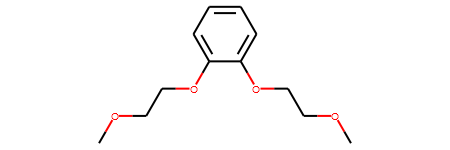

COCOC
[0, 3, 2, 3, 0]


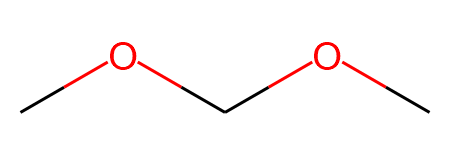

COCc1ccc(COC)cc1
[0, 8, 6, 10, 2, 2, 10, 6, 8, 0, 2, 2]


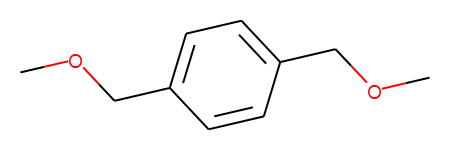

COP(=S)(OC)Oc1ccc(Sc2ccc(OP(=S)(OC)OC)cc2)cc1
[0, 14, 25, 4, 14, 0, 18, 21, 6, 10, 23, 20, 23, 10, 6, 21, 18, 25, 4, 14, 0, 14, 0, 6, 10, 10, 6]


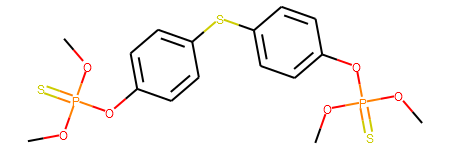

COc1c(Cl)c(Cl)c(Cl)c(Cl)c1OC
[0, 6, 12, 10, 4, 8, 2, 8, 2, 10, 4, 12, 6, 0]


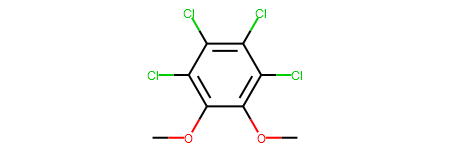

COc1c(O)c(C)c(C)c(O)c1OC
[0, 6, 12, 10, 4, 8, 2, 8, 2, 10, 4, 12, 6, 0]


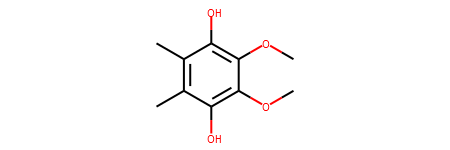

COc1c(O)c(OC)c(OC)c(O)c1OC
[0, 6, 12, 10, 4, 12, 6, 0, 12, 6, 0, 10, 4, 12, 6, 0]


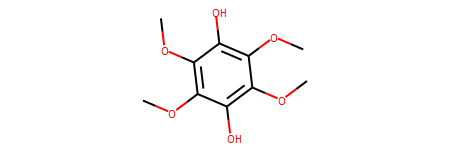

COc1c(O)ccc(O)c1OC
[0, 6, 10, 8, 2, 4, 4, 8, 2, 10, 6, 0]


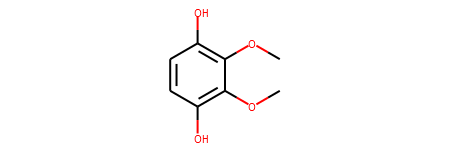

COc1c(OC)c(OC(=O)C(C)(C)C)c2ccccc2c1OC(=O)C(C)(C)C
[0, 14, 20, 20, 14, 0, 22, 16, 18, 8, 26, 2, 2, 2, 24, 12, 10, 10, 12, 24, 22, 16, 18, 8, 26, 2, 2, 2]


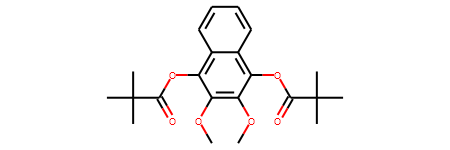

COc1c(OC)c(OC(=O)C(C)C)c2ccccc2c1OC(=O)C(C)C
[0, 12, 18, 18, 12, 0, 20, 14, 16, 6, 24, 2, 2, 22, 10, 8, 8, 10, 22, 20, 14, 16, 6, 24, 2, 2]


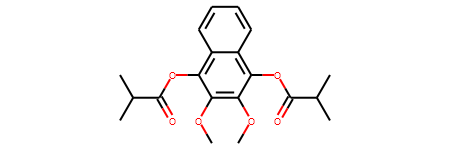

COc1c(OC)c(OC(C)=O)c2cc(C)c(C)cc2c1OC(C)=O
[0, 10, 18, 18, 10, 0, 20, 12, 14, 2, 6, 22, 8, 16, 4, 16, 4, 8, 22, 20, 12, 14, 2, 6]


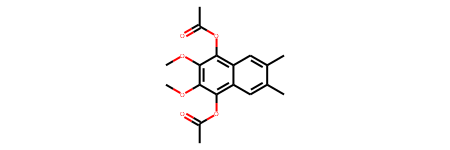

COc1c(OC)c(OC(C)=O)c2ccccc2c1OC(C)=O
[0, 10, 16, 16, 10, 0, 18, 12, 14, 2, 4, 20, 8, 6, 6, 8, 20, 18, 12, 14, 2, 4]


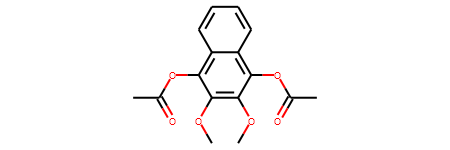

COc1cc(-c2ccc(N)c(OC)c2)ccc1N
[0, 10, 16, 8, 12, 12, 4, 6, 14, 2, 16, 10, 0, 8, 4, 6, 14, 2]


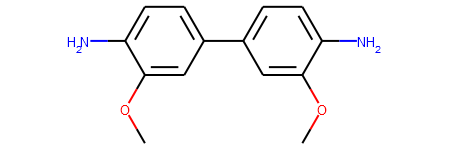

COc1cc(Cl)c(Cl)cc1OC
[0, 6, 10, 4, 8, 2, 8, 2, 4, 10, 6, 0]


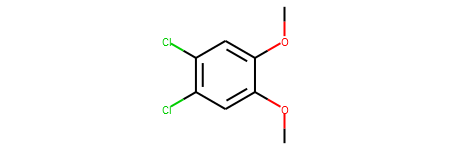

COc1ccc(-c2nc(C)c(C)nc2-c2ccc(OC)cc2)cc1
[0, 14, 16, 4, 8, 18, 22, 12, 20, 2, 20, 2, 12, 22, 18, 8, 4, 16, 14, 0, 4, 8, 8, 4]


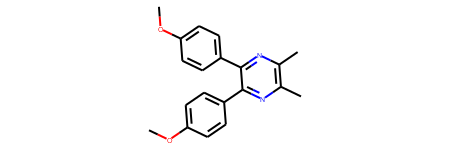

COc1ccc(-c2nccnc2-c2ccc(OC)cc2)cc1
[0, 14, 16, 4, 8, 18, 20, 12, 2, 2, 12, 20, 18, 8, 4, 16, 14, 0, 4, 8, 8, 4]


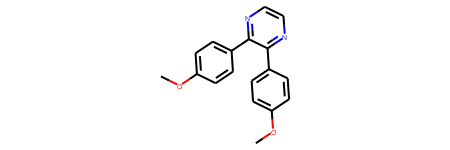

COc1ccc(/N=C/c2ccc(/C=N/c3ccc(OC)cc3)cc2)cc1
[0, 18, 24, 12, 8, 22, 16, 2, 20, 4, 4, 20, 2, 16, 22, 8, 12, 24, 18, 0, 12, 8, 4, 4, 8, 12]


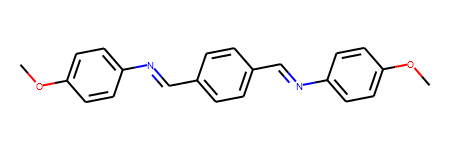

COc1ccc(OC)cc1
[0, 6, 8, 2, 2, 8, 6, 0, 2, 2]


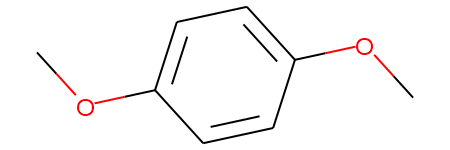

COc1ccc2[nH]c(=NCCCN3CCN(CCCN=c4[nH]c5ccc(OC)cc5n5cccc45)CC3)c3cccn3c2c1
[0, 28, 30, 4, 6, 34, 26, 32, 24, 16, 14, 18, 40, 20, 20, 40, 18, 14, 16, 24, 32, 26, 34, 6, 4, 30, 28, 0, 10, 38, 42, 12, 2, 8, 36, 20, 20, 36, 8, 2, 12, 42, 38, 10]


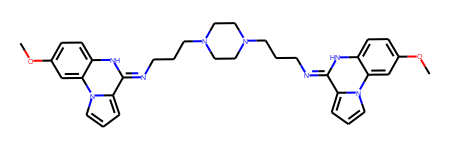

COc1ccc2[nH]c(=NCCCN3CCN(CCCN=c4[nH]c5ccc(OC)nc5n5cccc45)CC3)c3cccn3c2n1
[0, 28, 30, 4, 6, 34, 26, 32, 22, 14, 12, 16, 40, 18, 18, 40, 16, 12, 14, 22, 32, 26, 34, 6, 4, 30, 28, 0, 24, 38, 42, 10, 2, 8, 36, 18, 18, 36, 8, 2, 10, 42, 38, 24]


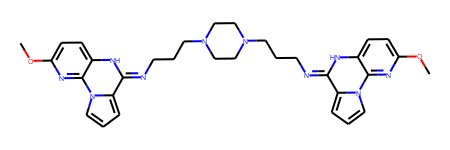

COc1ccc2[nH]c(=NCCCNCCCN=c3[nH]c4ccc(OC)cc4n4cccc34)c3cccn3c2c1
[0, 25, 27, 4, 6, 31, 23, 29, 20, 16, 14, 18, 22, 18, 14, 16, 20, 29, 23, 31, 6, 4, 27, 25, 0, 10, 35, 37, 12, 2, 8, 33, 33, 8, 2, 12, 37, 35, 10]


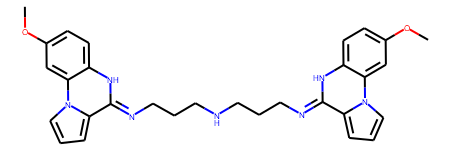

COc1ccc2c(c1)[nH]c(=NCCCN1CCN(CCCN=c3[nH]c4cc(OC)ccc4n4c(Cl)ccc34)CC1)c1ccc(Cl)n12
[0, 28, 30, 4, 12, 40, 36, 8, 26, 34, 24, 16, 14, 18, 42, 20, 20, 42, 18, 14, 16, 24, 34, 26, 36, 8, 30, 28, 0, 4, 12, 40, 44, 32, 2, 6, 10, 38, 20, 20, 38, 10, 6, 32, 2, 44]


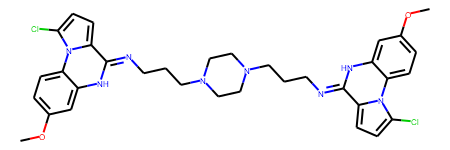

COc1ccc2c(c1)[nH]c(=NCCCN1CCN(CCCN=c3[nH]c4cc(OC)ccc4n4cccc34)CC1)c1cccn12
[0, 28, 30, 4, 10, 38, 34, 6, 26, 32, 24, 16, 14, 18, 40, 20, 20, 40, 18, 14, 16, 24, 32, 26, 34, 6, 30, 28, 0, 4, 10, 38, 42, 12, 2, 8, 36, 20, 20, 36, 8, 2, 12, 42]


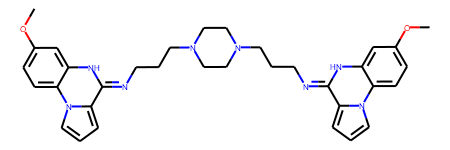

COc1ccc2c(c1)[nH]c(=NCCCNCCCN=c1[nH]c3cc(OC)ccc3n3cccc13)c1cccn12
[0, 25, 27, 4, 10, 35, 31, 6, 23, 29, 20, 16, 14, 18, 22, 18, 14, 16, 20, 29, 23, 31, 6, 27, 25, 0, 4, 10, 35, 37, 12, 2, 8, 33, 33, 8, 2, 12, 37]


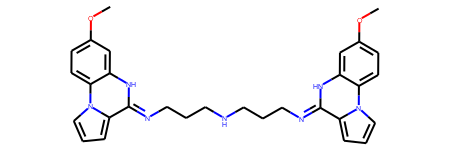

COc1cccc(OCCn2c(=O)c3cc4c(=O)n(CCOc5cccc(OC)c5)c(=O)c4cc3c2=O)c1
[0, 20, 24, 8, 6, 10, 26, 22, 16, 18, 36, 28, 2, 32, 14, 32, 28, 2, 36, 18, 16, 22, 26, 10, 6, 8, 24, 20, 0, 12, 28, 2, 32, 14, 32, 28, 2, 12]


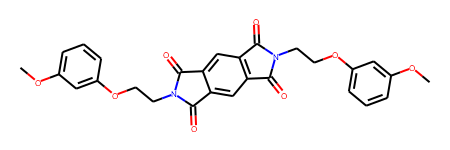

COc1ccccc1OC
[0, 6, 8, 4, 2, 2, 4, 8, 6, 0]


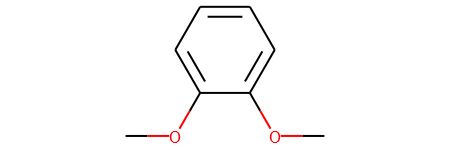

COc1cnc(OC)cn1
[0, 6, 8, 2, 4, 8, 6, 0, 2, 4]


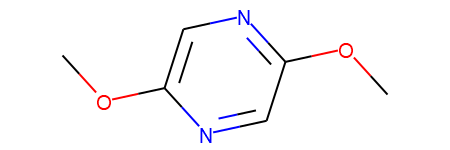

COc1nnc(OC)c2ccccc12
[0, 8, 10, 6, 6, 10, 8, 0, 12, 4, 2, 2, 4, 12]


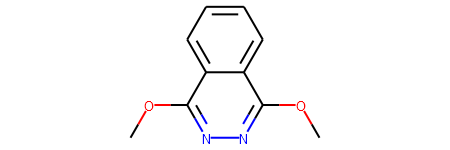

CS(=O)(=O)OCCCCOS(C)(=O)=O
[0, 12, 2, 2, 10, 8, 6, 6, 8, 10, 12, 0, 2, 2]


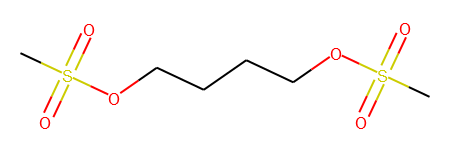

CS(=O)(=O)OCCCNCCCOS(C)(=O)=O
[0, 15, 2, 2, 13, 10, 6, 8, 12, 8, 6, 10, 13, 15, 0, 2, 2]


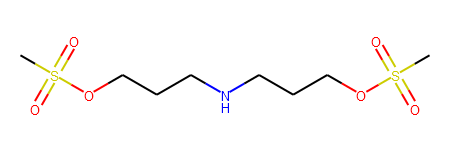

CS(C)(=O)=O
[0, 4, 0, 2, 2]


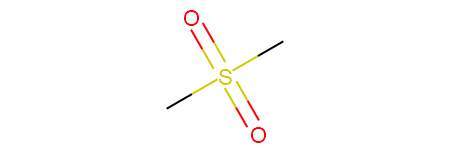

CSC(C)=NOC(=O)N(C)SN(C)C(=O)ON=C(C)SC
[0, 12, 17, 2, 8, 10, 15, 6, 19, 4, 14, 19, 4, 15, 6, 10, 8, 17, 2, 12, 0]


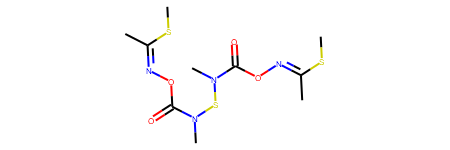

CSc1ccc(SC)nn1
[0, 6, 8, 2, 2, 8, 6, 0, 4, 4]


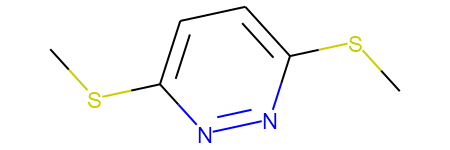

C[C@@H]1CCCCN1C(=O)CCCCC(=O)N1CCCC[C@H]1C
[0, 18, 12, 6, 8, 14, 20, 16, 2, 10, 4, 4, 10, 16, 2, 20, 14, 8, 6, 12, 18, 0]


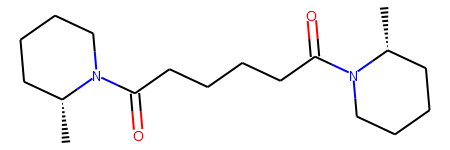

C[N+](C)(C)[N-]C(=O)CCCCC(=O)[N-][N+](C)(C)C
[0, 16, 0, 0, 12, 14, 6, 10, 8, 8, 10, 14, 6, 12, 16, 0, 0, 0]


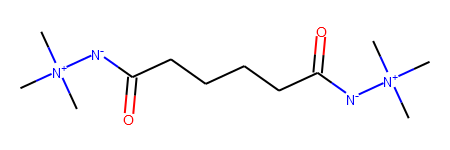

Cc1c(C)c(C)c(C)c(C)c1C
[0, 6, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0]


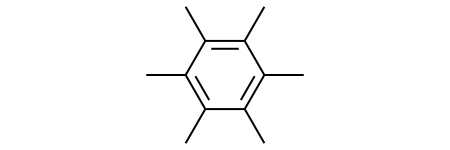

Cc1c(O)ccc(O)c1C
[0, 8, 6, 2, 4, 4, 6, 2, 8, 0]


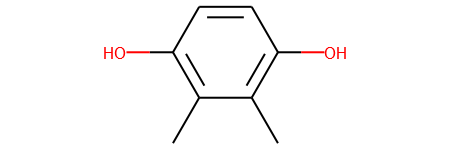

Cc1c2ccccc2c(C)c2ccccc12
[0, 10, 12, 6, 2, 2, 6, 12, 10, 0, 12, 6, 2, 2, 6, 12]


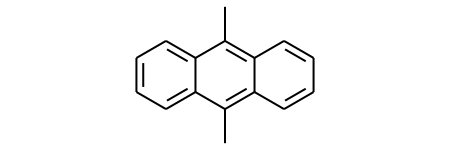

Cc1cc(-c2ccc(N)c(C)c2)ccc1N
[0, 12, 6, 10, 10, 4, 8, 14, 2, 12, 0, 6, 4, 8, 14, 2]


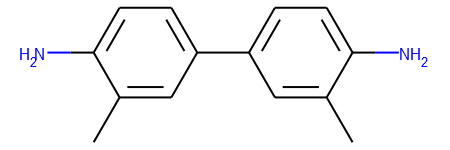

Cc1cc(C)c(C)cc1C
[0, 6, 4, 6, 0, 6, 0, 4, 6, 0]


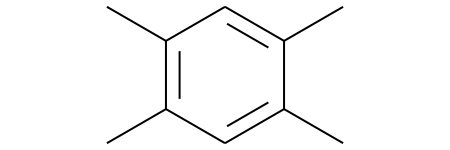

Cc1cc(C)cc(C)c1
[0, 6, 3, 6, 0, 3, 6, 0, 3]


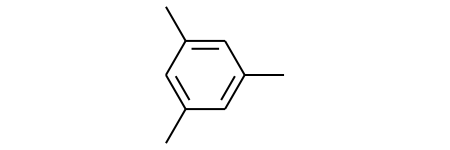

Cc1cc(C)n2nc(SCC(=O)NCCNC(=O)CSc3nc4nc(C)cc(C)n4n3)nc2n1
[0, 24, 6, 28, 2, 32, 16, 26, 20, 10, 22, 4, 18, 8, 8, 18, 22, 4, 10, 20, 26, 14, 30, 12, 24, 0, 6, 28, 2, 32, 16, 14, 30, 12]


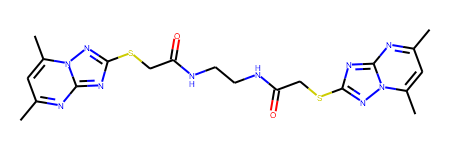

Cc1cc(Cc2cc(C)cc(C(C)(C)C)c2O)c(O)c(C(C)(C)C)c1
[0, 15, 10, 17, 14, 17, 10, 15, 0, 12, 19, 23, 2, 2, 2, 21, 8, 21, 8, 19, 23, 2, 2, 2, 12]


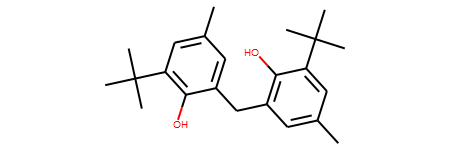

Cc1cc2[nH]c(=O)c(=O)[nH]c2cc1C
[0, 8, 4, 12, 6, 10, 2, 10, 2, 6, 12, 4, 8, 0]


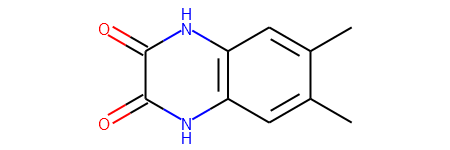

Cc1cc2c(cc1C)C(=O)C=CC2=O
[0, 10, 6, 12, 12, 6, 10, 0, 8, 2, 4, 4, 8, 2]


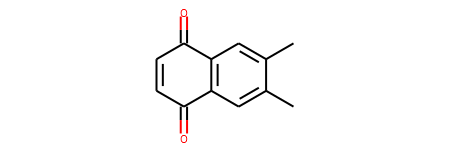

Cc1cc2ccccc2cc1C
[0, 8, 6, 10, 4, 2, 2, 4, 10, 6, 8, 0]


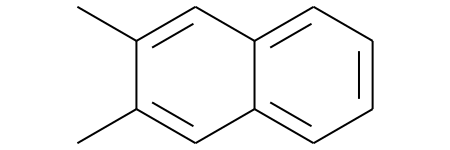

Cc1cc2nccnc2cc1C
[0, 8, 4, 10, 6, 2, 2, 6, 10, 4, 8, 0]


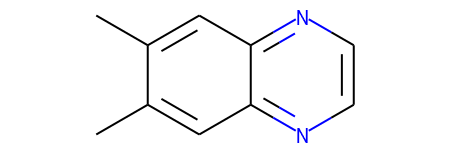

Cc1ccc(-c2ccc(C)cc2)cc1
[0, 10, 2, 6, 12, 12, 6, 2, 10, 0, 2, 6, 6, 2]


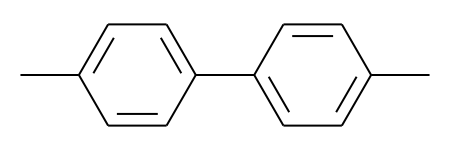

Cc1ccc(-c2nccnc2-c2ccc(C)cc2)cc1
[0, 14, 4, 8, 16, 18, 12, 2, 2, 12, 18, 16, 8, 4, 14, 0, 4, 8, 8, 4]


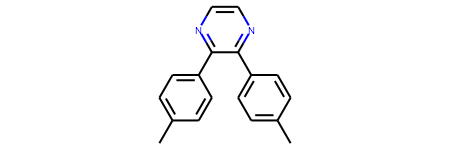

Cc1ccc(-n2c(=O)c3cc4c(=O)n(-c5ccc(C)c(C)c5)c(=O)c4cc3c2=O)cc1C
[0, 18, 10, 8, 16, 30, 22, 4, 26, 14, 26, 22, 4, 30, 16, 8, 10, 18, 0, 20, 2, 12, 22, 4, 26, 14, 26, 22, 4, 12, 20, 2]


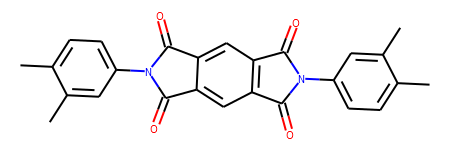

Cc1ccc(/C=C/C(=O)NCCNC(=O)/C=C/c2ccc(C)o2)o1
[0, 20, 8, 10, 22, 6, 4, 18, 2, 14, 12, 12, 14, 18, 2, 4, 6, 22, 10, 8, 20, 0, 16, 16]


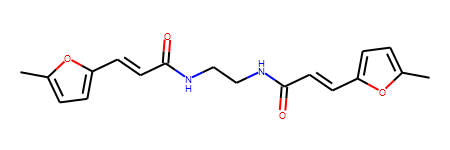

Cc1ccc(C)[nH]1
[0, 5, 2, 2, 5, 0, 4]


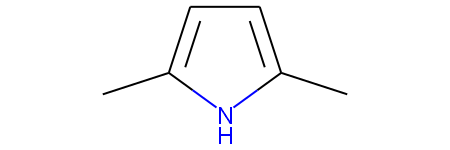

Cc1ccc(C)c(C)c1C
[0, 6, 4, 4, 6, 0, 8, 2, 8, 2]


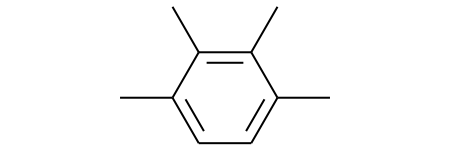

Cc1ccc(C)c2ccccc12
[0, 8, 4, 4, 8, 0, 10, 6, 2, 2, 6, 10]


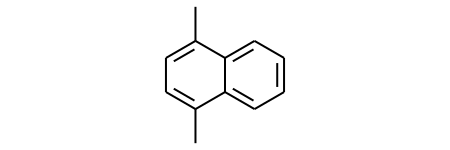

Cc1ccc(C)cc1
[0, 6, 2, 2, 6, 0, 2, 2]


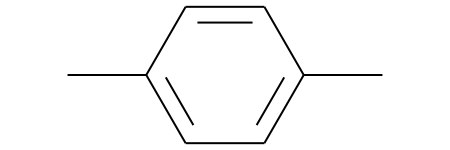

Cc1ccc(C)o1
[0, 5, 2, 2, 5, 0, 4]


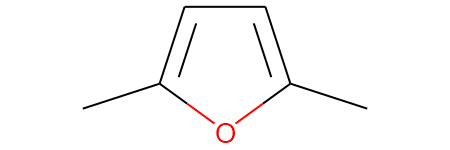

Cc1ccc(S(=O)(=O)N2CCCN(S(=O)(=O)c3ccc(C)cc3C)CC2)c(C)c1
[0, 19, 8, 12, 23, 27, 4, 4, 25, 15, 14, 15, 25, 27, 4, 4, 23, 12, 8, 19, 0, 10, 21, 2, 17, 17, 21, 2, 10]


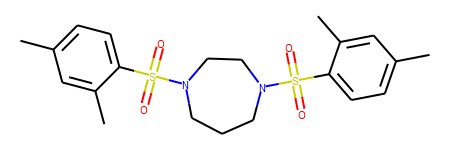

Cc1ccc2cc(C)ccc2c1
[0, 8, 2, 4, 10, 6, 8, 0, 2, 4, 10, 6]


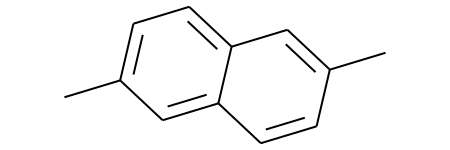

Cc1cccc2c(C)cccc12
[0, 8, 4, 2, 6, 10, 8, 0, 4, 2, 6, 10]


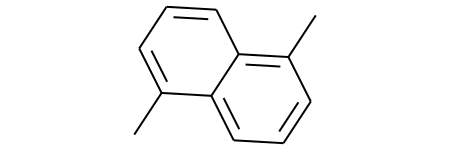

Cc1ccccc1C
[0, 6, 4, 2, 2, 4, 6, 0]


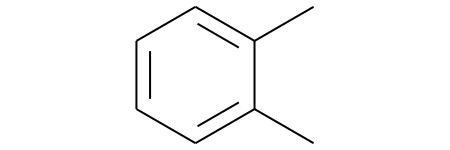

Cc1ccccc1OCC(=O)NCCNC(=O)COc1ccccc1C
[0, 22, 8, 4, 6, 10, 24, 18, 14, 20, 2, 16, 12, 12, 16, 20, 2, 14, 18, 24, 10, 6, 4, 8, 22, 0]


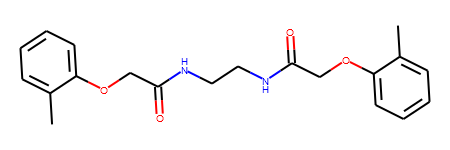

Cc1ccccc1OCC(O)CNCC(O)COc1ccccc1C
[0, 19, 8, 4, 6, 10, 21, 17, 14, 23, 2, 12, 16, 12, 23, 2, 14, 17, 21, 10, 6, 4, 8, 19, 0]


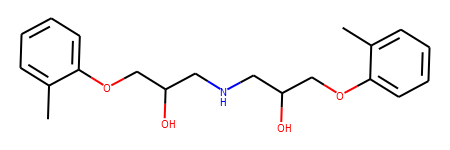

Cc1cnc(C)cn1
[0, 6, 2, 4, 6, 0, 2, 4]


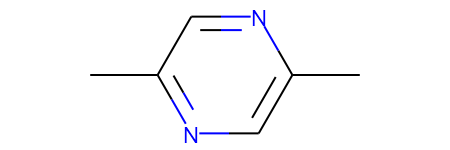

Cc1nc(C)c(C)nc1C
[0, 6, 4, 6, 0, 6, 0, 4, 6, 0]


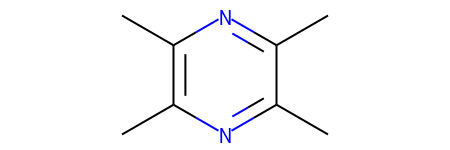

Cc1nc(Cl)c(C)nc1Cl
[0, 6, 4, 8, 2, 6, 0, 4, 8, 2]


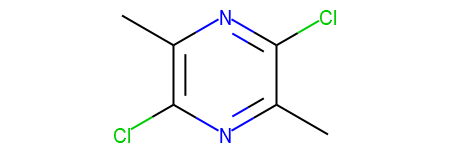

Cc1nc2c(=N)[nH][nH]c(=N)c2nc1C
[0, 8, 4, 12, 10, 2, 6, 6, 10, 2, 12, 4, 8, 0]


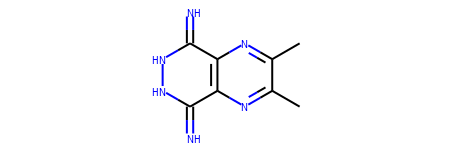

Cc1nccnc1C
[0, 6, 4, 2, 2, 4, 6, 0]


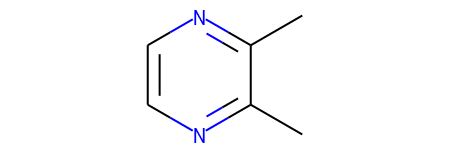

Cc1nn(-c2ccccc2)c(C)c1-c1nnc(-c2c(C)nn(-c3ccccc3)c2C)o1
[0, 23, 16, 29, 19, 10, 6, 4, 6, 10, 27, 2, 25, 21, 14, 14, 21, 25, 23, 0, 16, 29, 19, 10, 6, 4, 6, 10, 27, 2, 18]


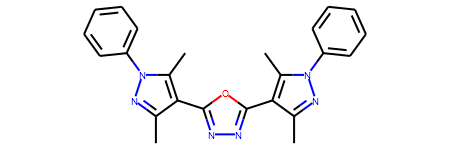

Cc1nnc(C)s1
[0, 5, 2, 2, 5, 0, 4]


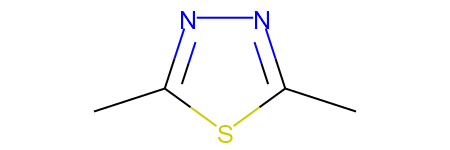

Cc1nonc1C
[0, 5, 2, 4, 2, 5, 0]


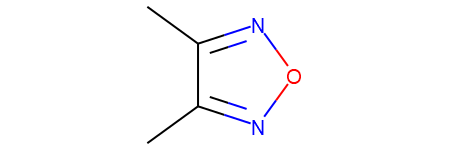

Cc1nsnc1C
[0, 5, 2, 4, 2, 5, 0]


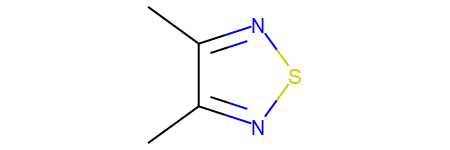

ClC(Cl)(Cl)C(Cl)(Cl)Cl
[0, 6, 0, 0, 6, 0, 0, 0]


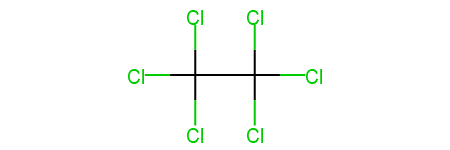

ClC(Cl)(Cl)Cl
[0, 4, 0, 0, 0]


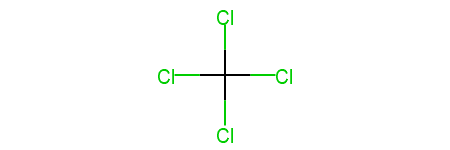

ClC(Cl)(Cl)c1ccc(C(Cl)(Cl)Cl)cc1
[0, 12, 0, 0, 10, 6, 6, 10, 12, 0, 0, 0, 6, 6]


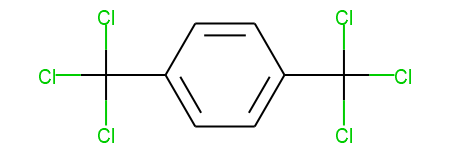

ClC(Cl)(Cl)c1nc(C(Cl)(Cl)Cl)nc(C(Cl)(Cl)Cl)n1
[0, 15, 0, 0, 12, 9, 12, 15, 0, 0, 0, 9, 12, 15, 0, 0, 0, 9]


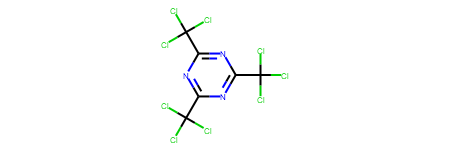

ClC(Cl)=C(Cl)C(Cl)=C(Cl)Cl
[0, 6, 0, 8, 4, 8, 4, 6, 0, 0]


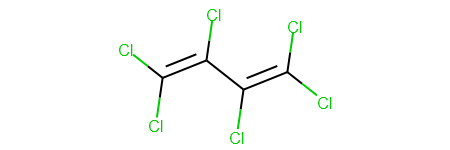

ClC(Cl)=C(Cl)Cl
[0, 4, 0, 4, 0, 0]


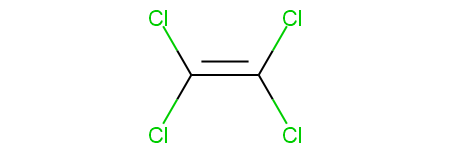

ClC(Cl)C(Cl)Cl
[0, 4, 0, 4, 0, 0]


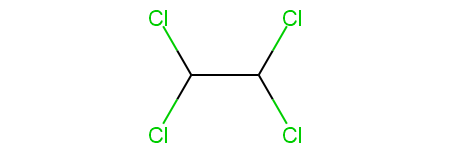

ClC1(Cl)C2(Cl)C3(Cl)C4(Cl)C(Cl)(Cl)C5(Cl)C3(Cl)C1(Cl)C5(Cl)C24Cl
[0, 12, 0, 14, 4, 18, 8, 14, 4, 12, 0, 0, 14, 4, 18, 8, 14, 4, 18, 8, 18, 8]


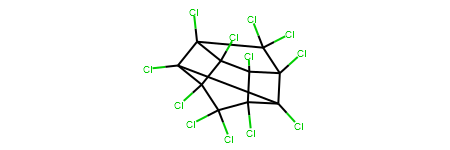

ClC1=C(Cl)C(Cl)(Cl)C(Cl)=C1Cl
[0, 6, 8, 2, 10, 4, 4, 8, 2, 6, 0]


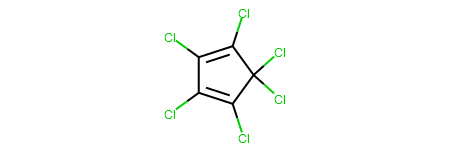

ClC1=C(Cl)C(Cl)C(Cl)C(Cl)C1Cl
[0, 6, 6, 0, 8, 2, 10, 4, 10, 4, 8, 2]


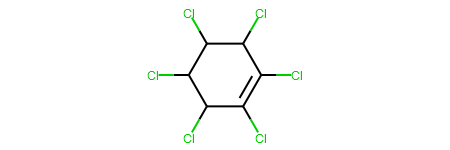

ClC1C(Cl)C(Cl)C(Br)C(Br)C1Cl
[0, 6, 6, 0, 8, 2, 10, 4, 10, 4, 8, 2]


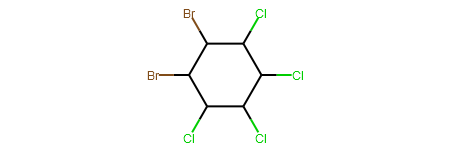

ClC1C(Cl)C(Cl)C(Cl)C(Cl)C1Cl
[0, 6, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0]


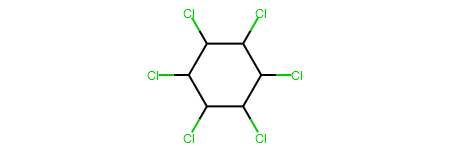

ClC1C=CC(Cl)C(Cl)C1Cl
[0, 6, 4, 4, 6, 0, 8, 2, 8, 2]


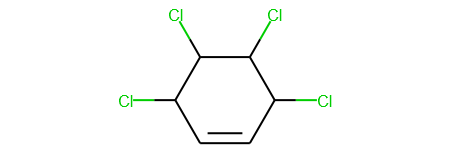

ClC1CC(Cl)C(Cl)CC1Cl
[0, 6, 4, 6, 0, 6, 0, 4, 6, 0]


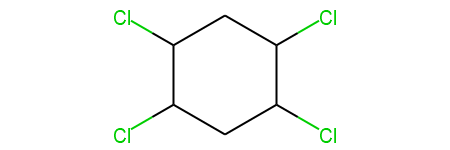

ClC1CCCCC1Cl
[0, 6, 4, 2, 2, 4, 6, 0]


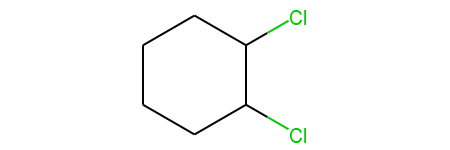

ClCC#CCCl
[0, 4, 2, 2, 4, 0]


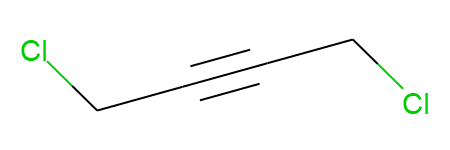

ClCC(Cl)(Cl)CCl
[0, 4, 6, 2, 2, 4, 0]


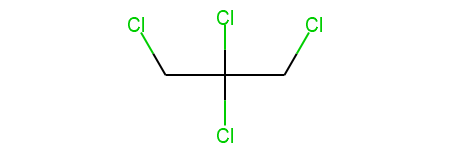

ClCCCCl
[0, 2, 4, 2, 0]


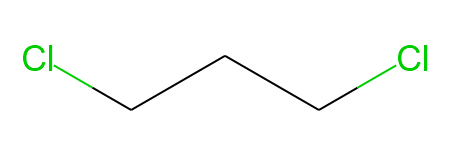

ClCCOCCCl
[0, 2, 4, 6, 4, 2, 0]


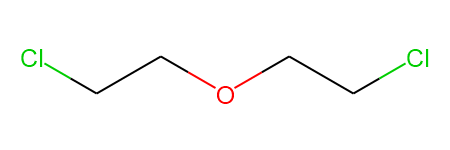

Clc1c(Cl)c(Cl)c(-c2c(Cl)c(Cl)c(Cl)c(Cl)c2Cl)c(Cl)c1Cl
[0, 10, 12, 2, 16, 6, 20, 20, 16, 6, 12, 2, 10, 0, 12, 2, 16, 6, 16, 6, 12, 2]


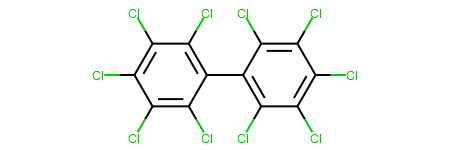

Clc1c(Cl)c(Cl)c(Cl)c(Cl)c1Cl
[0, 6, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0]


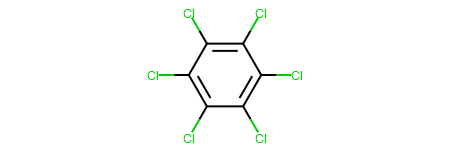

Clc1c(Cl)c(Cl)c(Oc2c(Cl)c(Cl)c(Cl)c(Cl)c2Cl)c(Cl)c1Cl
[0, 11, 13, 2, 17, 6, 21, 10, 21, 17, 6, 13, 2, 11, 0, 13, 2, 17, 6, 17, 6, 13, 2]


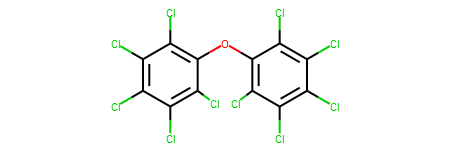

Clc1c(Cl)c(Cl)c2c(Cl)c(Cl)c(Cl)c(Cl)c2c1Cl
[0, 8, 8, 0, 12, 4, 16, 12, 4, 8, 0, 8, 0, 12, 4, 16, 12, 4]


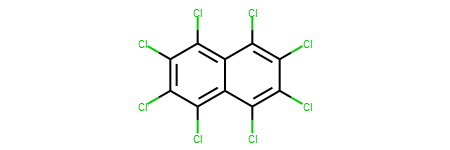

Clc1c(Cl)c(Cl)c2c(c1Cl)Oc1c(Cl)c(Cl)c(Cl)c(Cl)c1O2
[0, 10, 10, 0, 14, 4, 18, 18, 14, 4, 8, 18, 14, 4, 10, 0, 10, 0, 14, 4, 18, 8]


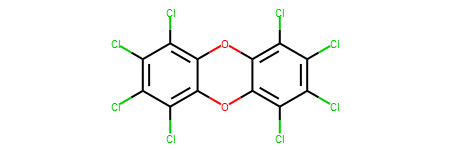

Clc1c(Cl)c(Cl)c2c(c1Cl)Oc1ccccc1O2
[0, 12, 12, 0, 14, 2, 16, 16, 14, 2, 8, 10, 6, 4, 4, 6, 10, 8]


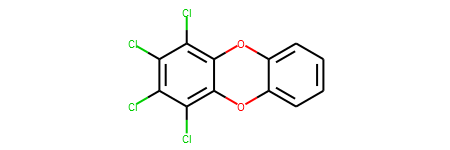

Clc1c(Cl)c(Cl)c2c(oc3c(Cl)c(Cl)c(Cl)c(Cl)c32)c1Cl
[0, 9, 11, 2, 15, 6, 19, 17, 8, 17, 13, 4, 9, 0, 11, 2, 15, 6, 19, 13, 4]


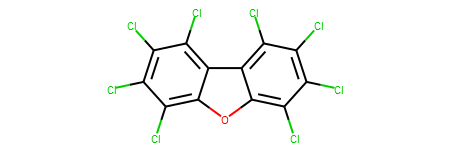

Clc1c(Cl)c(Cl)c2ccccc2c1Cl
[0, 8, 8, 0, 10, 2, 12, 6, 4, 4, 6, 12, 10, 2]


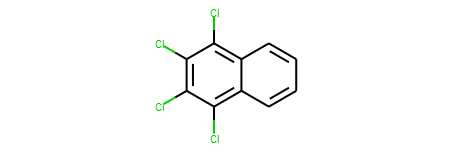

Clc1cc(-c2cc(Cl)c(Cl)c(Cl)c2)cc(Cl)c1Cl
[0, 12, 6, 10, 10, 6, 12, 0, 16, 4, 12, 0, 6, 6, 12, 0, 16, 4]


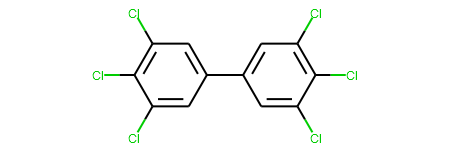

Clc1cc(-c2cc(Cl)c(Cl)c(Cl)c2Cl)c(Cl)c(Cl)c1Cl
[0, 10, 8, 12, 12, 8, 10, 0, 14, 2, 18, 6, 16, 4, 16, 4, 18, 6, 14, 2]


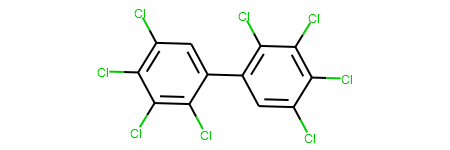

Clc1cc(Cl)c(-c2c(Cl)cc(Cl)cc2Cl)c(Cl)c1
[0, 10, 6, 12, 2, 16, 16, 12, 2, 6, 10, 0, 6, 12, 2, 12, 2, 6]


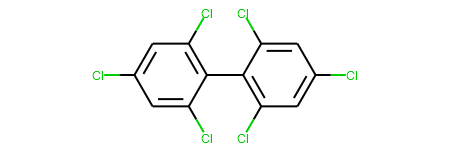

Clc1cc(Cl)c(-c2cc(Cl)c(Cl)cc2Cl)cc1Cl
[0, 10, 6, 14, 4, 16, 16, 8, 12, 2, 10, 0, 6, 14, 4, 8, 12, 2]


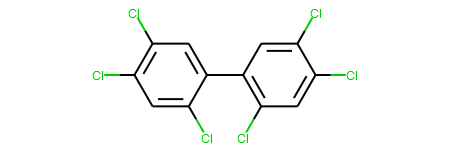

Clc1cc(Cl)c(Cl)c(-c2c(Cl)c(Cl)cc(Cl)c2Cl)c1Cl
[0, 10, 8, 10, 0, 14, 4, 18, 18, 14, 4, 10, 0, 8, 10, 0, 14, 4, 14, 4]


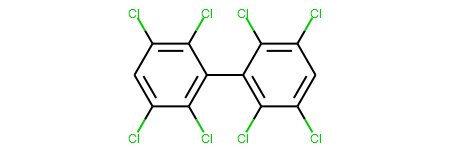

Clc1cc(Cl)c(Cl)c(-c2cc(Cl)cc(Cl)c2Cl)c1
[0, 10, 6, 12, 2, 16, 4, 14, 14, 8, 10, 0, 6, 12, 2, 16, 4, 8]


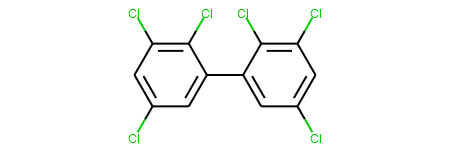

Clc1cc(Cl)c(Cl)cc1Cl
[0, 6, 4, 6, 0, 6, 0, 4, 6, 0]


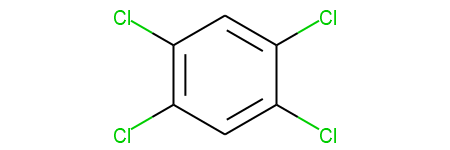

Clc1cc(Cl)c(Oc2cc(Cl)c(Cl)cc2Cl)cc1Cl
[0, 11, 6, 15, 4, 17, 10, 17, 8, 13, 2, 11, 0, 6, 15, 4, 8, 13, 2]


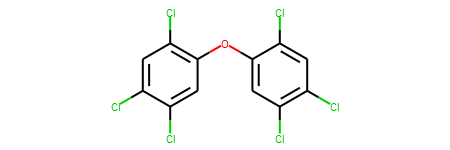

Clc1cc(Cl)c2c(c1)oc1cc(Cl)cc(Cl)c12
[0, 9, 4, 11, 2, 15, 13, 6, 8, 13, 6, 9, 0, 4, 11, 2, 15]


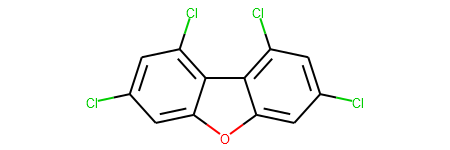

Clc1cc(Cl)c2cc(Cl)cc(Cl)c2c1
[0, 8, 4, 10, 2, 12, 6, 8, 0, 4, 10, 2, 12, 6]


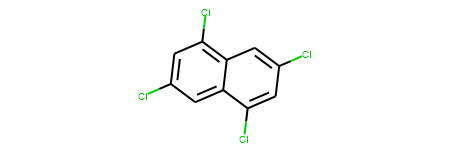

Clc1cc(Cl)cc(-c2cc(Cl)cc(Cl)c2)c1
[0, 10, 4, 10, 0, 6, 14, 14, 6, 10, 0, 4, 10, 0, 6, 6]


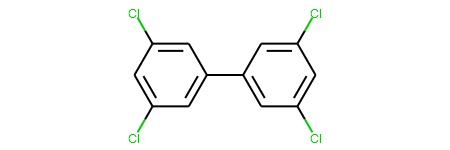

Clc1cc(Cl)cc(Cl)c1
[0, 6, 3, 6, 0, 3, 6, 0, 3]


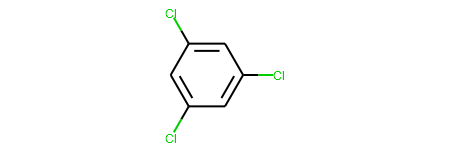

Clc1cc(Oc2cc(Cl)c(Cl)c(Cl)c2Cl)c(Cl)c(Cl)c1Cl
[0, 11, 8, 13, 10, 13, 8, 11, 0, 15, 2, 19, 6, 17, 4, 17, 4, 19, 6, 15, 2]


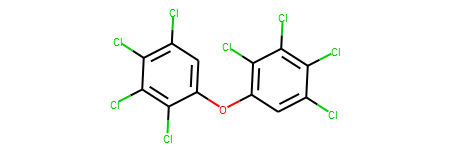

Clc1cc2c(Cl)c(Cl)c(Cl)c(Cl)c2cc1Cl
[0, 8, 6, 14, 12, 4, 10, 2, 10, 2, 12, 4, 14, 6, 8, 0]


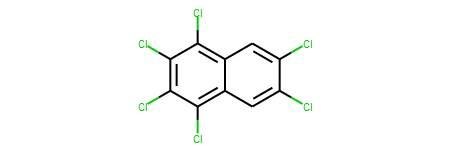

Clc1cc2c(Cl)ccc(Cl)c2cc1Cl
[0, 8, 6, 12, 10, 2, 4, 4, 10, 2, 12, 6, 8, 0]


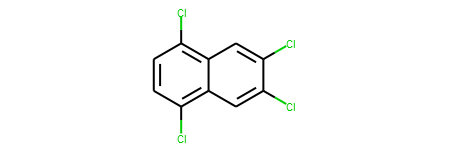

Clc1cc2c(cc1Cl)=c1cc(Cl)c(Cl)cc1=2
[0, 8, 4, 12, 12, 4, 8, 0, 12, 4, 8, 0, 8, 0, 4, 12]


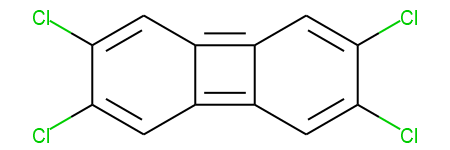

Clc1cc2c(cc1Cl)Oc1c(Cl)ccc(Cl)c1O2
[0, 10, 6, 14, 14, 6, 10, 0, 8, 16, 12, 2, 4, 4, 12, 2, 16, 8]


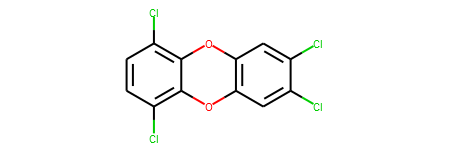

Clc1cc2c(cc1Cl)Oc1cc(Cl)c(Cl)cc1O2
[0, 10, 4, 14, 14, 4, 10, 0, 8, 14, 4, 10, 0, 10, 0, 4, 14, 8]


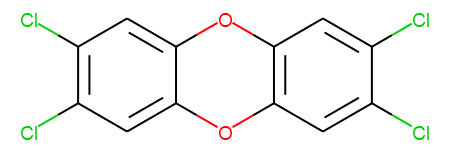

Clc1cc2ccccc2cc1Cl
[0, 8, 6, 10, 4, 2, 2, 4, 10, 6, 8, 0]


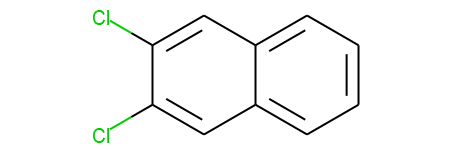

Clc1cc2oc3cc(Cl)c(Cl)cc3c2cc1Cl
[0, 9, 4, 13, 8, 13, 4, 9, 0, 11, 2, 6, 15, 15, 6, 11, 2]


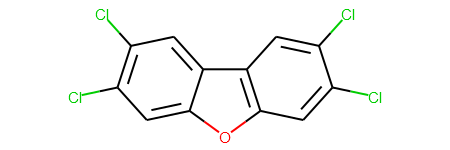

Clc1ccc(-c2ccc(Cl)c(Cl)c2)cc1Cl
[0, 12, 6, 4, 10, 10, 4, 6, 12, 0, 14, 2, 8, 8, 14, 2]


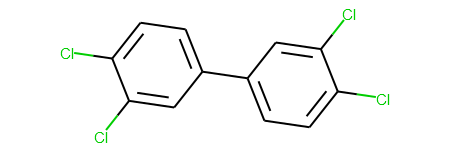

Clc1ccc(-c2ccc(Cl)c(Cl)c2Cl)c(Cl)c1Cl
[0, 10, 6, 8, 12, 12, 8, 6, 10, 0, 14, 2, 16, 4, 16, 4, 14, 2]


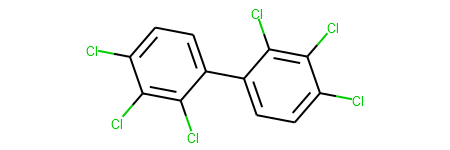

Clc1ccc(-c2ccc(Cl)cc2)cc1
[0, 10, 2, 6, 12, 12, 6, 2, 10, 0, 2, 6, 6, 2]


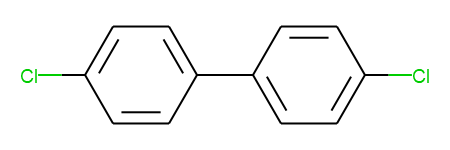

Clc1ccc(-c2ccc(Cl)cc2Cl)c(Cl)c1
[0, 10, 4, 8, 14, 14, 8, 4, 10, 0, 6, 12, 2, 12, 2, 6]


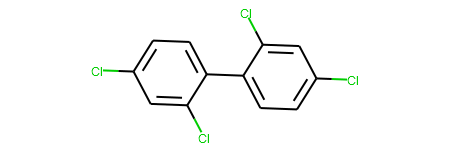

Clc1ccc(Cl)c(-c2c(Cl)ccc(Cl)c2Cl)c1Cl
[0, 10, 6, 8, 12, 2, 16, 16, 12, 2, 8, 6, 10, 0, 14, 4, 14, 4]


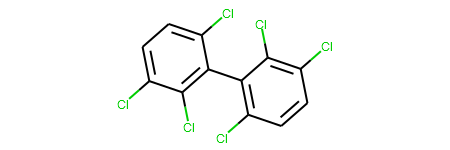

Clc1ccc(Cl)c(-c2cc(Cl)ccc2Cl)c1
[0, 10, 4, 6, 12, 2, 14, 14, 8, 10, 0, 4, 6, 12, 2, 8]


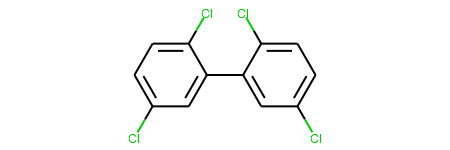

Clc1ccc(Cl)c(Cl)c1Cl
[0, 6, 4, 4, 6, 0, 8, 2, 8, 2]


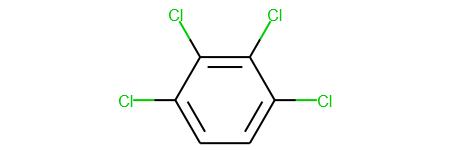

Clc1ccc(Cl)c2ccccc12
[0, 8, 4, 4, 8, 0, 10, 6, 2, 2, 6, 10]


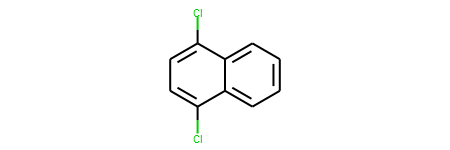

Clc1ccc(Cl)cc1
[0, 6, 2, 2, 6, 0, 2, 2]


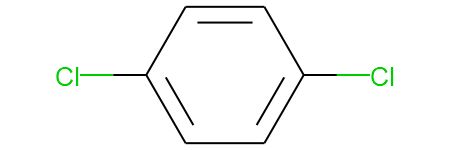

Clc1ccc(Cl)nn1
[0, 6, 2, 2, 6, 0, 4, 4]


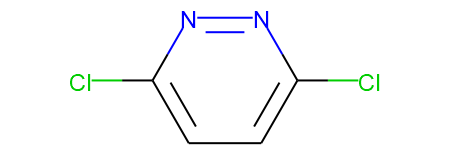

Clc1ccc(Oc2ccc(Cl)c(Cl)c2)cc1Cl
[0, 13, 6, 4, 11, 10, 11, 4, 6, 13, 0, 15, 2, 8, 8, 15, 2]


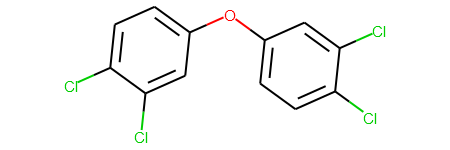

Clc1ccc(Oc2ccc(Cl)c(Cl)c2Cl)c(Cl)c1Cl
[0, 11, 6, 8, 13, 10, 13, 8, 6, 11, 0, 15, 2, 17, 4, 17, 4, 15, 2]


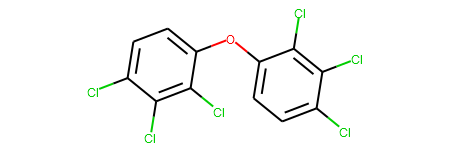

Clc1ccc(Oc2ccc(Cl)cc2)cc1
[0, 11, 2, 6, 13, 10, 13, 6, 2, 11, 0, 2, 6, 6, 2]


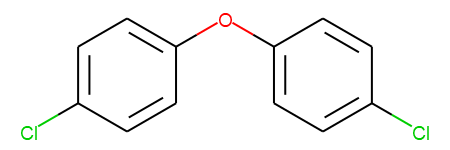

Clc1ccc(Oc2ccc(Cl)cc2Cl)c(Cl)c1
[0, 11, 4, 8, 15, 10, 15, 8, 4, 11, 0, 6, 13, 2, 13, 2, 6]


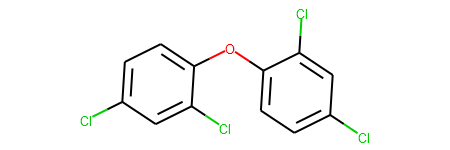

Clc1ccc2[nH]c(=NCCCN3CCN(CCCN=c4[nH]c5ccc(Cl)cc5n5cccc45)CC3)c3cccn3c2c1
[0, 28, 4, 6, 32, 26, 30, 24, 16, 14, 18, 38, 20, 20, 38, 18, 14, 16, 24, 30, 26, 32, 6, 4, 28, 0, 10, 36, 40, 12, 2, 8, 34, 20, 20, 34, 8, 2, 12, 40, 36, 10]


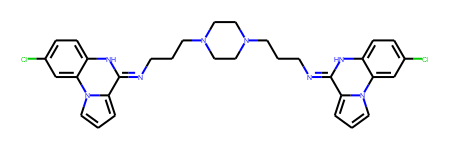

Clc1ccc2[nH]c(=NCCCNCCCN=c3[nH]c4ccc(Cl)cc4n4cccc34)c3cccn3c2c1
[0, 25, 4, 6, 29, 23, 27, 20, 16, 14, 18, 22, 18, 14, 16, 20, 27, 23, 29, 6, 4, 25, 0, 10, 33, 35, 12, 2, 8, 31, 31, 8, 2, 12, 35, 33, 10]


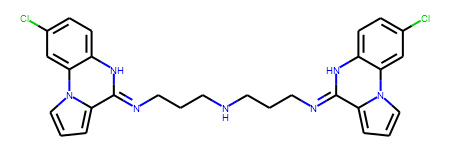

Clc1ccc2c(c1)Oc1ccc(Cl)cc1O2
[0, 10, 2, 4, 12, 14, 6, 8, 12, 4, 2, 10, 0, 6, 14, 8]


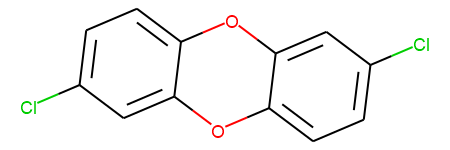

Clc1cccc(-c2cccc(Cl)c2)c1
[0, 10, 4, 2, 6, 12, 12, 6, 2, 4, 10, 0, 8, 8]


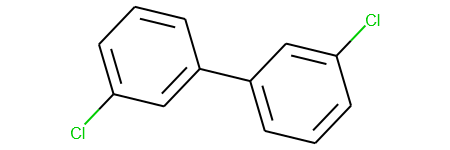

Clc1cccc(-c2cccc(Cl)c2Cl)c1Cl
[0, 10, 6, 4, 8, 12, 12, 8, 4, 6, 10, 0, 14, 2, 14, 2]


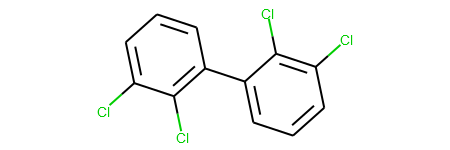

Clc1cccc(Cl)c1-c1c(Cl)cccc1Cl
[0, 10, 6, 4, 6, 10, 0, 14, 14, 10, 0, 6, 4, 6, 10, 0]


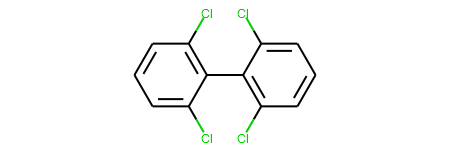

Clc1cccc2c(Cl)cccc12
[0, 8, 4, 2, 6, 10, 8, 0, 4, 2, 6, 10]


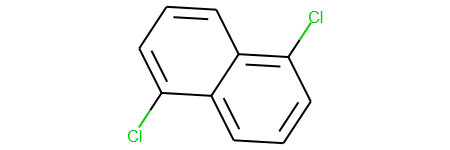

Clc1ccccc1-c1ccccc1Cl
[0, 10, 6, 2, 4, 8, 12, 12, 8, 4, 2, 6, 10, 0]


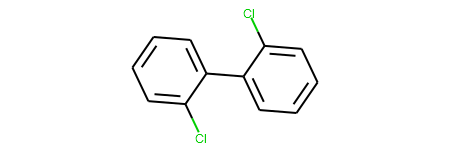

Clc1ccccc1-c1nnc(-c2ccccc2Cl)nn1
[0, 16, 6, 2, 4, 8, 18, 14, 10, 10, 14, 18, 8, 4, 2, 6, 16, 0, 10, 10]


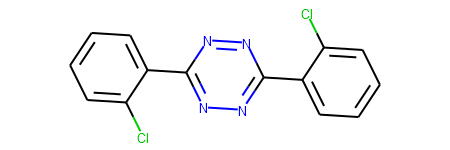

Clc1ccccc1Cl
[0, 6, 4, 2, 2, 4, 6, 0]


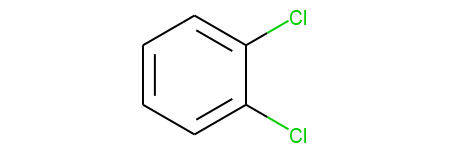

Clc1cnc(Cl)cn1
[0, 6, 2, 4, 6, 0, 2, 4]


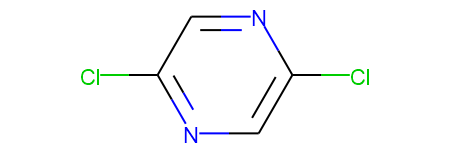

Cn1c(=O)c(=O)n(C)c2ccccc21
[0, 12, 8, 2, 8, 2, 12, 0, 10, 6, 4, 4, 6, 10]


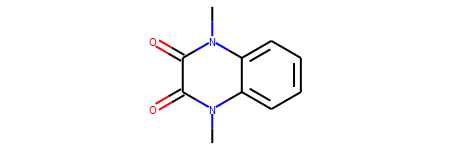

Cn1c(N)c(C(=O)CSc2nc3ccccc3nc2SCC(=O)c2c(N)n(C)c(=O)n(C)c2=O)c(=O)n(C)c1=O
[0, 36, 28, 4, 26, 22, 6, 16, 20, 24, 18, 34, 14, 12, 12, 14, 34, 18, 24, 20, 16, 22, 6, 26, 28, 4, 36, 0, 32, 10, 38, 2, 30, 8, 30, 8, 38, 2, 32, 10]


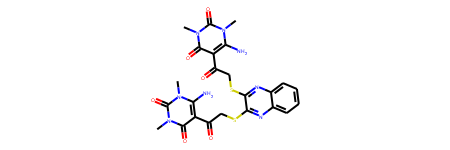

FC(F)(Cl)C(F)(F)Cl
[0, 6, 0, 4, 6, 0, 0, 4]


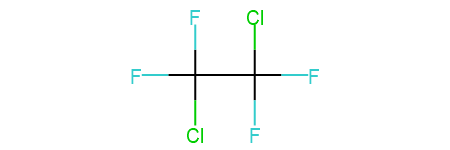

FC(F)(Cl)Cl
[0, 4, 0, 2, 2]


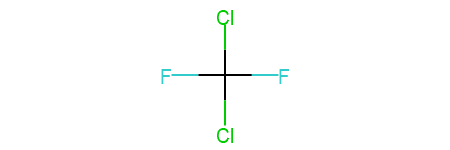

FC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F
[0, 12, 0, 0, 14, 6, 6, 16, 10, 10, 14, 6, 6, 12, 0, 0, 0]


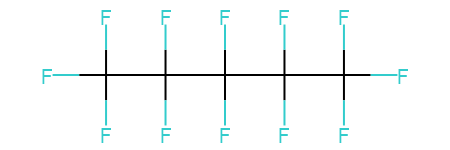

FC(F)(F)C(F)(F)F
[0, 6, 0, 0, 6, 0, 0, 0]


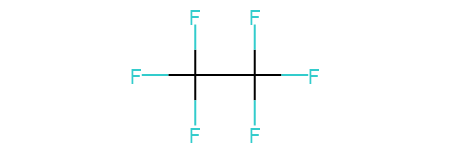

FC(F)(F)F
[0, 4, 0, 0, 0]


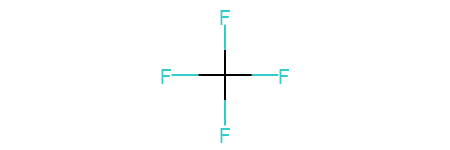

FC(F)(F)c1ccc(C(F)(F)F)cc1
[0, 12, 0, 0, 10, 6, 6, 10, 12, 0, 0, 0, 6, 6]


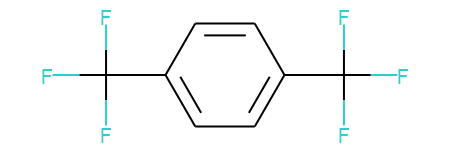

FC(F)(F)c1nc(-c2ccc(-c3noc(C(F)(F)F)n3)cc2)no1
[0, 22, 0, 0, 20, 12, 18, 16, 6, 6, 16, 18, 10, 14, 20, 22, 0, 0, 0, 12, 6, 6, 10, 14]


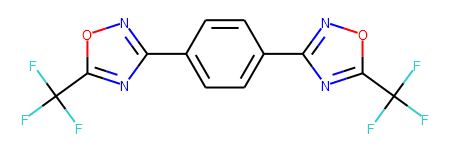

FC(F)(c1ccccc1)C(F)(F)c1ccccc1
[0, 16, 0, 14, 10, 6, 4, 6, 10, 16, 0, 0, 14, 10, 6, 4, 6, 10]


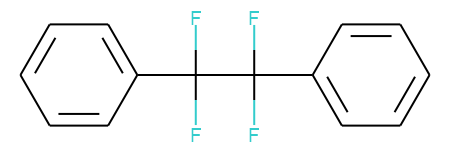

FC1(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C1(F)F
[0, 12, 0, 12, 0, 0, 12, 0, 0, 12, 0, 0, 12, 0, 0, 12, 0, 0]


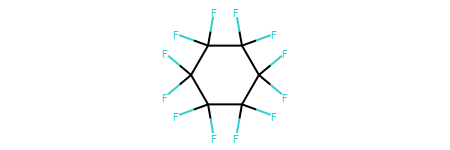

FS(F)(F)(F)(F)F
[0, 6, 0, 0, 0, 0, 0]


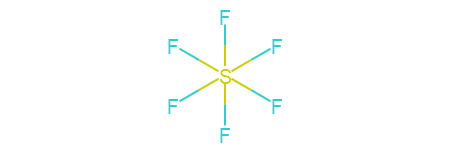

Fc1c(F)c(F)c(F)c(F)c1F
[0, 6, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0]


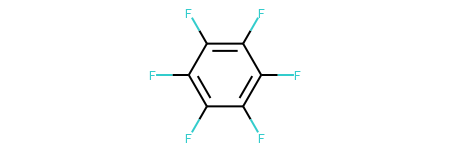

Fc1ccc(F)cc1
[0, 6, 2, 2, 6, 0, 2, 2]


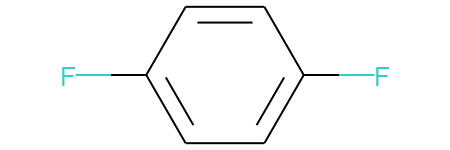

Fc1ccccc1F
[0, 6, 4, 2, 2, 4, 6, 0]


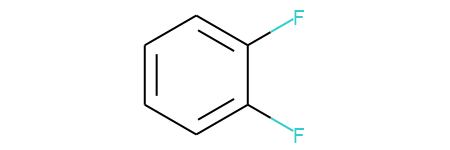

ICCCI
[0, 2, 4, 2, 0]


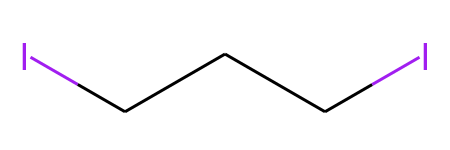

Ic1ccc(I)cc1
[0, 6, 2, 2, 6, 0, 2, 2]


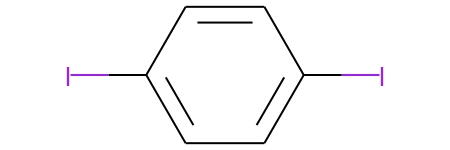

N#C/C=C/C#N
[0, 2, 4, 4, 2, 0]


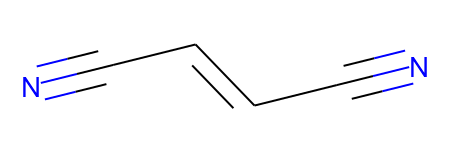

N#CC=CC#N
[0, 2, 4, 4, 2, 0]


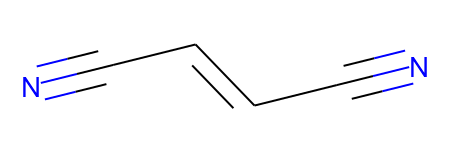

N#CCC#N
[0, 2, 4, 2, 0]


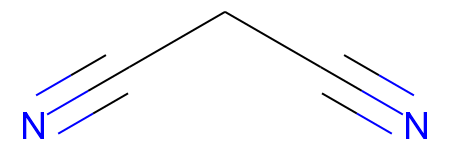

N#CCCC#N
[0, 2, 4, 4, 2, 0]


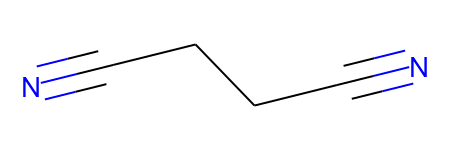

N#CCCCC#N
[0, 2, 4, 6, 4, 2, 0]


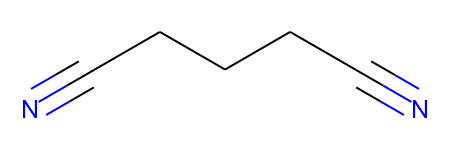

N#CCCCCC#N
[0, 2, 4, 6, 6, 4, 2, 0]


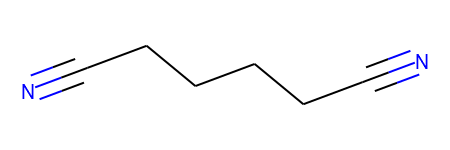

N#CCCCCCC#N
[0, 2, 4, 6, 8, 6, 4, 2, 0]


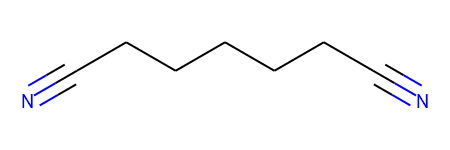

N#CCCCCCCC#N
[0, 2, 4, 6, 8, 8, 6, 4, 2, 0]


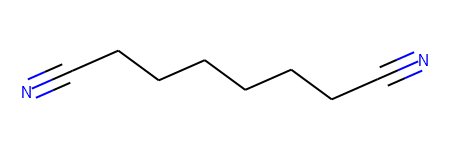

N#CCCCCCCCCC#N
[0, 2, 4, 6, 8, 10, 10, 8, 6, 4, 2, 0]


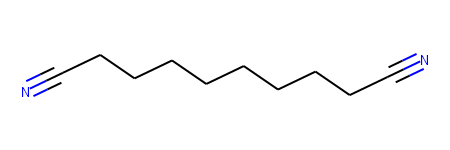

N#CCCNCCC#N
[0, 2, 4, 6, 8, 6, 4, 2, 0]


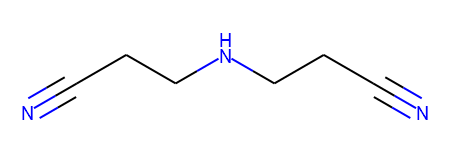

N#Cc1ccc(C#N)cc1
[0, 2, 8, 4, 4, 8, 2, 0, 4, 4]


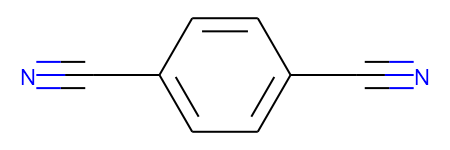

N#Cc1ccccc1C#N
[0, 2, 8, 6, 4, 4, 6, 8, 2, 0]


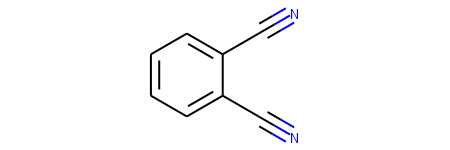

N#Cc1nccnc1C#N
[0, 2, 8, 6, 4, 4, 6, 8, 2, 0]


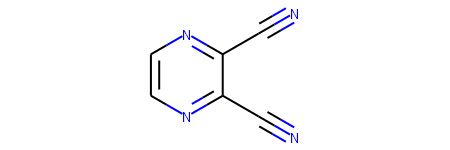

N#Cc1sc2c(=O)c3ccccc3c(=O)c=2sc1C#N
[0, 4, 12, 10, 14, 16, 2, 18, 8, 6, 6, 8, 18, 16, 2, 14, 10, 12, 4, 0]


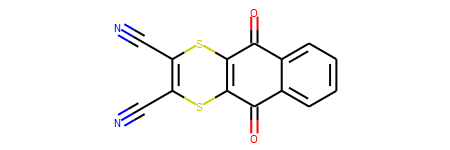

N=c1[nH]c(=N)[nH]c(=N)[nH]1
[0, 6, 3, 6, 0, 3, 6, 0, 3]


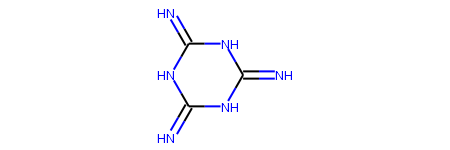

N=c1[nH]o[nH]c1=N
[0, 5, 2, 4, 2, 5, 0]


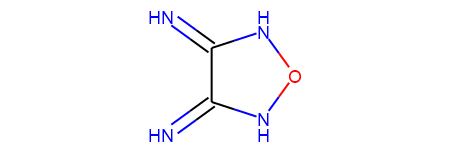

NC(=O)N(CCCCCCN(N=O)C(N)=O)N=O
[0, 14, 4, 16, 10, 8, 6, 6, 8, 10, 16, 12, 2, 14, 0, 4, 12, 2]


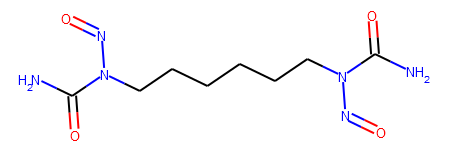

NC(=O)N(CCCN(N=O)C(N)=O)N=O
[0, 11, 4, 13, 7, 6, 7, 13, 9, 2, 11, 0, 4, 9, 2]


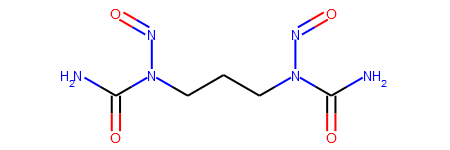

NC(=O)N=NC(N)=O
[0, 6, 2, 4, 4, 6, 0, 2]


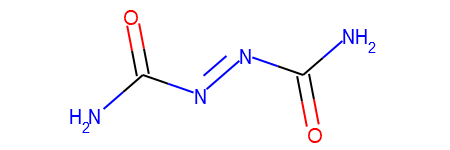

NC(=O)c1ccccc1C(N)=O
[0, 8, 2, 10, 6, 4, 4, 6, 10, 8, 0, 2]


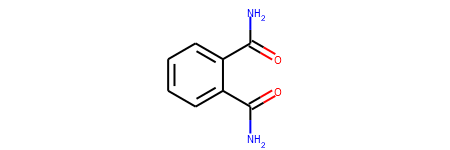

NCCCCN
[0, 2, 4, 4, 2, 0]


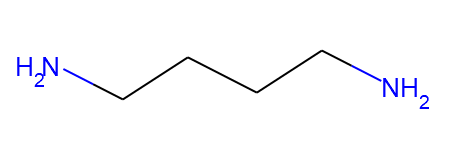

NCCCN
[0, 2, 4, 2, 0]


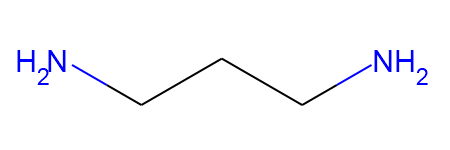

NCCCN1CCN(CCCN)CC1
[0, 2, 4, 6, 12, 8, 8, 12, 6, 4, 2, 0, 8, 8]


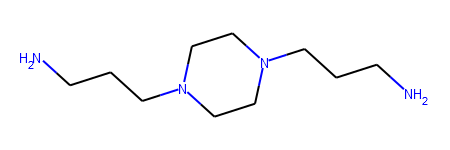

NS(=O)(=O)c1ccc(S(N)(=O)=O)cc1
[0, 12, 2, 2, 10, 6, 6, 10, 12, 0, 2, 2, 6, 6]


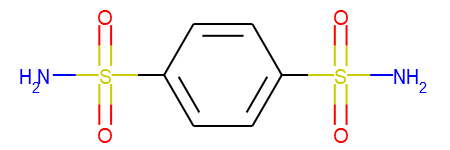

Nc1c(Cl)c(Cl)c(N)c2c1C(=O)c1ccccc1C2=O
[0, 14, 16, 4, 16, 4, 14, 0, 18, 18, 10, 2, 12, 8, 6, 6, 8, 12, 10, 2]


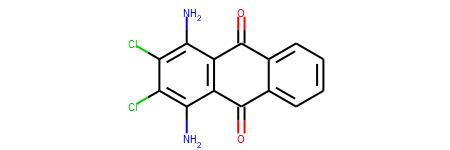

Nc1c(Oc2ccccc2)c(Oc2ccccc2)c(N)c2c1C(=O)c1ccccc1C2=O
[0, 26, 28, 18, 22, 12, 6, 4, 6, 12, 28, 18, 22, 12, 6, 4, 6, 12, 26, 0, 30, 30, 20, 2, 24, 16, 10, 10, 16, 24, 20, 2]


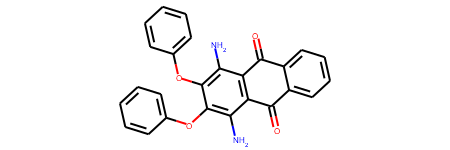

Nc1cc(Cl)c(Cl)cc1N
[0, 6, 4, 8, 2, 8, 2, 4, 6, 0]


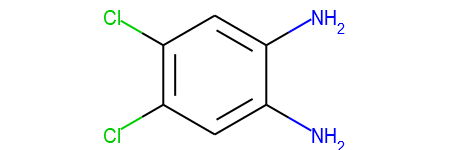

Nc1cc2ccccc2cc1N
[0, 8, 6, 10, 4, 2, 2, 4, 10, 6, 8, 0]


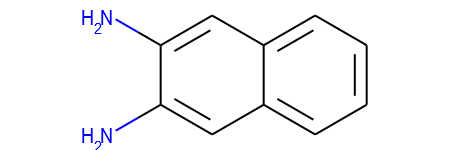

Nc1ccc(-c2ccc(N)c(Cl)c2)cc1Cl
[0, 12, 6, 4, 10, 10, 4, 6, 12, 0, 14, 2, 8, 8, 14, 2]


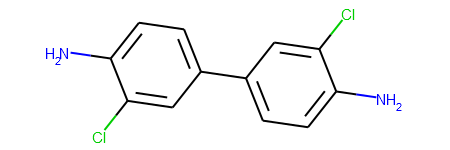

Nc1ccc(-c2ccc(N)cc2)cc1
[0, 10, 2, 6, 12, 12, 6, 2, 10, 0, 2, 6, 6, 2]


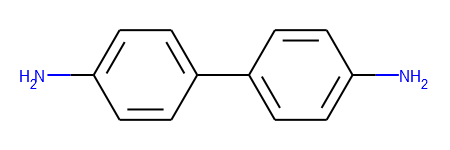

Nc1ccc(C=Cc2ccc(N)cc2S(=O)(=O)O)c(S(=O)(=O)O)c1
[0, 16, 10, 12, 18, 8, 8, 18, 12, 10, 16, 0, 14, 20, 22, 2, 2, 6, 20, 22, 2, 2, 6, 14]


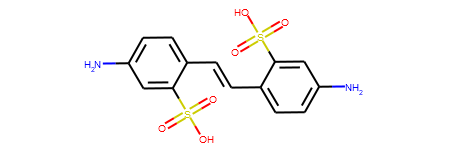

Nc1ccc(Cc2ccc(N)c(Cl)c2)cc1Cl
[0, 13, 6, 4, 11, 10, 11, 4, 6, 13, 0, 15, 2, 8, 8, 15, 2]


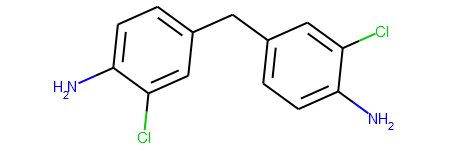

Nc1ccc(Cc2ccc(N)cc2)cc1
[0, 11, 2, 6, 13, 10, 13, 6, 2, 11, 0, 2, 6, 6, 2]


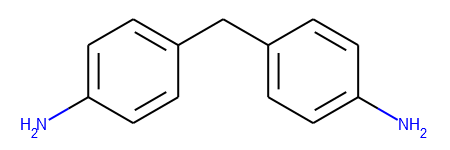

Nc1ccc(N)c2c1C(=O)c1ccccc1C2=O
[0, 12, 6, 6, 12, 0, 16, 16, 10, 2, 14, 8, 4, 4, 8, 14, 10, 2]


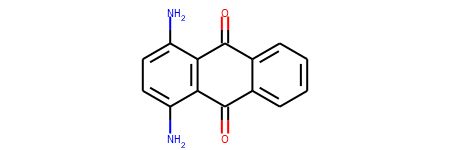

Nc1ccc(N)cc1
[0, 6, 2, 2, 6, 0, 2, 2]


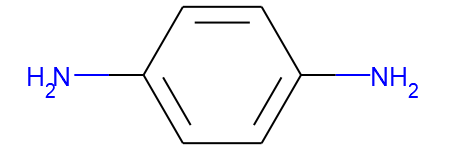

Nc1ccc(Oc2ccc(N)cc2)cc1
[0, 11, 2, 6, 13, 10, 13, 6, 2, 11, 0, 2, 6, 6, 2]


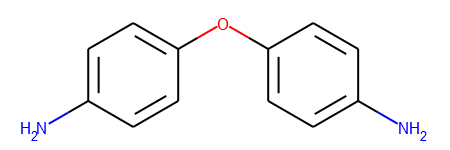

Nc1ccc(S(=O)(=O)c2ccc(N)cc2)cc1
[0, 12, 4, 8, 14, 16, 2, 2, 14, 8, 4, 12, 0, 4, 8, 8, 4]


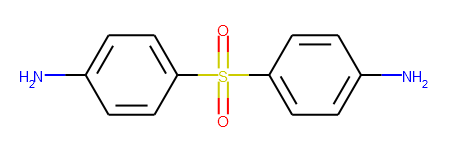

Nc1ccc(Sc2ccc(N)cc2)cc1
[0, 11, 2, 6, 13, 10, 13, 6, 2, 11, 0, 2, 6, 6, 2]


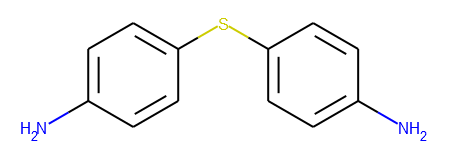

Nc1cccc2c(N)cccc12
[0, 8, 4, 2, 6, 10, 8, 0, 4, 2, 6, 10]


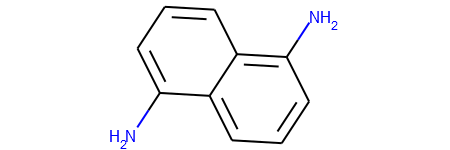

Nc1ccccc1-c1ccccc1N
[0, 10, 6, 2, 4, 8, 12, 12, 8, 4, 2, 6, 10, 0]


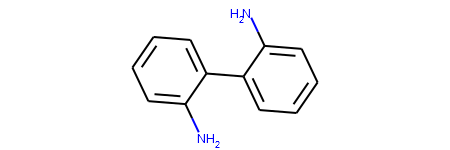

Nc1ccccc1N
[0, 6, 4, 2, 2, 4, 6, 0]


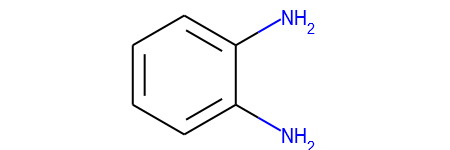

Nc1ccccc1SSc1ccccc1N
[0, 12, 6, 2, 4, 8, 14, 10, 10, 14, 8, 4, 2, 6, 12, 0]


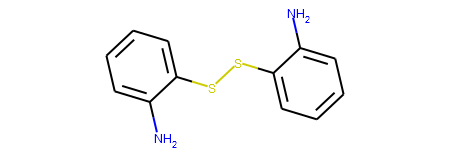

O=C(/C=C/c1ccc2c(c1)OCO2)NCCCCNC(=O)/C=C/c1ccc2c(c1)OCO2
[0, 24, 2, 4, 26, 6, 8, 28, 30, 10, 22, 16, 20, 18, 14, 12, 12, 14, 18, 24, 0, 2, 4, 26, 6, 8, 28, 30, 10, 22, 16, 20]


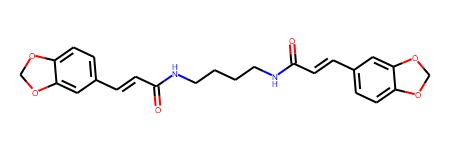

O=C(C(=O)c1ccccc1)c1ccccc1
[0, 12, 12, 0, 14, 8, 4, 2, 4, 8, 14, 8, 4, 2, 4, 8]


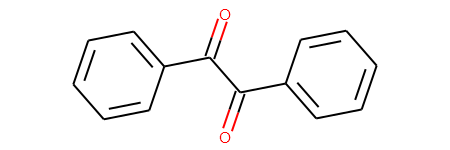

O=C(C(=O)c1ccco1)c1ccco1
[0, 10, 10, 0, 12, 6, 2, 4, 8, 12, 6, 2, 4, 8]


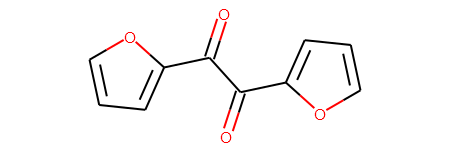

O=C(C=CC(=O)c1ccccc1)c1ccccc1
[0, 14, 2, 2, 14, 0, 16, 10, 6, 4, 6, 10, 16, 10, 6, 4, 6, 10]


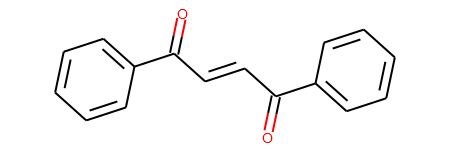

O=C(CCBr)N1CCN(C(=O)CCBr)CC1
[0, 12, 6, 4, 2, 14, 8, 8, 14, 12, 0, 6, 4, 2, 8, 8]


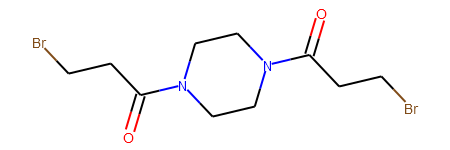

O=C(NC(=O)c1ccccc1O)c1ccccc1O
[0, 13, 12, 13, 0, 17, 10, 6, 4, 8, 15, 2, 17, 10, 6, 4, 8, 15, 2]


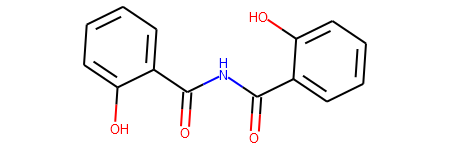

O=C(Nc1ccc(S(=O)(=O)c2ccc(NC(=O)c3cccs3)cc2)cc1)c1cccs1
[0, 22, 18, 24, 8, 12, 26, 30, 2, 2, 26, 12, 8, 24, 18, 22, 0, 28, 16, 4, 6, 20, 8, 12, 12, 8, 28, 16, 4, 6, 20]


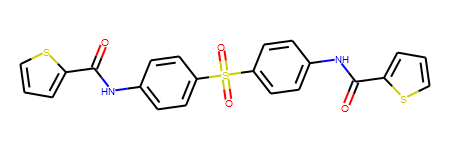

O=C(Nc1ccccc1)c1ccc(C(=O)Nc2ccccc2)cc1
[0, 18, 16, 20, 8, 4, 2, 4, 8, 22, 12, 12, 22, 18, 0, 16, 20, 8, 4, 2, 4, 8, 12, 12]


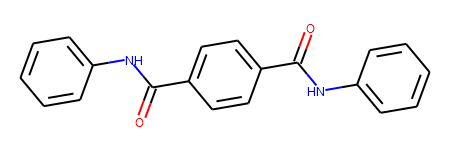

O=C(O)/C=C/C(=O)O
[0, 6, 2, 4, 4, 6, 0, 2]


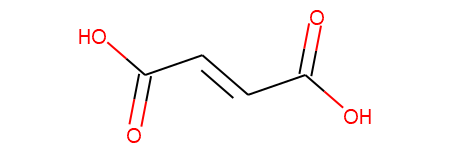

O=C(O)C1C2CCC(O2)C1C(=O)O
[0, 7, 2, 11, 9, 4, 4, 9, 6, 11, 7, 0, 2]


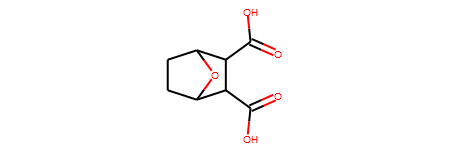

O=C(O)C=CC(=O)O
[0, 6, 2, 4, 4, 6, 0, 2]


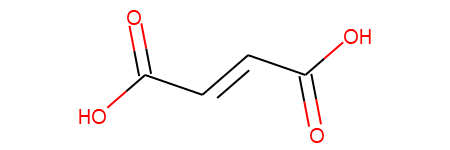

O=C(O)CC(=O)O
[0, 5, 2, 4, 5, 0, 2]


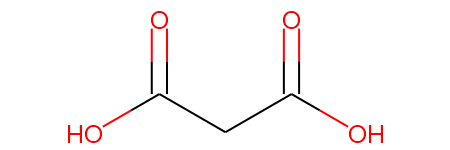

O=C(O)CCC(=O)O
[0, 6, 2, 4, 4, 6, 0, 2]


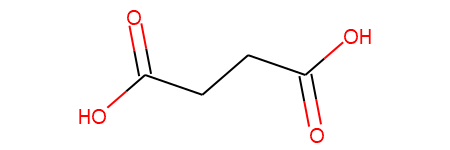

O=C(O)CCCC(=O)O
[0, 7, 2, 5, 4, 5, 7, 0, 2]


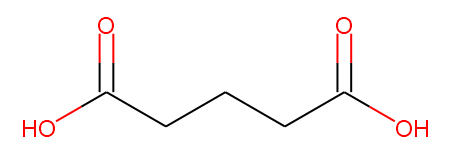

O=C(O)CCCCC(=O)O
[0, 8, 2, 6, 4, 4, 6, 8, 0, 2]


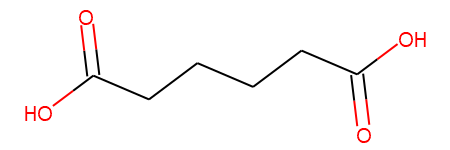

O=C(O)CCCCCC(=O)O
[0, 9, 2, 7, 5, 4, 5, 7, 9, 0, 2]


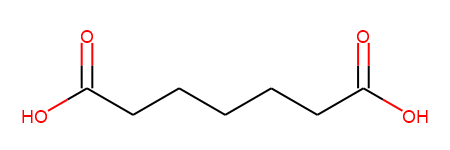

O=C(O)CCCCCCCC(=O)O
[0, 11, 2, 9, 7, 5, 4, 5, 7, 9, 11, 0, 2]


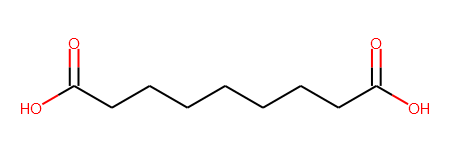

O=C(O)c1c(C(=O)O)c(C(=O)O)c(C(=O)O)c(C(=O)O)c1C(=O)O
[0, 12, 6, 18, 18, 12, 0, 6, 18, 12, 0, 6, 18, 12, 0, 6, 18, 12, 0, 6, 18, 12, 0, 6]


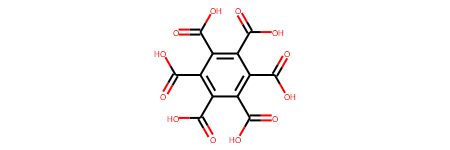

O=C(O)c1ccc(C(=O)O)cc1
[0, 8, 2, 10, 4, 4, 10, 8, 0, 2, 4, 4]


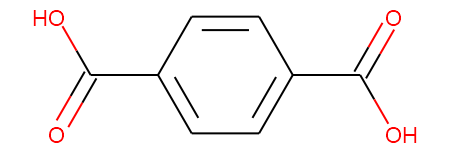

O=C(O)c1ccccc1-c1ccccc1C(=O)O
[0, 12, 2, 14, 8, 4, 6, 10, 16, 16, 10, 6, 4, 8, 14, 12, 0, 2]


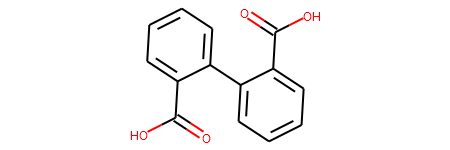

O=C(O)c1ccccc1C(=O)O
[0, 8, 2, 10, 6, 4, 4, 6, 10, 8, 0, 2]


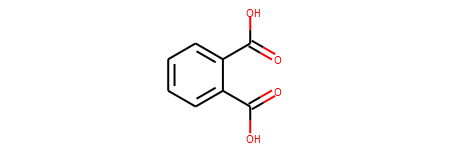

O=C(OC(=O)c1ccccc1)c1ccccc1
[0, 13, 12, 13, 0, 15, 8, 4, 2, 4, 8, 15, 8, 4, 2, 4, 8]


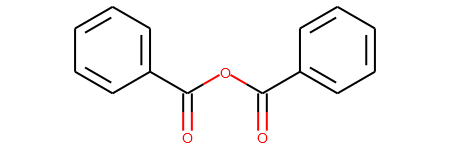

O=C(OOC(=O)c1ccccc1)c1ccccc1
[0, 14, 12, 12, 14, 0, 16, 8, 4, 2, 4, 8, 16, 8, 4, 2, 4, 8]


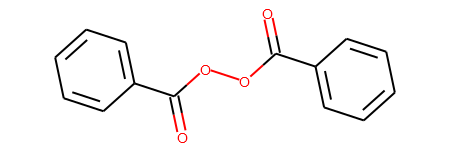

O=C(O[K])C1C2CCC(O2)C1C(=O)O[K]
[0, 9, 6, 2, 13, 11, 4, 4, 11, 8, 13, 9, 0, 6, 2]


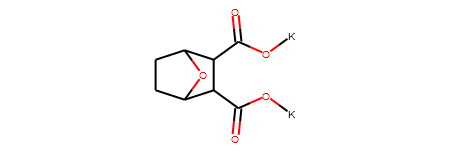

O=C1C(=O)N(OCc2ccc(Br)cc2)[C@H]2CCCC[C@@H]2N1OCc1ccc(Br)cc1
[0, 20, 20, 0, 28, 18, 14, 24, 8, 4, 22, 2, 4, 8, 26, 16, 12, 12, 16, 26, 28, 18, 14, 24, 8, 4, 22, 2, 4, 8]


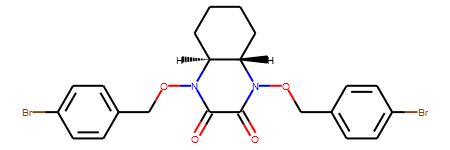

O=C1C(=O)c2ccccc2-c2ccccc21
[0, 10, 10, 0, 12, 6, 2, 4, 8, 14, 14, 8, 4, 2, 6, 12]


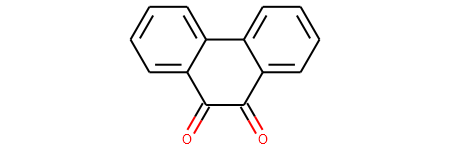

O=C1C(Br)=C(N2CC2)C(=O)C(Br)=C1N1CC1
[0, 8, 10, 2, 12, 14, 4, 4, 8, 0, 10, 2, 12, 14, 4, 4]


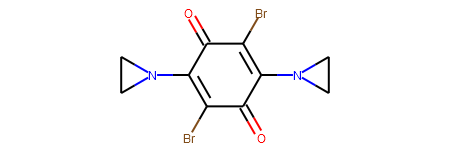

O=C1C(N2CCN(CCO)CC2)=C(N2CC2)C(=O)C(N2CCN(CCO)CC2)=C1N1CC1
[0, 20, 22, 28, 12, 8, 26, 6, 4, 2, 8, 12, 24, 30, 16, 16, 20, 0, 22, 28, 12, 8, 26, 6, 4, 2, 8, 12, 24, 30, 16, 16]


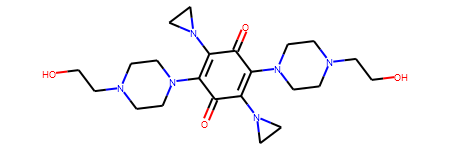

O=C1C(N2CCOCC2)=C(N2CC2)C(=O)C(N2CCOCC2)=C1N1CC1
[0, 16, 18, 22, 6, 2, 14, 2, 6, 20, 24, 10, 10, 16, 0, 18, 22, 6, 2, 14, 2, 6, 20, 24, 10, 10]


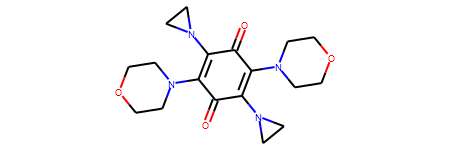

O=C1C=C(N2CC2)C(=O)C=C1N1CC1
[0, 8, 2, 10, 12, 4, 4, 8, 0, 2, 10, 12, 4, 4]


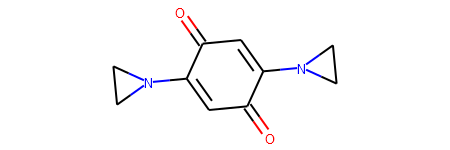

O=C1C=C(N2CCCC2)C(=O)C=C1N1CCCC1
[0, 12, 2, 14, 16, 8, 4, 4, 8, 12, 0, 2, 14, 16, 8, 4, 4, 8]


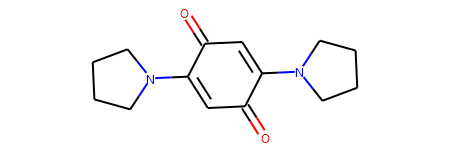

O=C1C=CC(=O)C=C1
[0, 6, 2, 2, 6, 0, 2, 2]


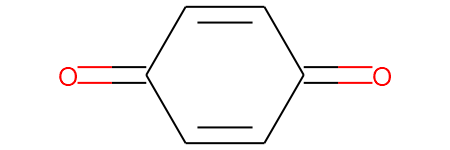

O=C1C=CC(=O)N1
[0, 5, 2, 2, 5, 0, 4]


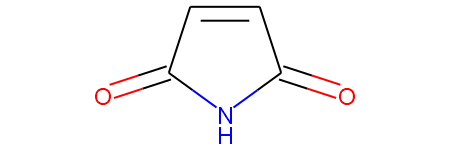

O=C1C=CC(=O)c2c(O)ccc(O)c21
[0, 8, 4, 4, 8, 0, 12, 10, 2, 6, 6, 10, 2, 12]


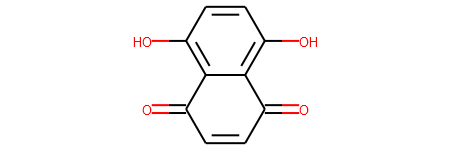

O=C1C=CC(=O)c2ccccc21
[0, 8, 2, 2, 8, 0, 10, 6, 4, 4, 6, 10]


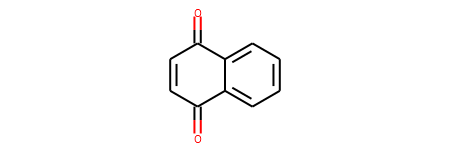

O=C1CC(=O)c2ccccc21
[0, 7, 6, 7, 0, 9, 4, 2, 2, 4, 9]


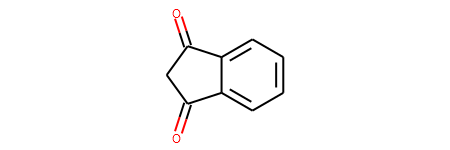

O=C1NC(=O)c2ccccc21
[0, 7, 6, 7, 0, 9, 4, 2, 2, 4, 9]


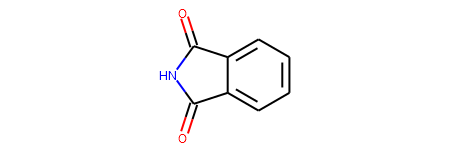

O=C1NC(Cc2ccccc2)C(=O)NC1Cc1ccccc1
[0, 16, 14, 20, 12, 18, 8, 4, 2, 4, 8, 16, 0, 14, 20, 12, 18, 8, 4, 2, 4, 8]


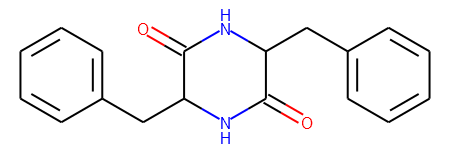

O=C1OC(=O)c2ccccc21
[0, 7, 6, 7, 0, 9, 4, 2, 2, 4, 9]


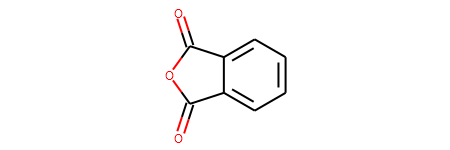

O=C1c2ccc(-c3ccc4c(c3)C(=O)N(CCO)C4=O)cc2C(=O)N1CCO
[0, 16, 22, 8, 6, 20, 20, 6, 8, 22, 24, 10, 18, 2, 26, 14, 12, 4, 16, 0, 10, 24, 18, 2, 26, 14, 12, 4]


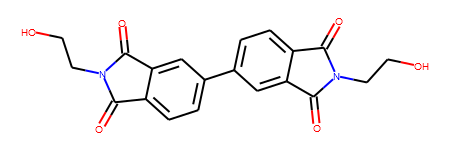

O=C1c2ccccc2C(=O)C1(O)O
[0, 8, 10, 6, 4, 4, 6, 10, 8, 0, 12, 2, 2]


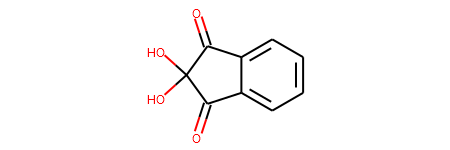

O=C1c2ccccc2C(=O)c2ccccc21
[0, 10, 12, 6, 2, 2, 6, 12, 10, 0, 12, 6, 2, 2, 6, 12]


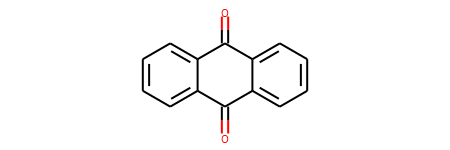

O=CNC(N1CCN(C(NC=O)C(Cl)(Cl)Cl)CC1)C(Cl)(Cl)Cl
[0, 8, 14, 16, 18, 10, 10, 18, 16, 14, 8, 0, 20, 2, 2, 2, 10, 10, 20, 2, 2, 2]


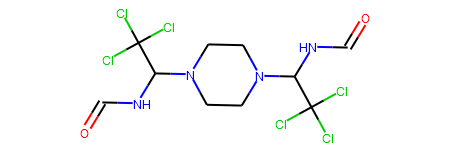

O=NN(CCCl)C(=O)NC1CCC(NC(=O)N(CCCl)N=O)CC1
[0, 14, 22, 12, 6, 4, 18, 2, 16, 20, 8, 8, 20, 16, 18, 2, 22, 12, 6, 4, 14, 0, 8, 8]


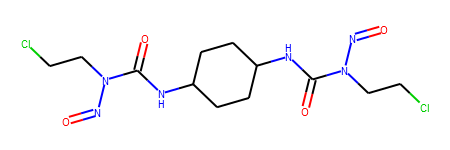

O=NN(CCCl)C(=O)NCCCCNC(=O)N(CCCl)N=O
[0, 14, 20, 12, 6, 4, 18, 2, 16, 10, 8, 8, 10, 16, 18, 2, 20, 12, 6, 4, 14, 0]


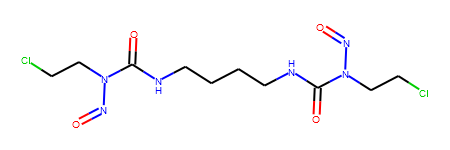

O=NN(CCF)C(=O)NC1CCC(NC(=O)N(CCF)N=O)CC1
[0, 14, 22, 12, 6, 4, 18, 2, 16, 20, 8, 8, 20, 16, 18, 2, 22, 12, 6, 4, 14, 0, 8, 8]


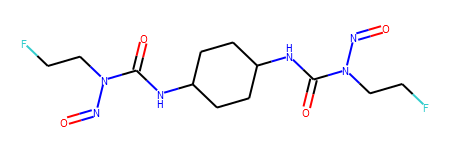

O=NN1CCCN(N=O)CC1
[0, 7, 9, 3, 2, 3, 9, 7, 0, 5, 5]


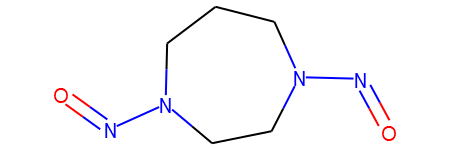

O=NN1CCN(N=O)CC1
[0, 6, 8, 2, 2, 8, 6, 0, 2, 2]


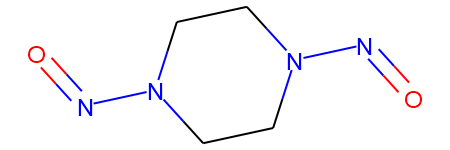

O=S(=O)(NS(=O)(=O)c1ccccc1)c1ccccc1
[0, 17, 0, 14, 17, 0, 0, 15, 10, 6, 4, 6, 10, 15, 10, 6, 4, 6, 10]


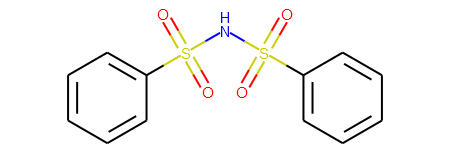

O=S(=O)(O)c1cc(N=c2[nH]c(N3CCOCC3)nc(=Nc3ccccc3)[nH]2)ccc1C=Cc1ccc(N=c2[nH]c(N3CCOCC3)nc(=Nc3ccccc3)[nH]2)cc1S(=O)(=O)O
[0, 60, 0, 4, 52, 22, 46, 34, 56, 38, 48, 58, 28, 24, 42, 24, 28, 36, 54, 32, 44, 14, 10, 8, 10, 14, 40, 18, 20, 50, 6, 6, 50, 20, 18, 46, 34, 56, 38, 48, 58, 28, 24, 42, 24, 28, 36, 54, 32, 44, 14, 10, 8, 10, 14, 40, 22, 52, 60, 0, 0, 4]


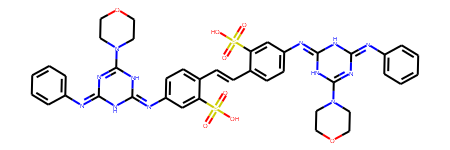

O=S(=O)(c1ccccc1)c1ccccc1
[0, 14, 0, 12, 8, 4, 2, 4, 8, 12, 8, 4, 2, 4, 8]


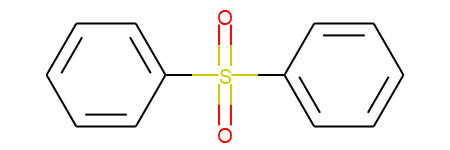

O=S1(=O)CCCC1
[0, 6, 0, 4, 2, 2, 4]


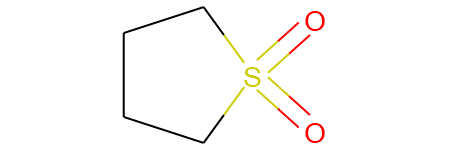

O=S1(=O)Nc2ccccc2N1
[0, 10, 0, 6, 8, 4, 2, 2, 4, 8, 6]


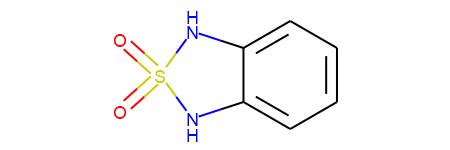

O=[N+]([O-])N1CN([N+](=O)[O-])CN([N+](=O)[O-])C1
[0, 12, 3, 9, 6, 9, 12, 0, 3, 6, 9, 12, 0, 3, 6]


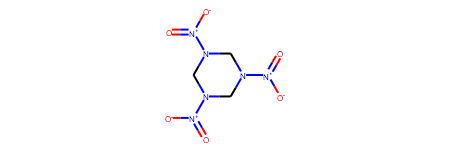

O=[N+]([O-])N1CN([N+](=O)[O-])CN([N+](=O)[O-])CN([N+](=O)[O-])C1
[0, 16, 4, 12, 8, 12, 16, 0, 4, 8, 12, 16, 0, 4, 8, 12, 16, 0, 4, 8]


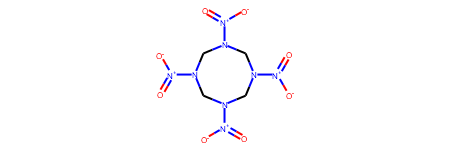

O=[N+]([O-])OC1COC2C(O[N+](=O)[O-])COC12
[0, 14, 2, 8, 10, 4, 6, 12, 10, 8, 14, 0, 2, 4, 6, 12]


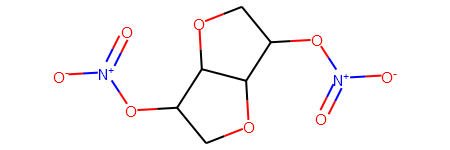

O=[N+]([O-])OCCOCCO[N+](=O)[O-]
[0, 11, 2, 9, 6, 4, 8, 4, 6, 9, 11, 0, 2]


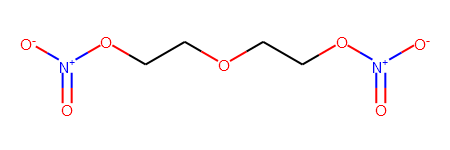

O=[N+]([O-])OCCO[N+](=O)[O-]
[0, 8, 2, 6, 4, 4, 6, 8, 0, 2]


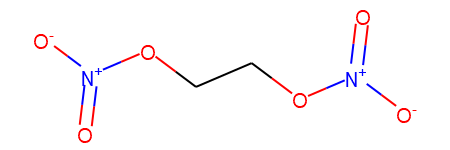

O=[N+]([O-])c1cc([N+](=O)[O-])cc([N+](=O)[O-])c1
[0, 12, 3, 9, 6, 9, 12, 0, 3, 6, 9, 12, 0, 3, 6]


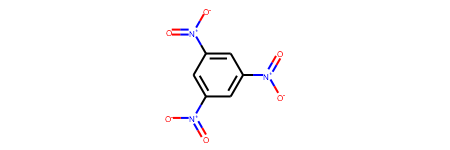

O=[N+]([O-])c1ccc([N+](=O)[O-])cc1
[0, 10, 2, 8, 4, 4, 8, 10, 0, 2, 4, 4]


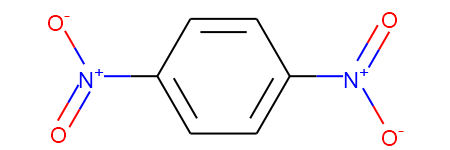

O=[N+]([O-])c1ccc2c(c1)Cc1cc([N+](=O)[O-])ccc1-2
[0, 17, 2, 11, 4, 8, 15, 13, 6, 10, 13, 6, 11, 17, 0, 2, 4, 8, 15]


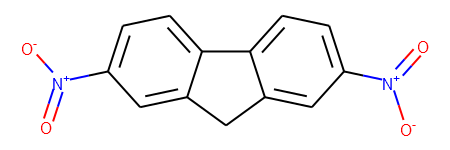

O=[N+]([O-])c1cccc(SSc2cccc([N+](=O)[O-])c2)c1
[0, 18, 2, 16, 8, 4, 6, 14, 12, 12, 14, 6, 4, 8, 16, 18, 0, 2, 10, 10]


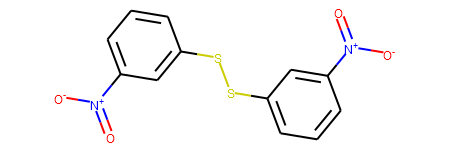

O=[N+]([O-])c1cccc2c([N+](=O)[O-])cccc12
[0, 14, 2, 10, 6, 4, 8, 12, 10, 14, 0, 2, 6, 4, 8, 12]


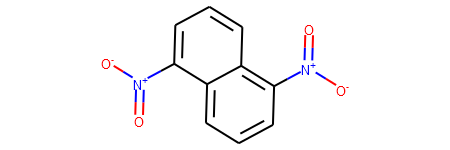

O=[N+]([O-])c1ccccc1SSc1ccccc1[N+](=O)[O-]
[0, 18, 2, 16, 10, 6, 4, 8, 14, 12, 12, 14, 8, 4, 6, 10, 16, 18, 0, 2]


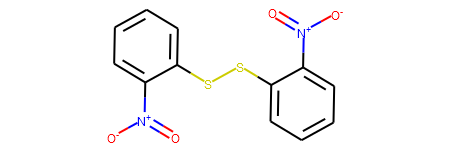

O=[N+]([O-])c1ccccc1[N+](=O)[O-]
[0, 10, 2, 8, 6, 4, 4, 6, 8, 10, 0, 2]


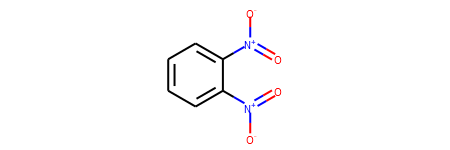

O=[PH](=O)(O)CN(CCCCCCN(C[PH](=O)(=O)O)C[PH](=O)(=O)O)C[PH](=O)(=O)O
[0, 24, 0, 8, 18, 22, 16, 14, 12, 12, 14, 16, 22, 18, 24, 0, 0, 8, 18, 24, 0, 0, 8, 18, 24, 0, 0, 8]


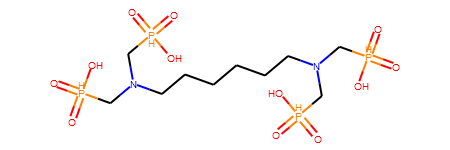

O=[PH](=O)(Oc1ccc(Cl)cc1)Oc1ccc(Cl)cc1
[0, 18, 0, 12, 16, 8, 4, 14, 2, 4, 8, 12, 16, 8, 4, 14, 2, 4, 8]


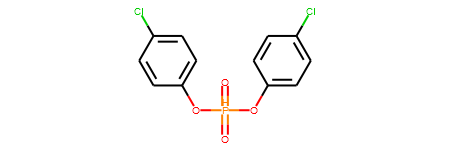

O=c1[nH][nH]c(=O)c2ccccc12
[0, 8, 6, 6, 8, 0, 10, 4, 2, 2, 4, 10]


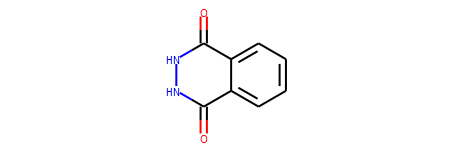

O=c1[nH]c2ccccc2[nH]c1=O
[0, 8, 6, 10, 4, 2, 2, 4, 10, 6, 8, 0]


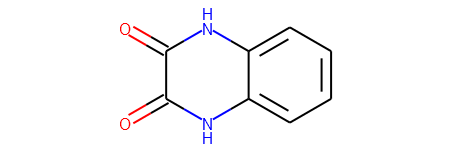

O=c1[nH]c2ccccc2nc1CC(O)Nc1ccccc1NC(O)Cc1nc2ccccc2[nH]c1=O
[0, 28, 22, 32, 14, 8, 6, 12, 30, 18, 26, 16, 34, 2, 20, 24, 10, 4, 4, 10, 24, 20, 34, 2, 16, 26, 18, 30, 12, 6, 8, 14, 32, 22, 28, 0]


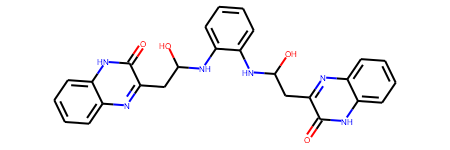

O=c1c(Cc2c(O)oc3ccccc3c2=O)c(O)oc2ccccc12
[0, 19, 17, 12, 17, 15, 2, 13, 21, 8, 4, 6, 10, 23, 19, 0, 15, 2, 13, 21, 8, 4, 6, 10, 23]


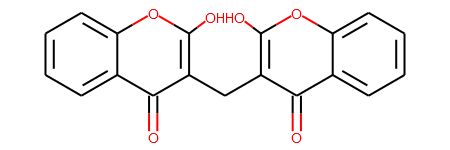

O=c1ccc(=O)[nH][nH]1
[0, 6, 2, 2, 6, 0, 4, 4]


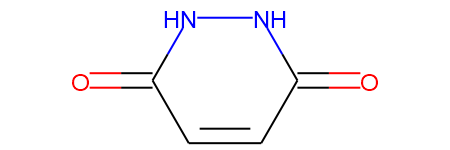

OC(C1CO1)C(O)C1CO1
[0, 8, 6, 2, 4, 8, 0, 6, 2, 4]


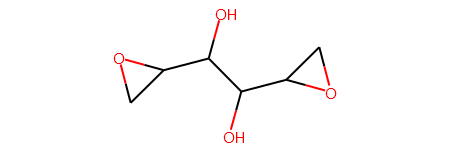

OC(CBr)C(O)C(O)C(O)CBr
[0, 8, 6, 4, 10, 2, 10, 2, 8, 0, 6, 4]


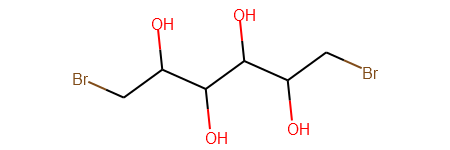

OC(CNCC(O)C1CCc2cc(F)ccc2O1)C1CCc2cc(F)ccc2O1
[0, 25, 12, 16, 12, 25, 0, 27, 14, 10, 21, 6, 19, 2, 4, 8, 23, 17, 27, 14, 10, 21, 6, 19, 2, 4, 8, 23, 17]


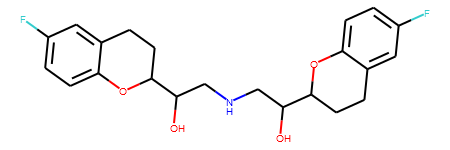

OC(CNCC(O)COc1ccccc1)COc1ccccc1
[0, 21, 12, 16, 12, 21, 0, 14, 17, 19, 8, 4, 2, 4, 8, 14, 17, 19, 8, 4, 2, 4, 8]


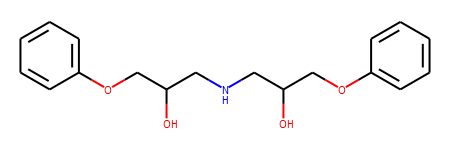

OC(c1ccccc1)C(O)c1ccccc1
[0, 14, 12, 8, 4, 2, 4, 8, 14, 0, 12, 8, 4, 2, 4, 8]


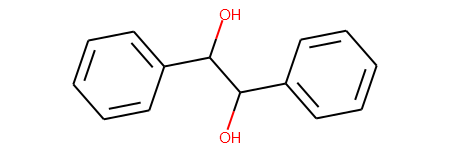

OC/C=C/CO
[0, 4, 2, 2, 4, 0]


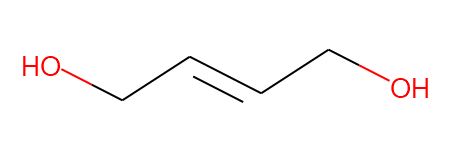

OC1C2CCC(C2)C1O
[0, 7, 5, 2, 2, 5, 4, 7, 0]


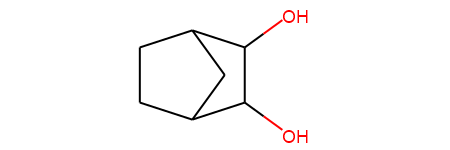

OC1CCCCC1O
[0, 6, 4, 2, 2, 4, 6, 0]


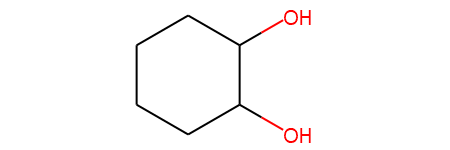

OCC(CO)(CBr)CBr
[0, 4, 8, 4, 0, 6, 2, 6, 2]


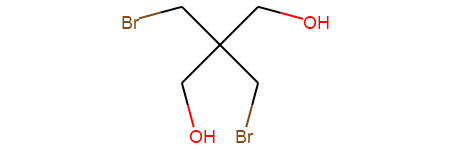

OCC(CO)(CO)CO
[0, 4, 8, 4, 0, 4, 0, 4, 0]


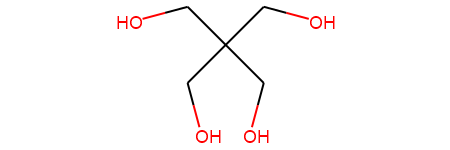

OCC(O)C(O)C(O)C(O)CO
[0, 6, 8, 2, 10, 4, 10, 4, 8, 2, 6, 0]


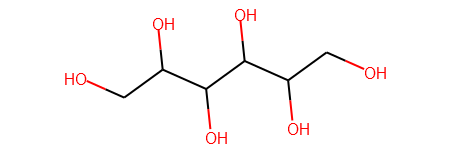

OCC(O)C(O)CO
[0, 4, 6, 2, 6, 2, 4, 0]


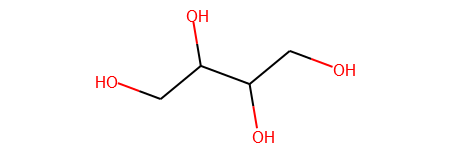

OCC=CCO
[0, 4, 2, 2, 4, 0]


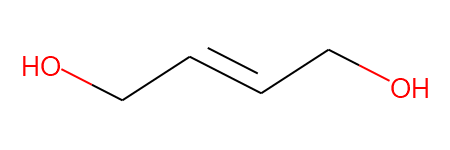

OCCCCO
[0, 2, 4, 4, 2, 0]


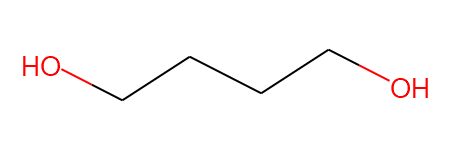

OCCCO
[0, 2, 4, 2, 0]


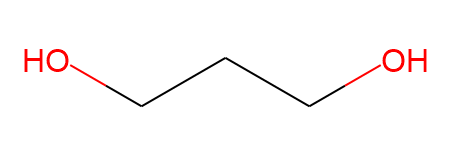

OCCN(CCO)CCO
[0, 3, 6, 9, 6, 3, 0, 6, 3, 0]


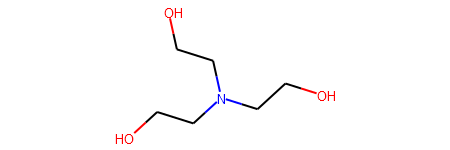

OCCNCCO
[0, 2, 4, 6, 4, 2, 0]


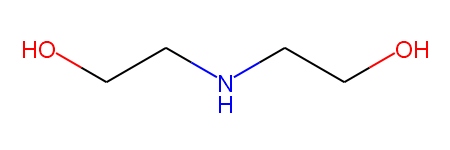

OCCSCCO
[0, 2, 4, 6, 4, 2, 0]


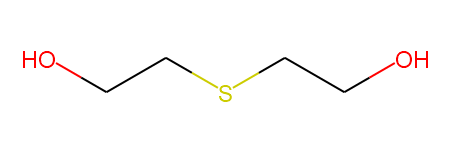

OC[C@@H](O)Cn1c(SCCSc2nc3ccccc3n2C[C@H](O)CO)nc2ccccc21
[0, 14, 28, 2, 16, 30, 22, 20, 12, 12, 20, 22, 18, 24, 8, 4, 6, 10, 26, 30, 16, 28, 2, 14, 0, 18, 24, 8, 4, 6, 10, 26]


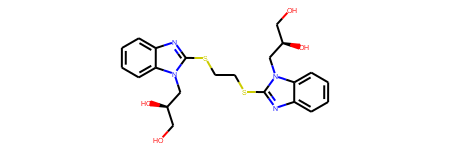

Oc1c(Cl)cc(Cl)c(Cl)c1Cc1c(O)c(Cl)cc(Cl)c1Cl
[0, 15, 11, 2, 8, 13, 4, 17, 6, 19, 10, 19, 15, 0, 11, 2, 8, 13, 4, 17, 6]


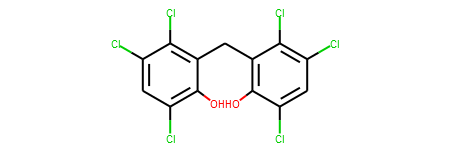

Oc1c(O)c(Cl)c(Cl)c(Cl)c1Cl
[0, 6, 6, 0, 8, 2, 10, 4, 10, 4, 8, 2]


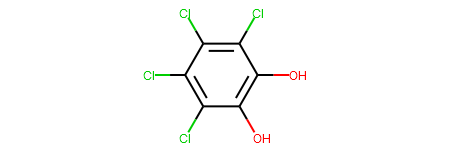

Oc1cc(O)cc(O)c1
[0, 6, 3, 6, 0, 3, 6, 0, 3]


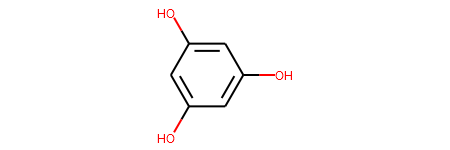

Oc1cc2ccccc2cc1O
[0, 8, 6, 10, 4, 2, 2, 4, 10, 6, 8, 0]


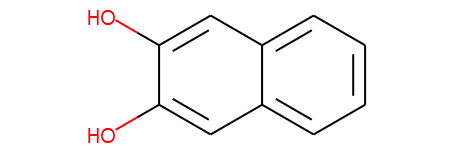

Oc1ccc(Cc2ccc(O)cc2)cc1
[0, 11, 2, 6, 13, 10, 13, 6, 2, 11, 0, 2, 6, 6, 2]


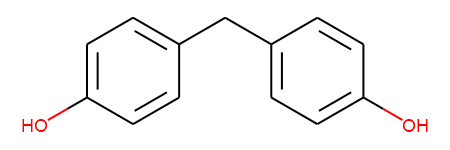

Oc1ccc(Cl)cc1Cc1cc(Cl)ccc1O
[0, 13, 6, 4, 11, 2, 8, 15, 10, 15, 8, 11, 2, 4, 6, 13, 0]


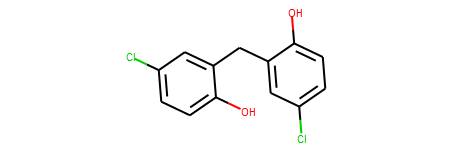

Oc1ccc(O)c2ccccc12
[0, 8, 4, 4, 8, 0, 10, 6, 2, 2, 6, 10]


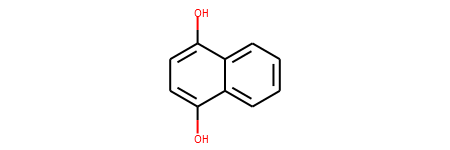

Oc1ccc(O)cc1
[0, 6, 2, 2, 6, 0, 2, 2]


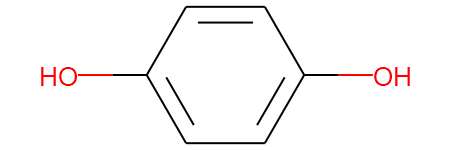

Oc1ccc(Sc2ccc(O)cc2)cc1
[0, 11, 2, 6, 13, 10, 13, 6, 2, 11, 0, 2, 6, 6, 2]


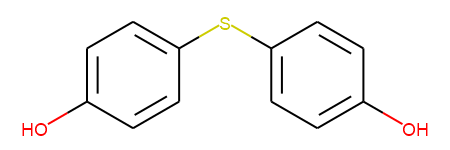

Oc1ccc2cc(O)ccc2c1
[0, 8, 2, 4, 10, 6, 8, 0, 2, 4, 10, 6]


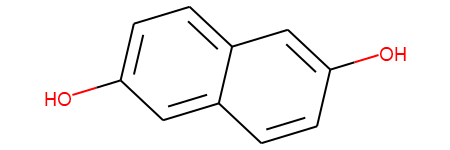

Oc1cccc2c(O)cccc12
[0, 8, 4, 2, 6, 10, 8, 0, 4, 2, 6, 10]


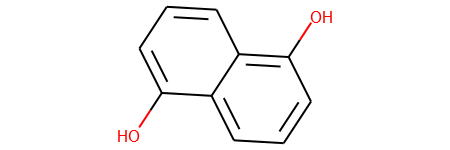

Oc1ccccc1O
[0, 6, 4, 2, 2, 4, 6, 0]


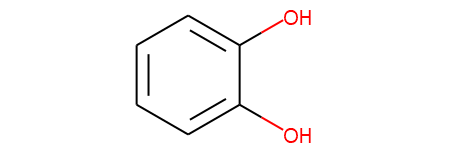

S=C(S)NCCNC(=S)S
[0, 8, 2, 6, 4, 4, 6, 8, 0, 2]


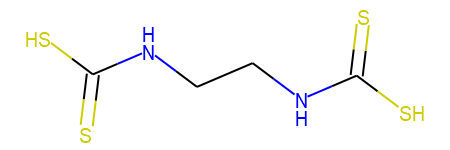

S=C(SSSSC(=S)N1CCCCC1)N1CCCCC1
[0, 16, 14, 12, 12, 14, 16, 0, 18, 8, 4, 2, 4, 8, 18, 8, 4, 2, 4, 8]


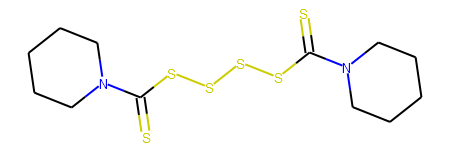

S=C=Nc1ccc(-c2ccc(N=C=S)cc2)cc1
[0, 2, 12, 14, 4, 8, 16, 16, 8, 4, 14, 12, 2, 0, 4, 8, 8, 4]


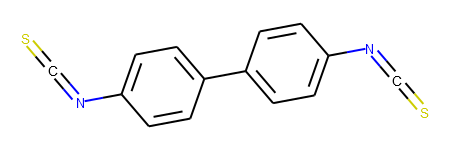

c1cc(-c2ccncc2)ccn1
[0, 4, 10, 10, 4, 0, 8, 0, 4, 4, 0, 8]


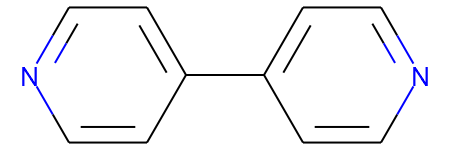

c1cc2ccc3cc4cccc5ccc6cc(c1)c2c3c6c54
[0, 2, 12, 4, 8, 16, 10, 14, 6, 0, 2, 12, 4, 8, 16, 10, 14, 6, 18, 20, 20, 18]


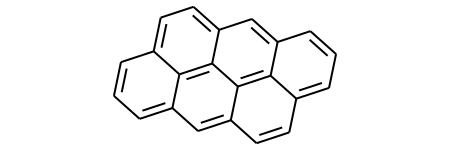

c1cc2ccc3ccc4ccc5ccc6ccc1c1c2c3c4c5c61
[0, 0, 12, 0, 0, 12, 0, 0, 12, 0, 0, 12, 0, 0, 12, 0, 0, 12, 18, 18, 18, 18, 18, 18]


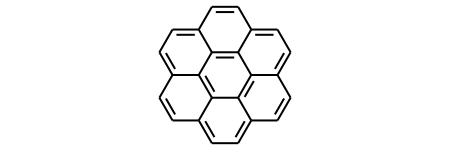

c1cc2ccc3ccc4ccc5cccc6c(c1)c2c3c4c56
[0, 2, 12, 4, 6, 14, 8, 8, 14, 6, 4, 12, 2, 0, 10, 16, 16, 10, 18, 20, 20, 18]


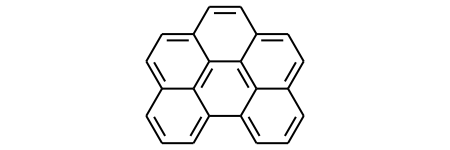

c1cc2ccc3cccc4ccc(c1)c2c34
[0, 2, 10, 6, 6, 10, 2, 0, 2, 10, 6, 6, 10, 2, 14, 14]


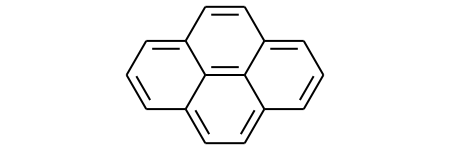

c1cc2ccc3cccc4sc(c1)c2c34
[0, 2, 9, 4, 4, 9, 2, 0, 6, 11, 8, 11, 6, 13, 13]


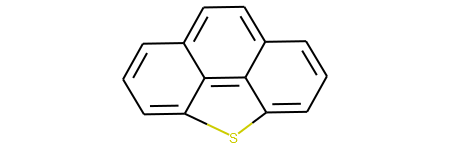

c1cc2cccc3c4cccc5cccc(c(c1)c23)c54
[0, 4, 12, 4, 0, 8, 14, 14, 8, 0, 4, 12, 4, 0, 8, 14, 14, 8, 18, 18]


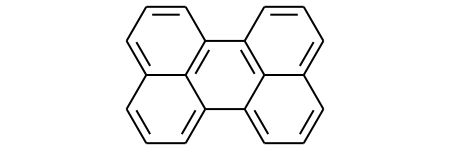

c1cc[nH]c1
[0, 0, 2, 4, 2]


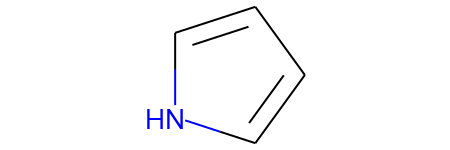

c1ccc(-c2c3ccccc3c(-c3ccccc3)c3ccccc23)cc1
[0, 2, 10, 18, 20, 22, 14, 6, 6, 14, 22, 20, 18, 10, 2, 0, 2, 10, 22, 14, 6, 6, 14, 22, 10, 2]


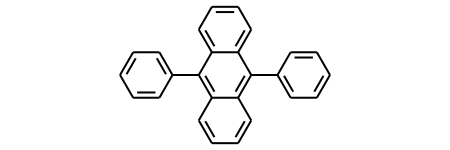

c1ccc(-c2ccc(-c3ccccc3)cc2)cc1
[0, 2, 6, 14, 16, 10, 10, 16, 14, 6, 2, 0, 2, 6, 10, 10, 6, 2]


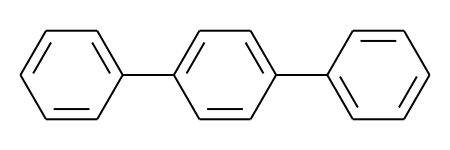

c1ccc(-c2ccccc2)cc1
[0, 2, 6, 10, 10, 6, 2, 0, 2, 6, 6, 2]


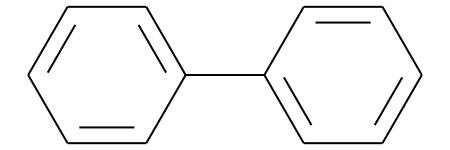

c1ccc(-c2ccccn2)nc1
[0, 2, 6, 10, 10, 6, 2, 0, 4, 8, 8, 4]


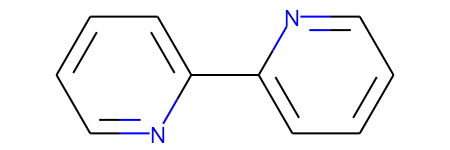

c1ccc(-c2nccnc2-c2ccccc2)cc1
[0, 2, 8, 14, 16, 12, 6, 6, 12, 16, 14, 8, 2, 0, 2, 8, 8, 2]


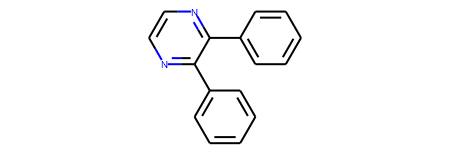

c1ccc(-c2nonc2-c2ccccc2)cc1
[0, 2, 6, 13, 15, 10, 12, 10, 15, 13, 6, 2, 0, 2, 6, 6, 2]


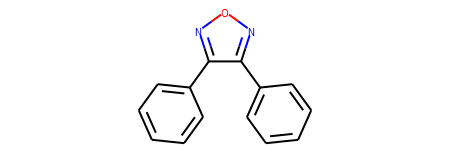

c1ccc(-n2nnnc2OCCOc2nnnn2-c2ccccc2)cc1
[0, 2, 6, 20, 24, 16, 12, 14, 22, 18, 10, 10, 18, 22, 14, 12, 16, 24, 20, 6, 2, 0, 2, 6, 6, 2]


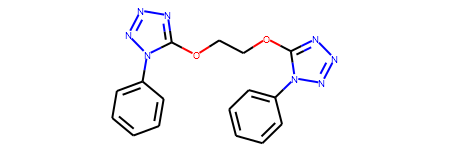

c1ccc(/N=N/c2ccccc2)cc1
[0, 2, 6, 12, 10, 10, 12, 6, 2, 0, 2, 6, 6, 2]


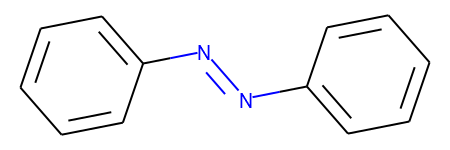

c1ccc(CCc2ccccc2)cc1
[0, 2, 6, 12, 10, 10, 12, 6, 2, 0, 2, 6, 6, 2]


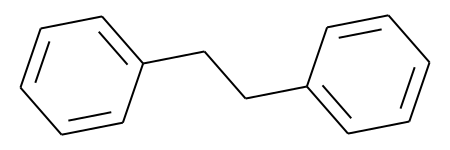

c1ccc(CNCc2ccccc2)cc1
[0, 2, 6, 13, 10, 12, 10, 13, 6, 2, 0, 2, 6, 6, 2]


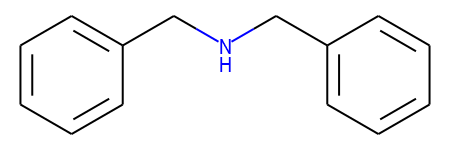

c1ccc(COCc2ccccc2)cc1
[0, 2, 6, 13, 10, 12, 10, 13, 6, 2, 0, 2, 6, 6, 2]


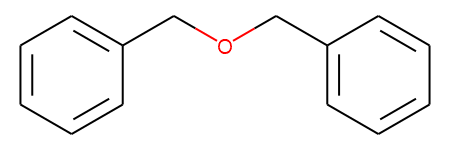

c1ccc(Cc2ccccc2)cc1
[0, 2, 6, 11, 10, 11, 6, 2, 0, 2, 6, 6, 2]


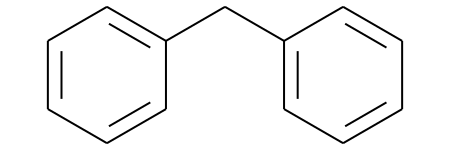

c1ccc(N=Nc2ccccc2)cc1
[0, 2, 6, 12, 10, 10, 12, 6, 2, 0, 2, 6, 6, 2]


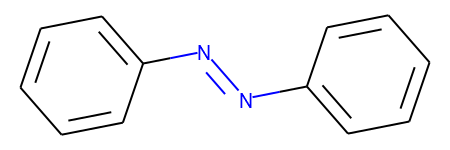

c1ccc(NNc2ccccc2)cc1
[0, 2, 6, 12, 10, 10, 12, 6, 2, 0, 2, 6, 6, 2]


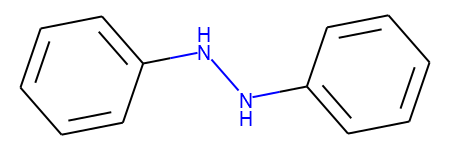

c1ccc(Nc2ccccc2)cc1
[0, 2, 6, 11, 10, 11, 6, 2, 0, 2, 6, 6, 2]


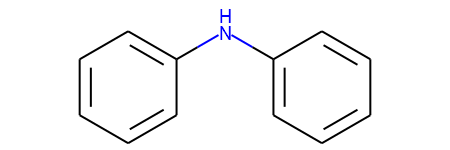

c1ccc(OCCOc2ccccc2)cc1
[0, 2, 6, 14, 12, 10, 10, 12, 14, 6, 2, 0, 2, 6, 6, 2]


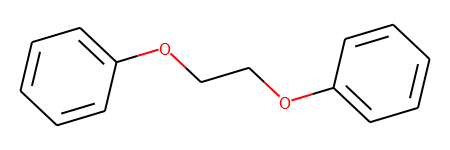

c1ccc(Oc2ccccc2)cc1
[0, 2, 6, 11, 10, 11, 6, 2, 0, 2, 6, 6, 2]


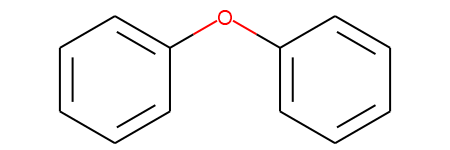

c1ccc(SSc2ccccc2)cc1
[0, 2, 6, 12, 10, 10, 12, 6, 2, 0, 2, 6, 6, 2]


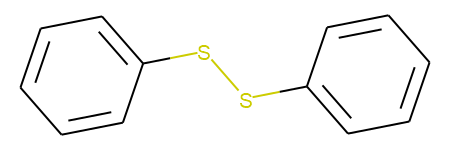

c1ccc(Sc2ccccc2)cc1
[0, 2, 6, 11, 10, 11, 6, 2, 0, 2, 6, 6, 2]


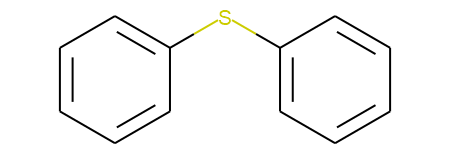

c1ccc2c(c1)CCC2
[0, 0, 2, 7, 7, 2, 5, 4, 5]


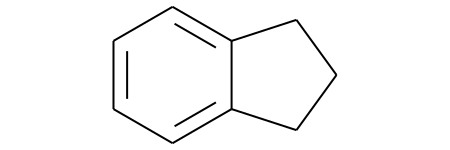

c1ccc2c(c1)CCCC2
[0, 0, 2, 8, 8, 2, 6, 4, 4, 6]


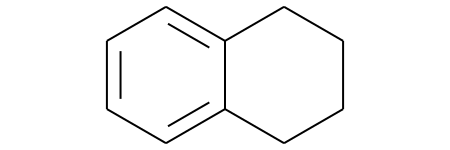

c1ccc2c(c1)CCc1ccccc1-2
[0, 2, 6, 12, 10, 4, 8, 8, 10, 4, 0, 2, 6, 12]


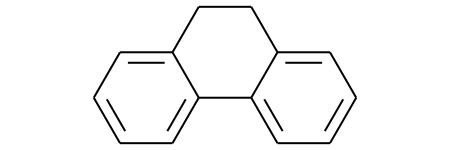

c1ccc2c(c1)COC2
[0, 0, 2, 7, 7, 2, 4, 6, 4]


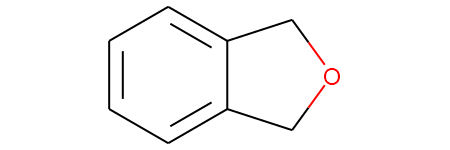

c1ccc2c(c1)Cc1ccccc1-2
[0, 2, 6, 11, 9, 4, 8, 9, 4, 0, 2, 6, 11]


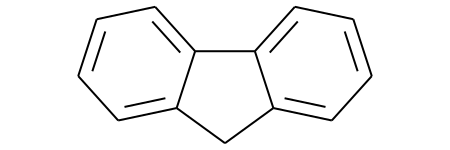

c1ccc2c(c1)Cc1ccccc1C2
[0, 0, 4, 10, 10, 4, 8, 10, 4, 0, 0, 4, 10, 8]


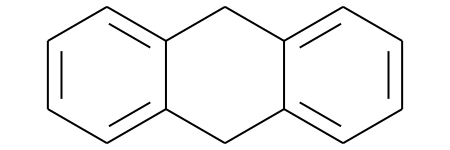

c1ccc2c(c1)OCCO2
[0, 0, 2, 8, 8, 2, 6, 4, 4, 6]


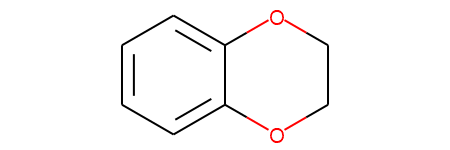

c1ccc2c(c1)OCCOCCOCCO2
[0, 0, 2, 14, 14, 2, 12, 8, 6, 10, 4, 4, 10, 6, 8, 12]


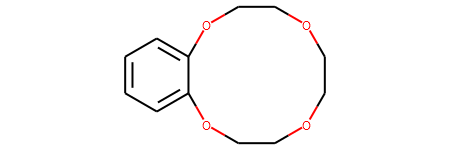

c1ccc2c(c1)OCCOCCOCCOCCO2
[0, 0, 2, 17, 17, 2, 15, 10, 8, 13, 6, 4, 12, 4, 6, 13, 8, 10, 15]


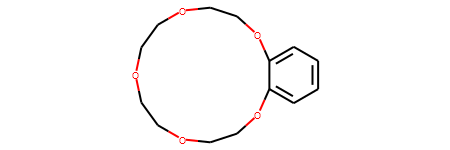

c1ccc2c(c1)OCCOCCOCCOCCOCCO2
[0, 0, 2, 20, 20, 2, 18, 12, 10, 16, 8, 6, 14, 4, 4, 14, 6, 8, 16, 10, 12, 18]


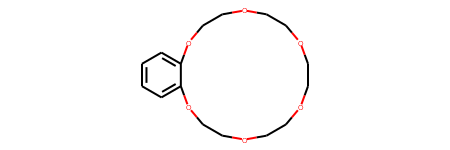

c1ccc2c(c1)OCCOCCOCCOCCOCCOCCO2
[0, 0, 2, 23, 23, 2, 21, 14, 12, 19, 10, 8, 17, 6, 4, 16, 4, 6, 17, 8, 10, 19, 12, 14, 21]


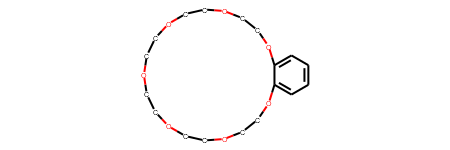

c1ccc2c(c1)OCCOCCOCCOCCOCCOCCOCCO2
[0, 0, 2, 26, 26, 2, 24, 16, 14, 22, 12, 10, 20, 8, 6, 18, 4, 4, 18, 6, 8, 20, 10, 12, 22, 14, 16, 24]


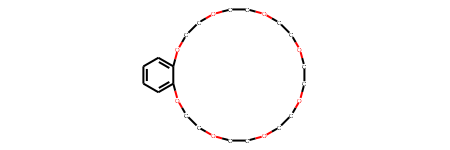

c1ccc2c(c1)OCCOCCOCCOCCOCCOCCOCCOCCO2
[0, 0, 2, 29, 29, 2, 27, 18, 16, 25, 14, 12, 23, 10, 8, 21, 6, 4, 20, 4, 6, 21, 8, 10, 23, 12, 14, 25, 16, 18, 27]


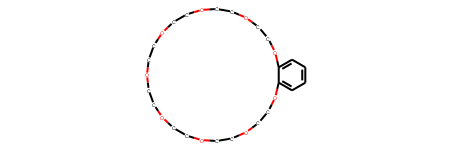

c1ccc2c(c1)OCCOCCOCCOCCOCCOCCOCCOCCOCCO2
[0, 0, 2, 32, 32, 2, 30, 20, 18, 28, 16, 14, 26, 12, 10, 24, 8, 6, 22, 4, 4, 22, 6, 8, 24, 10, 12, 26, 14, 16, 28, 18, 20, 30]


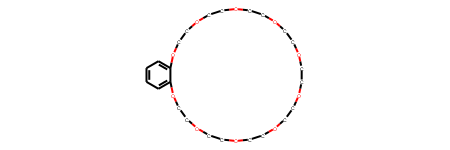

c1ccc2c(c1)OCCOCCOCCOCCOCCOCCOCCOCCOCCOCCO2
[0, 0, 2, 35, 35, 2, 33, 22, 20, 31, 18, 16, 29, 14, 12, 27, 10, 8, 25, 6, 4, 24, 4, 6, 25, 8, 10, 27, 12, 14, 29, 16, 18, 31, 20, 22, 33]


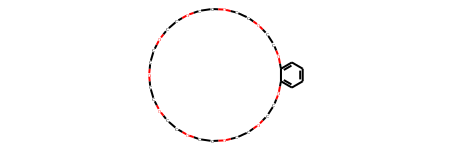

c1ccc2c(c1)OCCOCCOCCOCCOCCOCCOCCOc1ccccc1OCCO2
[0, 2, 6, 36, 34, 4, 30, 20, 18, 28, 16, 14, 26, 12, 10, 24, 8, 8, 24, 10, 12, 26, 14, 16, 28, 18, 20, 30, 34, 4, 0, 2, 6, 36, 32, 22, 22, 32]


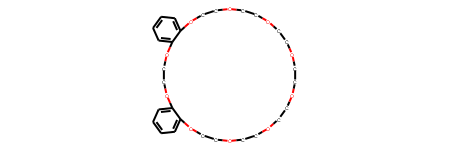

c1ccc2c(c1)OCCOCCOCCOCCOCCOCCOCCOc1ccccc1OCCOCCOCCOCCOCCOCCOCCO2
[0, 0, 4, 52, 52, 4, 48, 32, 28, 44, 24, 20, 40, 16, 12, 36, 8, 8, 36, 12, 16, 40, 20, 24, 44, 28, 32, 48, 52, 4, 0, 0, 4, 52, 48, 32, 28, 44, 24, 20, 40, 16, 12, 36, 8, 8, 36, 12, 16, 40, 20, 24, 44, 28, 32, 48]


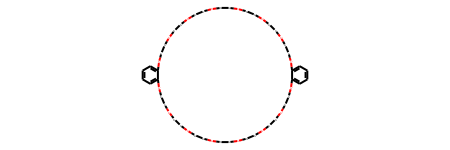

c1ccc2c(c1)OCCOCCOCCOCCOCCOCCOc1ccccc1OCCO2
[0, 2, 6, 33, 31, 4, 27, 18, 16, 25, 14, 12, 23, 10, 8, 22, 8, 10, 23, 12, 14, 25, 16, 18, 27, 31, 4, 0, 2, 6, 33, 29, 20, 20, 29]


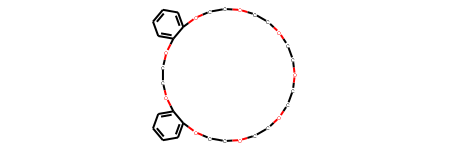

c1ccc2c(c1)OCCOCCOCCOCCOCCOCCOc1ccccc1OCCOCCOCCO2
[0, 2, 6, 39, 37, 4, 33, 22, 18, 29, 14, 12, 27, 10, 8, 26, 8, 10, 27, 12, 14, 29, 18, 22, 33, 37, 4, 0, 2, 6, 39, 35, 24, 20, 31, 16, 16, 31, 20, 24, 35]


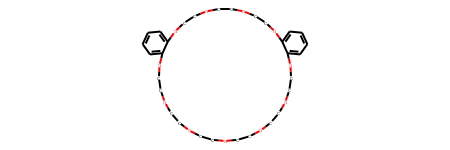

c1ccc2c(c1)OCCOCCOCCOCCOc1ccccc1OCCOCCOCCOCCO2
[0, 0, 4, 34, 34, 4, 30, 20, 16, 26, 12, 8, 24, 8, 12, 26, 16, 20, 30, 34, 4, 0, 0, 4, 34, 30, 20, 16, 26, 12, 8, 24, 8, 12, 26, 16, 20, 30]


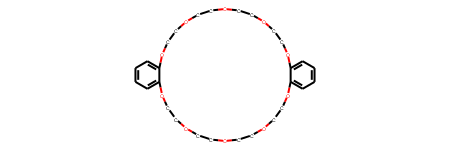

c1ccc2c(c1)OCCOCCOCCOc1ccccc1OCCOCCOCCO2
[0, 0, 4, 28, 28, 4, 24, 16, 12, 20, 8, 8, 20, 12, 16, 24, 28, 4, 0, 0, 4, 28, 24, 16, 12, 20, 8, 8, 20, 12, 16, 24]


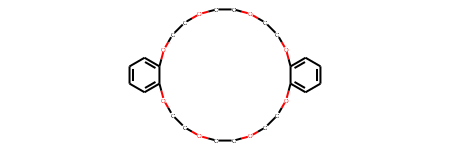

c1ccc2c(c1)OCCOCCOc1ccccc1OCCO2
[0, 2, 6, 21, 19, 4, 15, 10, 8, 14, 8, 10, 15, 19, 4, 0, 2, 6, 21, 17, 12, 12, 17]


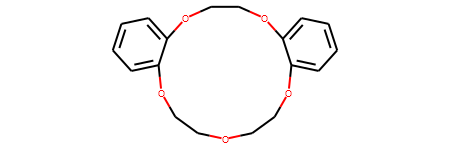

c1ccc2c(c1)OCCOCCOc1ccccc1OCCOCCO2
[0, 0, 4, 22, 22, 4, 18, 12, 8, 16, 8, 12, 18, 22, 4, 0, 0, 4, 22, 18, 12, 8, 16, 8, 12, 18]


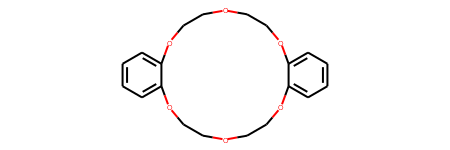

c1ccc2c(c1)OCO2
[0, 0, 2, 7, 7, 2, 5, 4, 5]


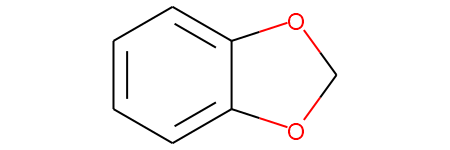

c1ccc2c(c1)Oc1ccccc1O2
[0, 0, 4, 10, 10, 4, 8, 10, 4, 0, 0, 4, 10, 8]


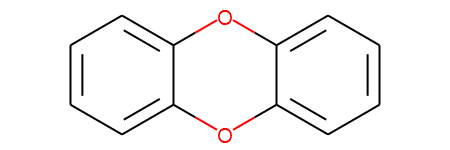

c1ccc2c(c1)Sc1ccccc1S2
[0, 0, 4, 10, 10, 4, 8, 10, 4, 0, 0, 4, 10, 8]


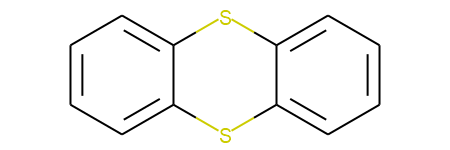

c1ccc2c(c1)[nH]c(=NCCCN1CCN(CCCN=c3[nH]c4ccccc4n4cccc34)CC1)c1cccn12
[0, 2, 10, 34, 30, 6, 26, 28, 24, 16, 14, 18, 36, 20, 20, 36, 18, 14, 16, 24, 28, 26, 30, 6, 0, 2, 10, 34, 38, 12, 4, 8, 32, 20, 20, 32, 8, 4, 12, 38]


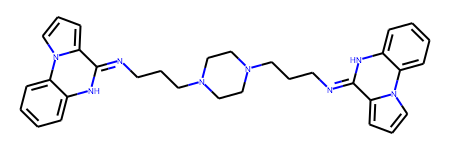

c1ccc2c(c1)[nH]c1ccccc12
[0, 2, 6, 11, 9, 4, 8, 9, 4, 0, 2, 6, 11]


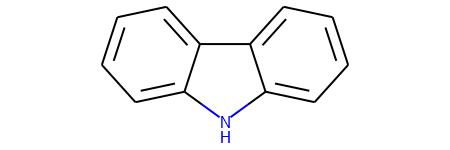

c1ccc2c(c1)c1cccc3ccc4cccc2c4c31
[0, 0, 8, 14, 14, 8, 16, 10, 2, 4, 12, 6, 6, 12, 4, 2, 10, 16, 18, 18]


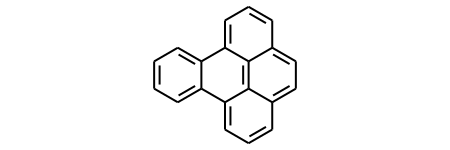

c1ccc2c(c1)c1ccccc1c1c3ccccc3c3ccccc3c21
[0, 4, 12, 20, 16, 8, 16, 8, 0, 4, 12, 20, 24, 20, 12, 4, 0, 8, 16, 16, 8, 0, 4, 12, 20, 24]


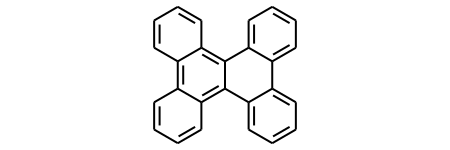

c1ccc2c(c1)c1ccccc1c1ccccc21
[0, 0, 6, 12, 12, 6, 12, 6, 0, 0, 6, 12, 12, 6, 0, 0, 6, 12]


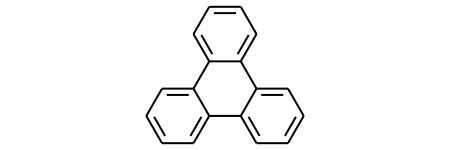

c1ccc2c(c1)ccc1[nH]c3ccc4ccccc4c3c12
[0, 2, 10, 17, 13, 4, 6, 8, 15, 12, 15, 8, 6, 13, 4, 0, 2, 10, 17, 19, 19]


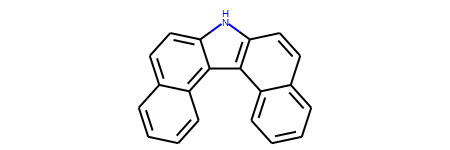

c1ccc2c(c1)ccc1c2ccc2c3ccccc3ccc21
[0, 2, 8, 16, 14, 4, 6, 12, 20, 18, 10, 10, 18, 16, 8, 2, 0, 4, 14, 6, 12, 20]


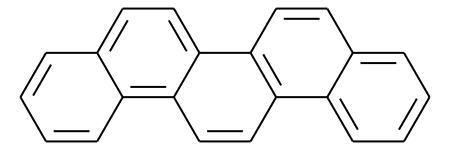

c1ccc2c(c1)ccc1c3ccc4ccccc4c3[nH]c21
[0, 2, 8, 15, 13, 4, 6, 10, 17, 17, 10, 6, 13, 4, 0, 2, 8, 15, 19, 12, 19]


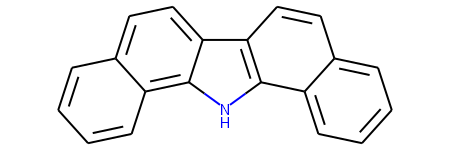

c1ccc2c(c1)ccc1c3ccccc3ccc21
[0, 2, 8, 14, 12, 4, 6, 10, 16, 14, 8, 2, 0, 4, 12, 6, 10, 16]


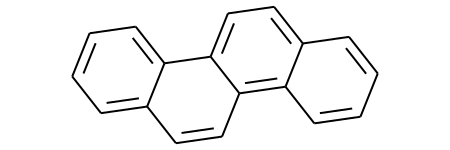

c1ccc2c(c1)ccc1cc3c(ccc4ccccc43)cc12
[0, 2, 10, 18, 14, 4, 6, 8, 16, 12, 20, 16, 8, 6, 14, 4, 0, 2, 10, 18, 12, 20]


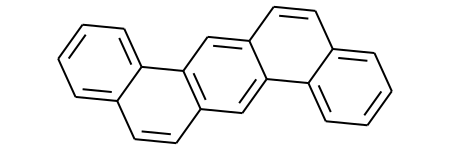

c1ccc2c(c1)ccc1ccccc12
[0, 2, 8, 12, 10, 4, 6, 6, 10, 4, 0, 2, 8, 12]


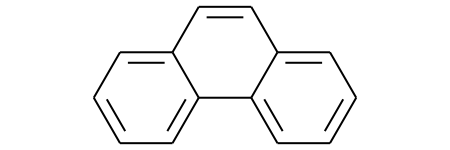

c1ccc2c(c1)nnc1ccccc12
[0, 2, 6, 12, 10, 4, 8, 8, 10, 4, 0, 2, 6, 12]


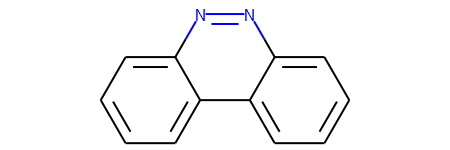

c1ccc2c(c1)oc1ccccc12
[0, 2, 6, 11, 9, 4, 8, 9, 4, 0, 2, 6, 11]


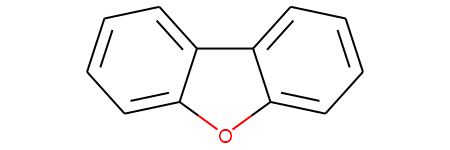

c1ccc2c(c1)sc1ccccc12
[0, 2, 6, 11, 9, 4, 8, 9, 4, 0, 2, 6, 11]


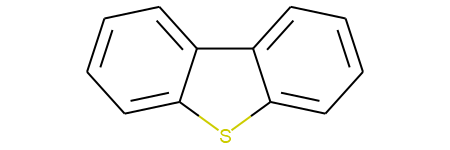

c1ccc2cc3c4ccccc4c4ccccc4c3cc2c1
[0, 0, 6, 14, 12, 20, 18, 10, 4, 2, 8, 16, 16, 8, 2, 4, 10, 18, 20, 12, 14, 6]


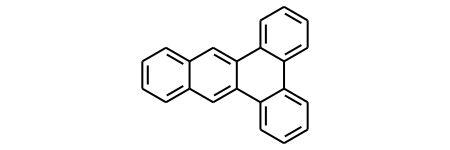

c1ccc2cc3cc4cc5ccccc5cc4cc3cc2c1
[0, 0, 4, 14, 8, 18, 12, 18, 8, 14, 4, 0, 0, 4, 14, 8, 18, 12, 18, 8, 14, 4]


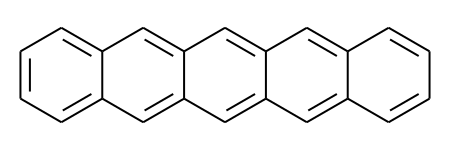

c1ccc2cc3cc4ccccc4cc3cc2c1
[0, 0, 4, 12, 8, 16, 8, 12, 4, 0, 0, 4, 12, 8, 16, 8, 12, 4]


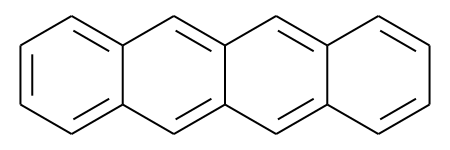

c1ccc2cc3ccccc3cc2c1
[0, 0, 4, 10, 8, 10, 4, 0, 0, 4, 10, 8, 10, 4]


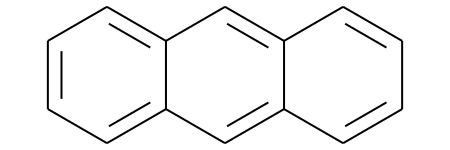

c1ccc2ccccc2c1
[0, 0, 4, 8, 4, 0, 0, 4, 8, 4]


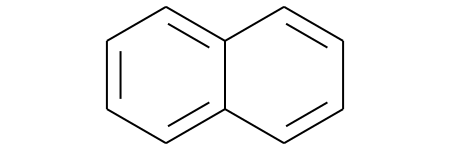

c1ccc2cnncc2c1
[0, 0, 2, 8, 4, 6, 6, 4, 8, 2]


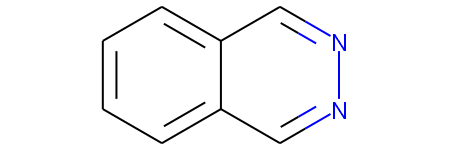

c1ccc2nc(-c3ccc4ccccc4n3)ccc2c1
[0, 2, 10, 18, 12, 14, 14, 4, 8, 16, 6, 0, 2, 10, 18, 12, 4, 8, 16, 6]


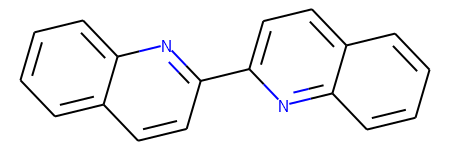

c1ccc2nc3ccccc3nc2c1
[0, 0, 4, 10, 8, 10, 4, 0, 0, 4, 10, 8, 10, 4]


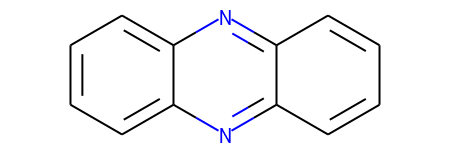

c1ccc2nccnc2c1
[0, 0, 4, 8, 6, 2, 2, 6, 8, 4]


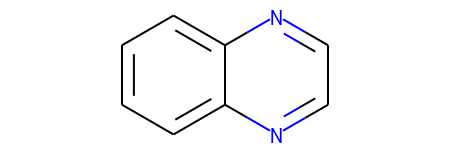

c1ccc2nonc2c1
[0, 0, 2, 7, 4, 6, 4, 7, 2]


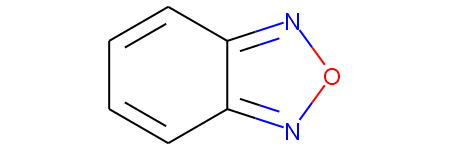

c1ccc2nsnc2c1
[0, 0, 2, 7, 4, 6, 4, 7, 2]


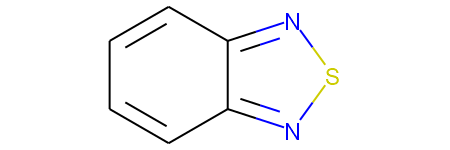

c1ccccc1
[0, 0, 0, 0, 0, 0]


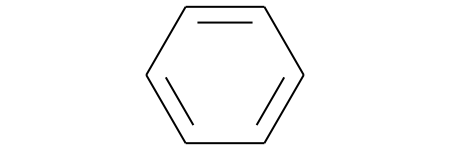

c1ccnnc1
[0, 0, 2, 4, 4, 2]


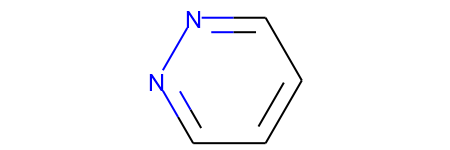

c1ccoc1
[0, 0, 2, 4, 2]


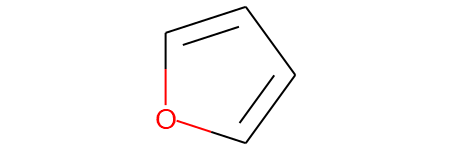

c1ccsc1
[0, 0, 2, 4, 2]


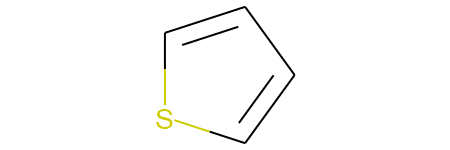

c1cnc2c(c1)[nH]c(=NCCCN1CCN(CCCN=c3[nH]c4cccnc4n4cccc34)CC1)c1cccn12
[0, 4, 24, 34, 30, 6, 26, 28, 22, 14, 12, 16, 36, 18, 18, 36, 16, 12, 14, 22, 28, 26, 30, 6, 0, 4, 24, 34, 38, 10, 2, 8, 32, 18, 18, 32, 8, 2, 10, 38]


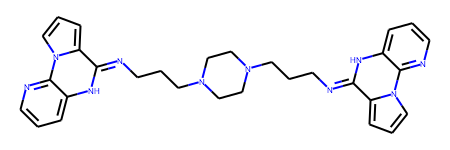

c1cnc2c(c1)ccc1cccnc12
[0, 2, 8, 12, 10, 4, 6, 6, 10, 4, 0, 2, 8, 12]


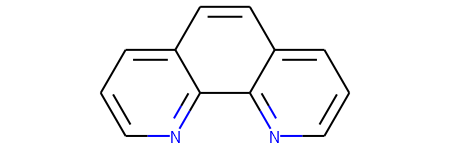

c1cnc2ccc3ncccc3c2c1
[0, 2, 8, 10, 4, 4, 10, 8, 2, 0, 6, 12, 12, 6]


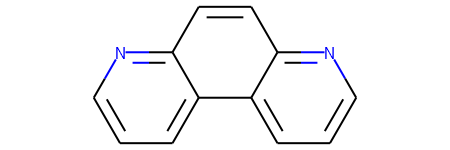

c1cnccn1
[0, 0, 4, 0, 0, 4]


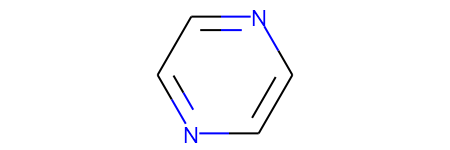

c1cnon1
[0, 0, 2, 4, 2]


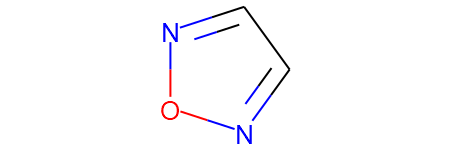

c1csc(-c2ccc(-c3cccs3)s2)c1
[0, 2, 8, 11, 13, 6, 6, 13, 11, 4, 0, 2, 8, 10, 4]


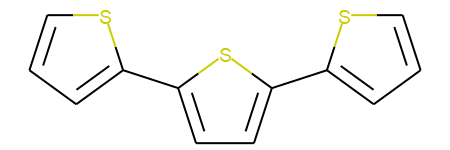

c1csc(-c2cccs2)c1
[0, 2, 6, 8, 8, 4, 0, 2, 6, 4]


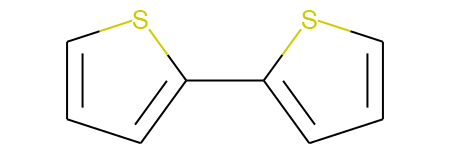

c1ncncn1
[0, 3, 0, 3, 0, 3]


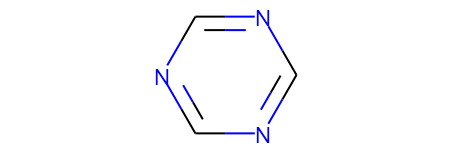

n1onc2c1NC1Nc3nonc3NC1N2
[0, 8, 0, 10, 10, 4, 14, 4, 10, 0, 8, 0, 10, 4, 14, 4]


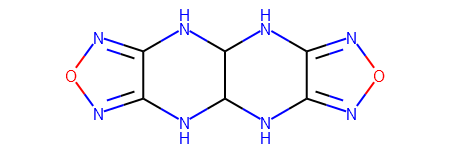

In [47]:
for smiles in symmetry_data.smiles:
    mol = Chem.MolFromSmiles(smiles)
    print(smiles)
    print(list(Chem.CanonicalRankAtoms(mol, breakTies=False)))
    display(mol)

BrC1C2CC3C(C2)C13
[0, 4, 3, 1, 5, 5, 1, 7]


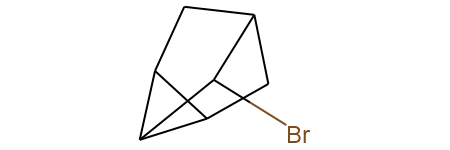

BrC1CC2CCC1C2
[0, 6, 2, 5, 1, 3, 7, 4]


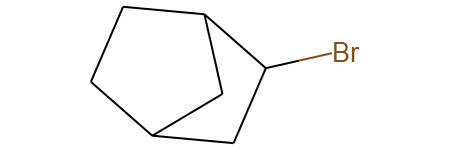

BrC1CCCCC1
[0, 6, 4, 2, 1, 2, 4]


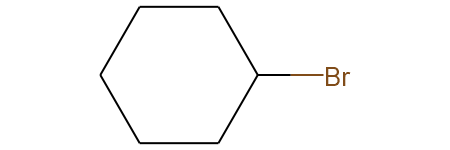

BrC=C(Br)Br
[0, 3, 4, 1, 1]


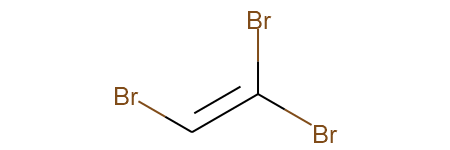

BrCC1CO1
[0, 1, 4, 2, 3]


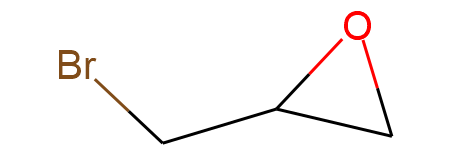

BrCCCc1ccccc1
[0, 6, 7, 8, 9, 4, 2, 1, 2, 4]


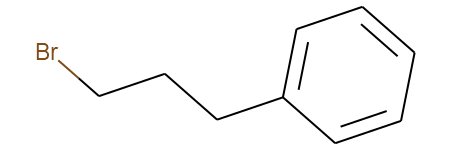

BrCCc1ccccc1
[0, 6, 7, 8, 4, 2, 1, 2, 4]


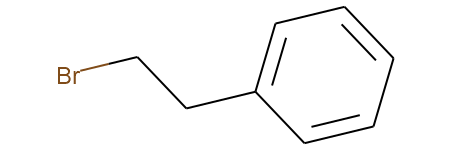

BrCc1ccccc1
[0, 6, 7, 4, 2, 1, 2, 4]


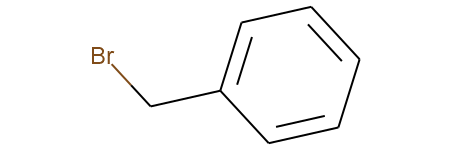

Brc1cc(Br)c(NC2=NCCN2)c(Br)c1
[0, 11, 3, 12, 1, 14, 9, 10, 7, 5, 6, 8, 12, 1, 3]


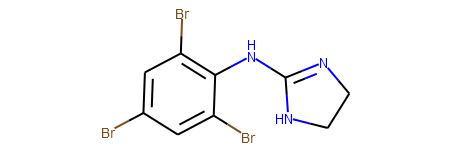

Brc1cc(Br)c(Oc2c(Br)c(Br)c(Br)c(Br)c2Br)cc1Br
[0, 11, 8, 13, 2, 14, 10, 20, 18, 6, 16, 4, 15, 3, 16, 4, 18, 6, 9, 12, 1]


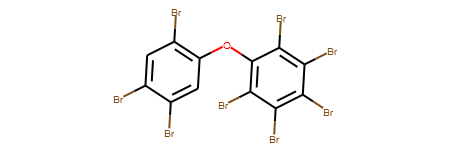

Brc1cc(Br)c(Oc2cc(Br)c(Br)c(Br)c2)cc1Br
[0, 12, 6, 14, 2, 17, 10, 11, 7, 15, 3, 18, 5, 15, 3, 7, 9, 13, 1]


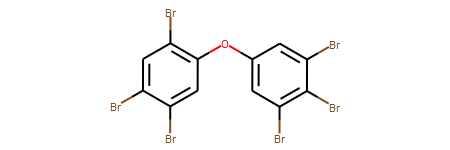

Brc1cc2ccccc2nn1
[0, 8, 4, 9, 3, 1, 2, 5, 10, 7, 6]


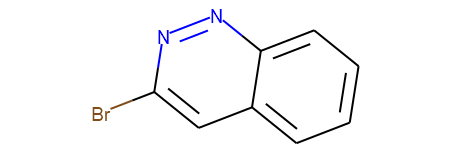

Brc1ccc(-c2cc3ccccn3c2)cc1
[0, 11, 3, 5, 12, 13, 8, 14, 7, 1, 2, 9, 15, 10, 5, 3]


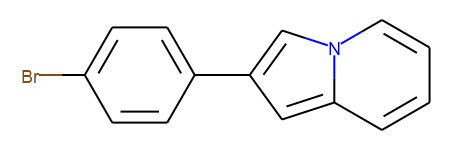

Brc1ccc(-c2ccccc2)cc1
[0, 10, 4, 8, 12, 11, 6, 2, 1, 2, 6, 8, 4]


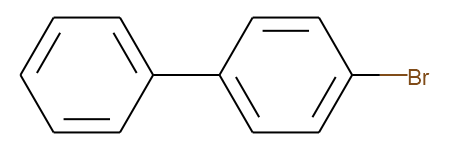

Brc1ccc(Br)c(-c2cc(Br)c(Br)cc2Br)c1
[0, 10, 5, 6, 13, 3, 15, 16, 9, 12, 2, 11, 1, 7, 14, 4, 8]


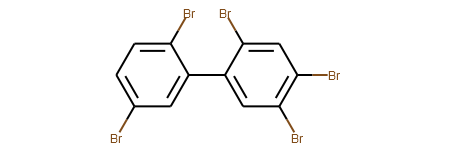

Brc1ccc(NC2=NCCN2)cc1
[0, 11, 1, 3, 12, 9, 10, 7, 5, 6, 8, 3, 1]


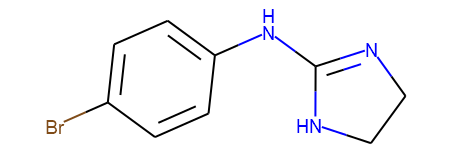

Brc1ccc(Oc2cc(Br)c(Br)cc2Br)c(Br)c1
[0, 11, 5, 8, 16, 10, 17, 9, 13, 2, 12, 1, 7, 15, 4, 14, 3, 6]


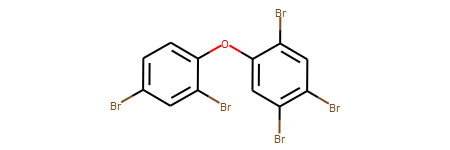

Brc1ccc2cccnc2c1
[0, 8, 3, 5, 9, 4, 1, 2, 7, 10, 6]


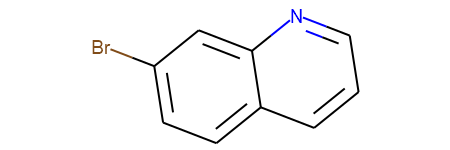

Brc1ccc2ncccc2c1
[0, 8, 3, 6, 10, 7, 2, 1, 4, 9, 5]


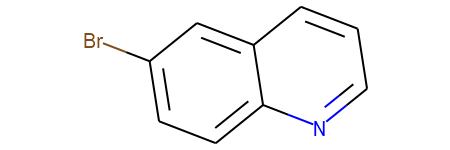

Brc1cccc(-c2c[nH]c(SCCc3c[nH]cn3)n2)c1
[0, 15, 3, 1, 4, 16, 18, 7, 13, 19, 14, 8, 9, 17, 6, 12, 2, 10, 11, 5]


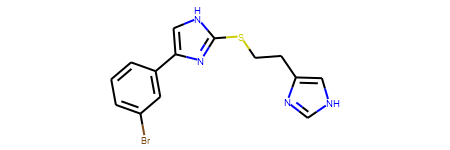

Brc1cccc(-c2cc3ccccn3c2)c1
[0, 11, 4, 1, 5, 12, 13, 8, 14, 7, 2, 3, 9, 15, 10, 6]


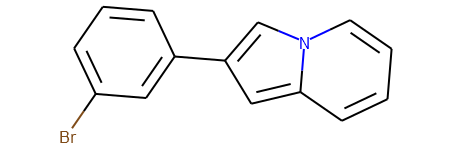

Brc1cccc(-c2ccccc2)c1
[0, 10, 5, 4, 8, 12, 11, 6, 2, 1, 2, 6, 9]


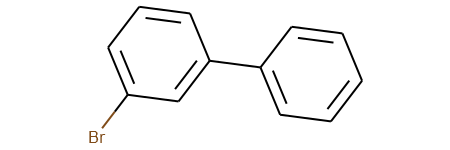

Brc1cccc(Br)c1
[0, 6, 3, 2, 3, 6, 0, 5]


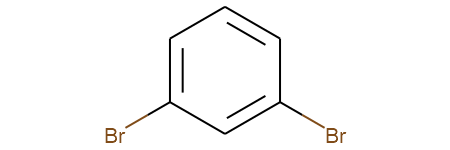

Brc1cccc(Br)c1NC1=NCCN1
[0, 11, 3, 2, 3, 11, 0, 13, 9, 10, 7, 5, 6, 8]


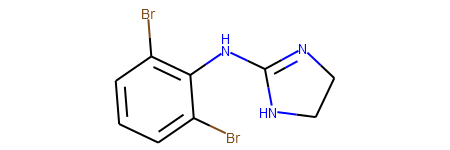

Brc1cccc(NC2=NCCN2)c1Br
[0, 11, 3, 2, 4, 12, 9, 10, 7, 5, 6, 8, 13, 1]


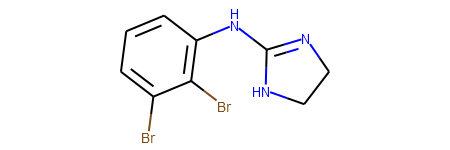

Brc1cccc(Oc2ccc(Br)c(Br)c2Br)c1
[0, 11, 5, 4, 6, 12, 10, 14, 9, 8, 13, 1, 15, 2, 16, 3, 7]


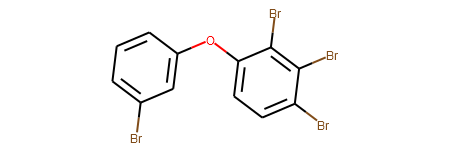

Brc1ccccc1
[0, 6, 4, 2, 1, 2, 4]


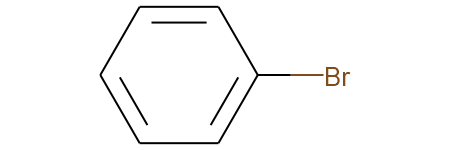

Brc1ccccc1-c1ccccc1
[0, 11, 8, 4, 5, 9, 12, 10, 6, 2, 1, 2, 6]


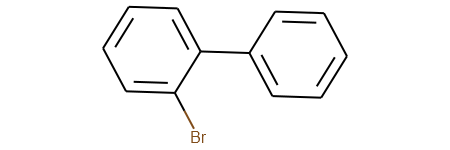

Brc1ccccn1
[0, 6, 4, 2, 1, 3, 5]


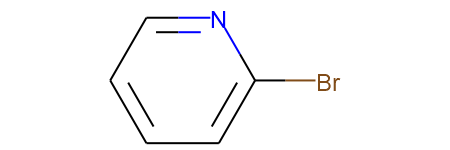

Brc1cccnc1
[0, 6, 3, 1, 2, 5, 4]


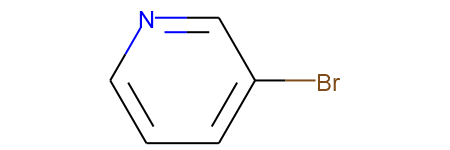

Brc1cccs1
[0, 5, 3, 1, 2, 4]


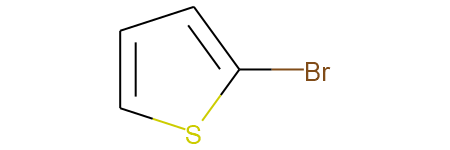

Brc1ccncc1
[0, 6, 3, 1, 5, 1, 3]


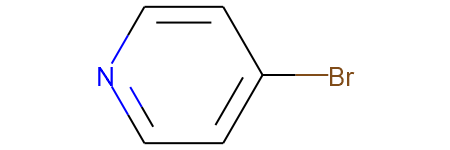

Brc1ccoc1
[0, 5, 2, 1, 4, 3]


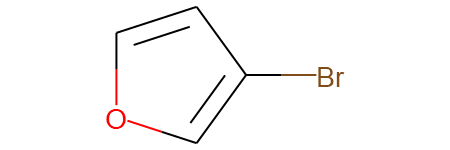

Brc1ccsc1
[0, 5, 2, 1, 4, 3]


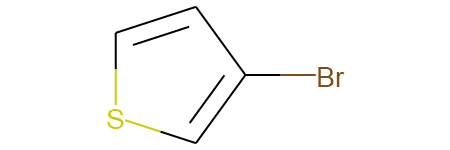

Brc1ccsc1Br
[0, 5, 3, 2, 4, 6, 1]


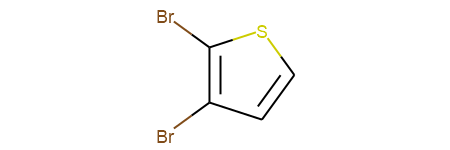

Brc1cnc2ccccc2c1
[0, 8, 3, 7, 10, 6, 2, 1, 4, 9, 5]


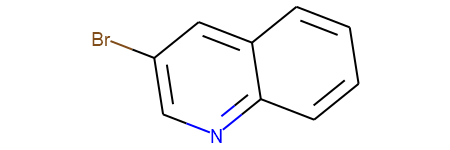

Brc1cnccn1
[0, 6, 3, 4, 1, 2, 5]


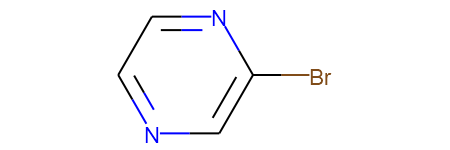

Brc1cncnc1
[0, 6, 2, 4, 1, 4, 2]


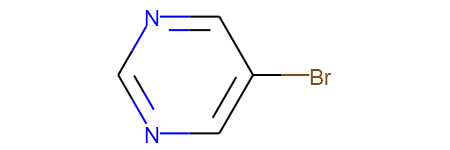

Brc1nc(Br)c(Br)[nH]1
[0, 5, 3, 6, 1, 7, 2, 4]


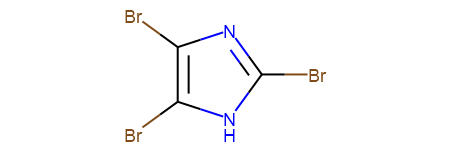

Brc1ncccn1
[0, 6, 4, 2, 1, 2, 4]


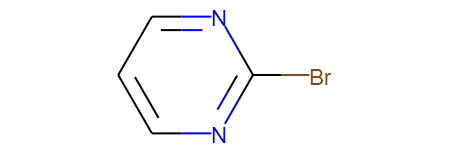

C#CC(C)(C)N(C)C(C)C
[0, 6, 9, 4, 4, 8, 3, 7, 1, 1]


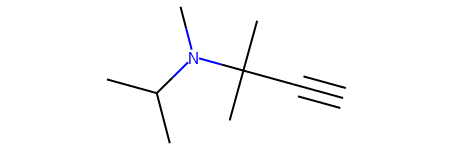

C#CC(C)(C)NC(=O)c1cc(Cl)cc(Cl)c1
[0, 6, 15, 1, 1, 10, 11, 3, 14, 8, 12, 4, 7, 12, 4, 8]


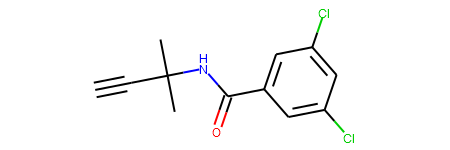

C#CC(C)(C)O
[0, 4, 5, 1, 1, 3]


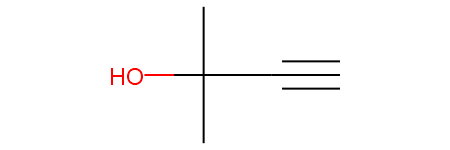

C#CC(C)N(C)C(=O)Nc1ccc(Cl)cc1
[0, 5, 14, 1, 15, 2, 11, 3, 10, 13, 8, 6, 12, 4, 6, 8]


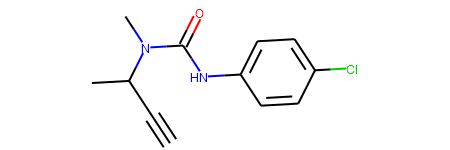

C#CC(C)OC(=O)Nc1ccc(OCC)c(OCC)c1
[0, 5, 19, 3, 14, 15, 4, 11, 16, 6, 7, 17, 12, 9, 1, 18, 13, 10, 2, 8]


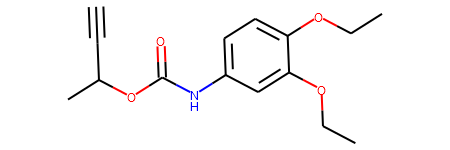

C#CC(C=C)(CC)OC(N)=O
[0, 5, 10, 6, 1, 7, 2, 8, 9, 3, 4]


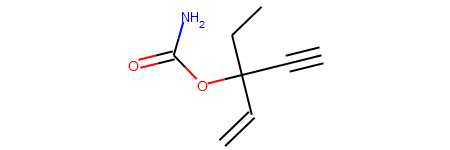

C#CC(C=CCl)(CC)OC(N)=O
[0, 5, 11, 7, 6, 4, 8, 1, 9, 10, 2, 3]


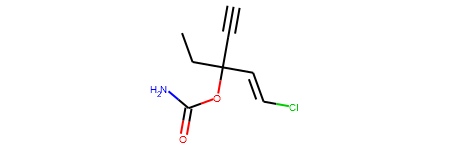

C#CC(CC)OC(=O)Nc1ccc(OCC)c(OCC)c1
[0, 5, 20, 11, 3, 15, 16, 4, 12, 17, 6, 7, 18, 13, 9, 1, 19, 14, 10, 2, 8]


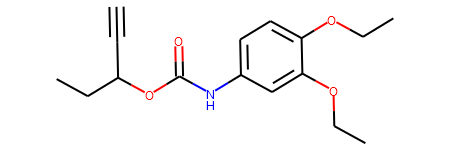

C#CC(OC(N)=O)c1ccccc1
[0, 3, 12, 9, 10, 1, 2, 11, 7, 5, 4, 5, 7]


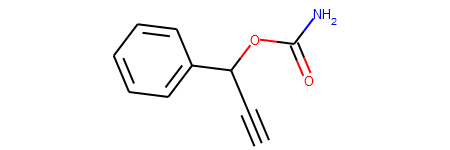

C#CC1(O)C(F)CC2C3CCc4cc(O)ccc4C3C(CC)CC21C
[0, 6, 23, 4, 21, 5, 13, 22, 19, 12, 10, 16, 8, 15, 3, 7, 9, 17, 20, 18, 11, 1, 14, 24, 2]


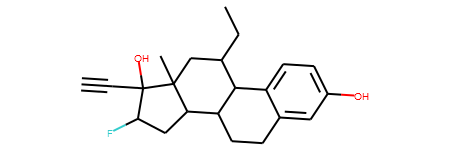

C#CC1(O)C(F)CC2C3CCc4cc(O)ccc4C3C(OC)CC21C
[0, 6, 23, 4, 21, 5, 12, 22, 19, 11, 10, 16, 8, 15, 3, 7, 9, 17, 20, 18, 14, 1, 13, 24, 2]


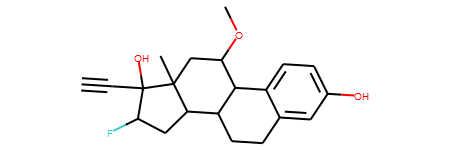

C#CC1(O)C(F)CC2C3CCc4cc(O)ccc4C3CCC21C
[0, 5, 21, 3, 19, 4, 12, 20, 18, 11, 9, 15, 7, 14, 2, 6, 8, 16, 17, 10, 13, 22, 1]


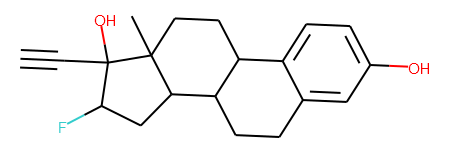

C#CC1(O)CCC2C3CC=C4CC(=O)CCC4(C)C3CCC21C
[0, 5, 21, 4, 13, 11, 19, 17, 9, 6, 16, 8, 15, 3, 7, 12, 20, 1, 18, 10, 14, 22, 2]


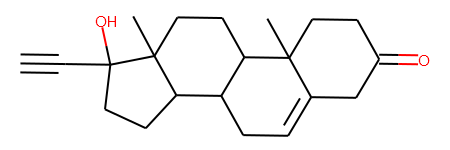

C#CC1(O)CCC2C3CC=C4CC(=O)CCC4C3C(=C)CC21CC
[0, 5, 22, 4, 12, 11, 21, 19, 10, 6, 17, 8, 16, 3, 7, 9, 18, 20, 15, 1, 14, 23, 13, 2]


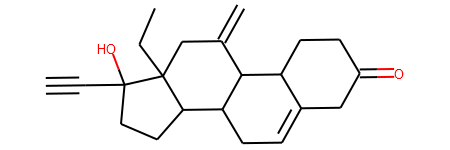

C#CC1(O)CCC2C3CC=C4CC(=O)CCC4C3CCC21C
[0, 4, 20, 3, 12, 11, 19, 18, 10, 5, 15, 7, 14, 2, 6, 8, 16, 17, 9, 13, 21, 1]


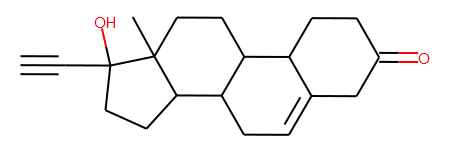

C#CC1(O)CCC2C3CCC4=Cc5oncc5CC4(C)C3CCC21C
[0, 4, 23, 3, 12, 10, 21, 19, 8, 7, 16, 5, 18, 15, 14, 6, 17, 11, 22, 1, 20, 9, 13, 24, 2]


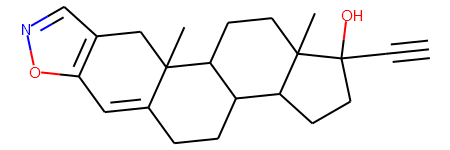

C#CC1(O)CCC2C3CCc4cc(O)ccc4C3C(CC)CC21C
[0, 5, 22, 4, 13, 12, 21, 19, 11, 9, 16, 7, 15, 3, 6, 8, 17, 20, 18, 10, 1, 14, 23, 2]


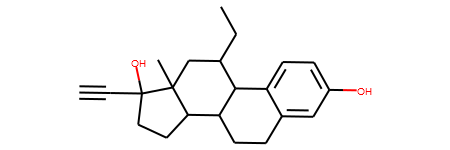

C#CC1(O)CCC2C3CCc4cc(O)ccc4C3C(OC)CC21C
[0, 5, 22, 4, 12, 11, 21, 19, 10, 9, 16, 7, 15, 3, 6, 8, 17, 20, 18, 14, 1, 13, 23, 2]


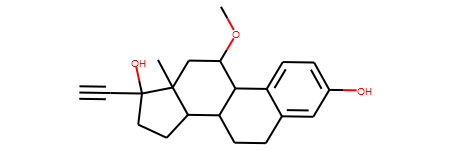

C#CC1(O)CCC2C3CCc4cc(O)ccc4C3CCC21C
[0, 4, 20, 3, 12, 11, 19, 18, 10, 8, 15, 6, 14, 2, 5, 7, 16, 17, 9, 13, 21, 1]


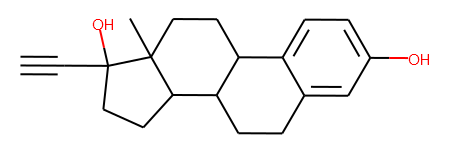

C#CC1(O)CCCCC1
[0, 2, 8, 1, 6, 4, 3, 4, 6]


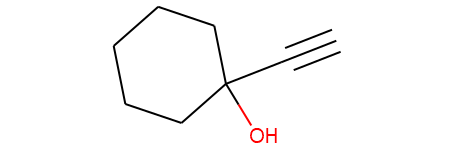

C#CC1(OC(=O)C2=CN(C)C=CC2)CCC2C3CC=C4CC(=O)CCC4(C)C3CCC21C
[0, 6, 30, 20, 22, 5, 23, 9, 28, 1, 8, 7, 12, 18, 16, 27, 25, 14, 10, 24, 13, 21, 4, 11, 17, 29, 2, 26, 15, 19, 31, 3]


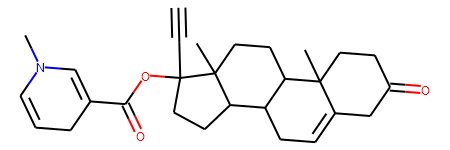

C#CC1(OC(=O)C2=CN(C)C=CC2)CCC2C3CC=C4CC(=O)CCC4C3CCC21C
[0, 5, 29, 19, 21, 4, 22, 8, 28, 1, 7, 6, 11, 17, 16, 27, 26, 15, 9, 23, 12, 20, 3, 10, 13, 24, 25, 14, 18, 30, 2]


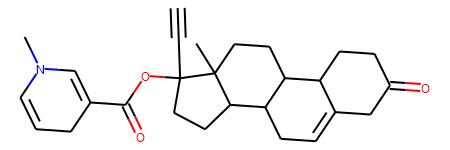

C#CCC(C)OC(=O)Nc1ccc(OCC)c(OCC)c1
[0, 5, 11, 20, 3, 15, 16, 4, 12, 17, 6, 7, 18, 13, 9, 1, 19, 14, 10, 2, 8]


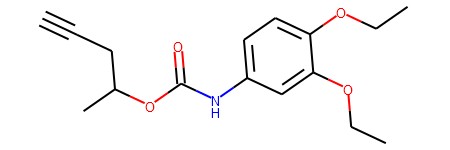

C#CCC(N)C(=O)O
[0, 4, 5, 7, 1, 6, 2, 3]


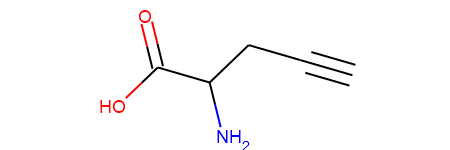

C#CCC(O)(CC#C)c1cccnc1
[0, 3, 9, 13, 2, 9, 3, 0, 12, 7, 5, 6, 11, 8]


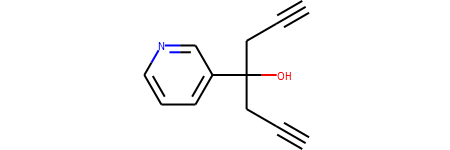

C#CCC(O)(Cc1ccccc1)c1cccnc1
[0, 2, 12, 17, 1, 13, 15, 8, 4, 3, 4, 8, 16, 10, 6, 7, 14, 11]


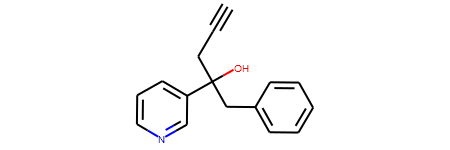

C#CCC(O)(c1ccc(C)cc1)c1cccnc1
[0, 3, 12, 17, 2, 15, 8, 6, 14, 1, 6, 8, 16, 10, 4, 5, 13, 11]


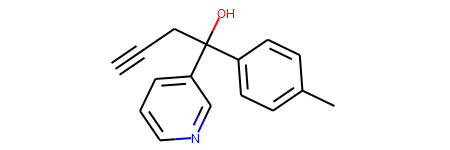

C#CCC(O)(c1ccc(F)cc1)c1cccnc1
[0, 3, 12, 17, 1, 15, 8, 6, 14, 2, 6, 8, 16, 10, 4, 5, 13, 11]


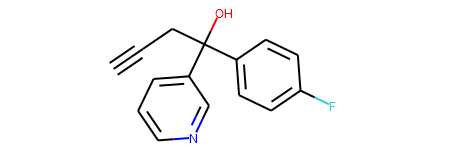

C#CCC(O)(c1ccccc1)c1cccnc1
[0, 2, 12, 16, 1, 14, 8, 4, 3, 4, 8, 15, 10, 6, 7, 13, 11]


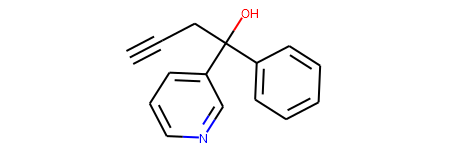

C#CCC(O)(c1cccnc1)C1CCCCC1
[0, 2, 12, 16, 1, 14, 5, 3, 4, 13, 6, 15, 10, 8, 7, 8, 10]


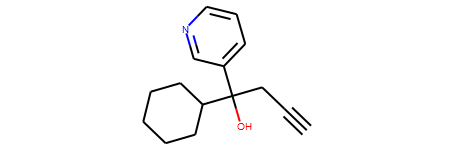

C#CCC(O)(c1cccnc1)c1ccc(Cl)c(Cl)c1
[0, 4, 12, 18, 1, 14, 7, 5, 6, 13, 9, 15, 8, 10, 16, 2, 17, 3, 11]


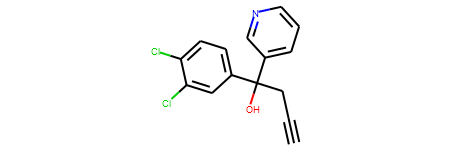

C#CCC(O)(c1cccnc1)c1ccc(Cl)cc1Cl
[0, 4, 12, 18, 1, 15, 8, 5, 6, 13, 9, 17, 11, 7, 14, 2, 10, 16, 3]


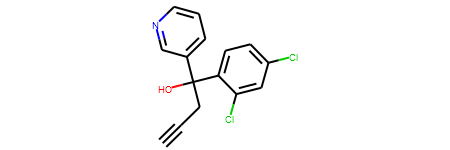

C#CCC(O)(c1cccnc1)c1ccc2ccccc2c1
[0, 2, 14, 20, 1, 16, 7, 3, 6, 15, 9, 17, 8, 11, 18, 10, 4, 5, 12, 19, 13]


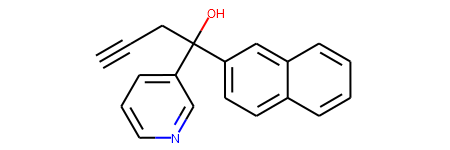

C#CCC(O)c1cccnc1
[0, 2, 7, 10, 1, 9, 5, 3, 4, 8, 6]


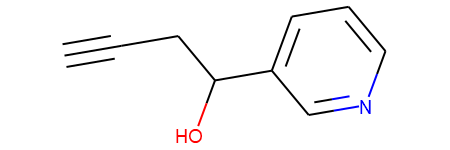

C#CCC1=C(C)C(OC(=O)C2C(C=C(C)C)C2(C)C)CC1=O
[0, 8, 10, 16, 17, 3, 18, 12, 14, 7, 20, 19, 9, 15, 1, 1, 21, 4, 4, 11, 13, 6]


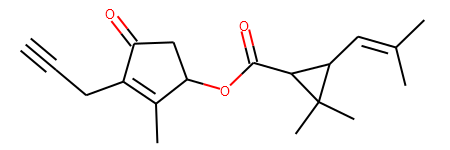

C#CCCC
[0, 2, 4, 3, 1]


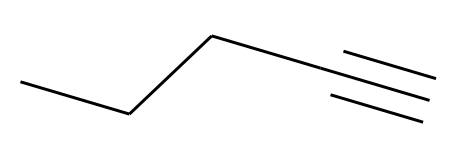

C#CCCC(=O)N(C)c1ccc(S(=O)(=O)N(C)C)cc1
[0, 7, 12, 13, 14, 4, 17, 1, 15, 8, 10, 16, 19, 5, 5, 18, 2, 2, 10, 8]


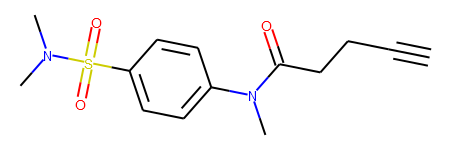

C#CCCC(C)=O
[0, 3, 4, 5, 6, 1, 2]


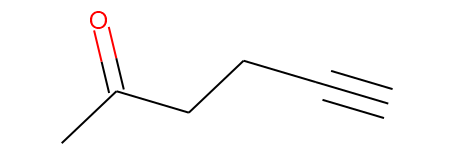

C#CCCCC
[0, 2, 4, 5, 3, 1]


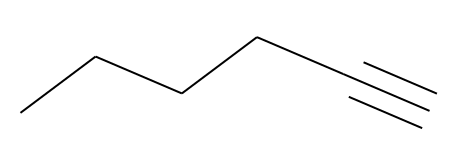

C#CCCOC(=O)Nc1ccc(OCC)c(OCC)c1
[0, 4, 8, 9, 13, 16, 3, 12, 17, 5, 6, 18, 14, 10, 1, 19, 15, 11, 2, 7]


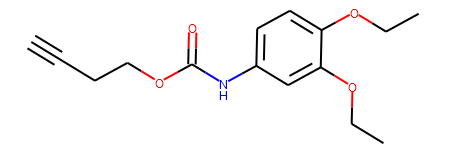

C#CCCOCn1ccnc1C=NO
[0, 2, 6, 7, 11, 8, 13, 5, 4, 10, 12, 3, 9, 1]


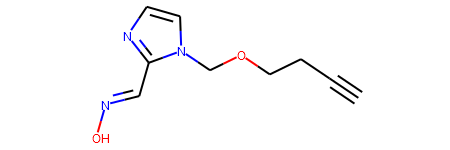

C#CCN(C)C(C)Cc1ccc(F)cc1
[0, 4, 10, 14, 2, 13, 1, 9, 12, 7, 5, 11, 3, 5, 7]


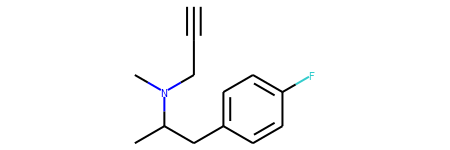

C#CCN(C)C(C)Cc1ccccc1
[0, 3, 10, 13, 2, 12, 1, 9, 11, 7, 5, 4, 5, 7]


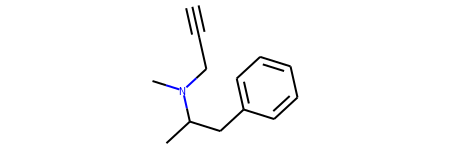

C#CCN(C)N=Nc1[nH]cnc1C(N)=O
[0, 4, 6, 14, 1, 8, 7, 13, 10, 5, 9, 12, 11, 2, 3]


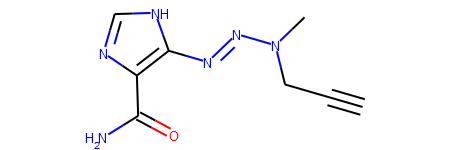

C#CCN1C(=O)C2CC[C@@](C)(C1=O)C2(C)C
[0, 6, 8, 13, 10, 4, 12, 7, 9, 15, 3, 11, 5, 14, 1, 1]


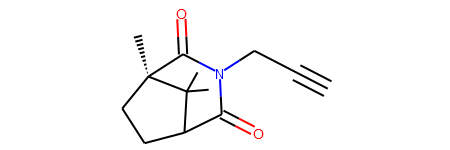

C#CCN1C(=O)COc2cc(F)c(-n3c(O)c4c(c3O)CCC=C4)cc21
[0, 5, 13, 24, 15, 1, 11, 14, 17, 8, 16, 4, 19, 25, 22, 2, 20, 21, 23, 3, 12, 10, 6, 7, 9, 18]


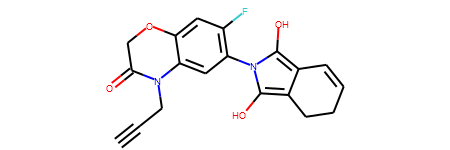

C#CCNC(=O)C1(O)C(C)CC2C3CC=C4CC(=O)C=CC4(C)C3(F)C(O)CC21C
[0, 9, 13, 18, 20, 5, 28, 7, 23, 1, 15, 22, 25, 16, 12, 21, 14, 19, 4, 10, 11, 26, 2, 29, 8, 24, 6, 17, 27, 3]


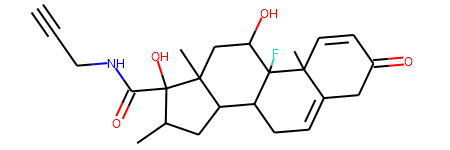

C#CCNC(=O)NCCCC(NC(C)=O)C(=O)NCc1ccccc1
[0, 5, 12, 16, 21, 3, 17, 13, 11, 15, 24, 19, 20, 1, 2, 22, 4, 18, 14, 23, 9, 7, 6, 7, 9]


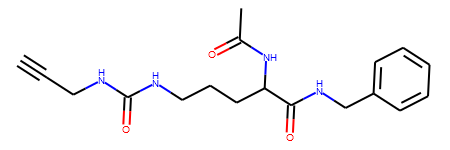

C#CCNC(=O)NCCCCC(NC(C)=O)C(=O)NCc1ccccc1
[0, 5, 13, 17, 22, 3, 18, 14, 11, 12, 16, 25, 20, 21, 1, 2, 23, 4, 19, 15, 24, 9, 7, 6, 7, 9]


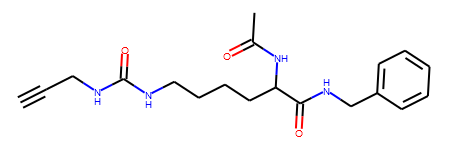

C#CCOC(=O)C(C)Oc1ccc(Oc2ncc(Cl)cc2F)cc1
[0, 5, 12, 14, 17, 2, 23, 1, 16, 20, 9, 7, 19, 15, 22, 13, 6, 18, 4, 11, 21, 3, 7, 9]


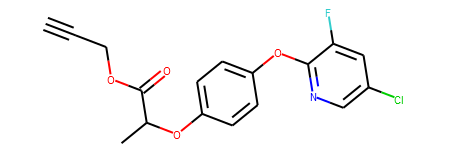

C#CCOC(=O)Nc1ccc(OCC)c(OCC)c1
[0, 4, 8, 12, 15, 3, 11, 16, 5, 6, 17, 13, 9, 1, 18, 14, 10, 2, 7]


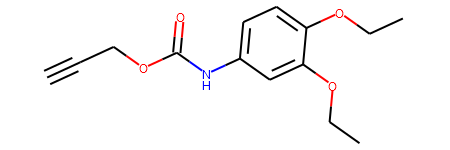

C#CCOC1(c2ccccc2)CN(C)CCO1
[0, 2, 8, 12, 16, 14, 6, 4, 3, 4, 6, 11, 15, 1, 10, 9, 13]


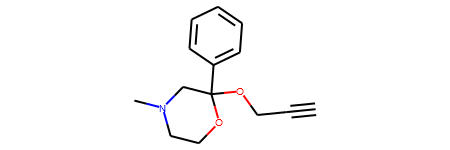

C#CCOC1=Nc2cc(OC(=O)N3CCCC3)c(Cl)cc2OC1
[0, 3, 8, 13, 17, 12, 19, 4, 20, 14, 16, 1, 22, 10, 6, 6, 10, 18, 2, 5, 21, 15, 9]


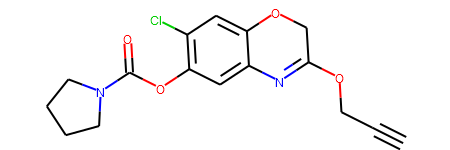

C#CCON=CNc1cc(Cl)c(OCC#C)c(Cl)c1
[0, 4, 9, 13, 11, 6, 12, 15, 7, 16, 2, 18, 14, 10, 5, 1, 16, 2, 7]


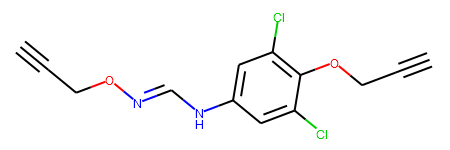

C#CCON=CNc1cc(Cl)c(OCC#C)c(OCC#C)c1
[0, 4, 10, 15, 13, 7, 14, 18, 8, 19, 3, 21, 17, 12, 6, 2, 20, 16, 11, 5, 1, 9]


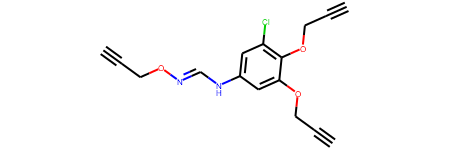

C#CCON=CNc1cc(F)c(OCC#C)c(OCC#C)c1
[0, 4, 10, 15, 13, 7, 14, 18, 8, 19, 3, 21, 17, 12, 6, 2, 20, 16, 11, 5, 1, 9]


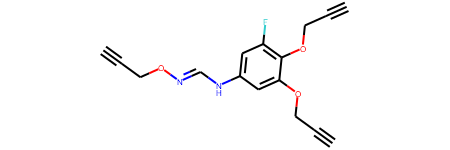

C#CCOS(=O)OC1CCCCC1Oc1ccc(C(C)(C)C)cc1
[0, 5, 12, 16, 22, 4, 17, 21, 14, 11, 10, 13, 20, 15, 18, 6, 8, 19, 23, 1, 1, 1, 8, 6]


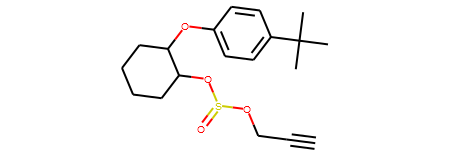

C#CCOc1c(Cl)cc(N=CNOC(C)C)cc1Cl
[0, 5, 9, 12, 17, 15, 3, 7, 14, 10, 6, 11, 13, 18, 1, 1, 7, 15, 3]


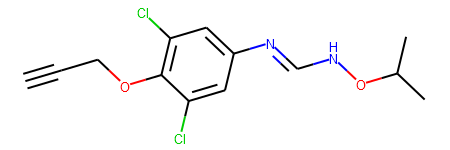

C#CCOc1c(Cl)cc(N=CNOC(C)CC)cc1Cl
[0, 5, 9, 13, 18, 16, 3, 7, 15, 11, 6, 12, 14, 19, 2, 10, 1, 7, 16, 3]


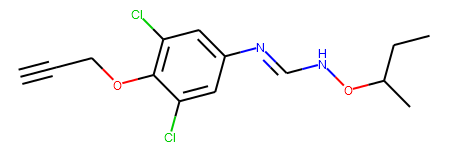

C#CCOc1c(Cl)cc(N=CNOC)cc1Cl
[0, 4, 8, 12, 16, 14, 2, 6, 13, 9, 5, 10, 11, 1, 6, 14, 2]


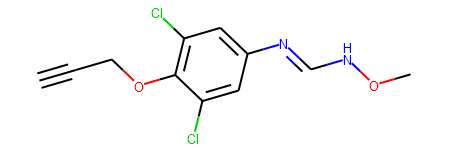

C#CCOc1c(Cl)cc(N=CNOCC#N)cc1Cl
[0, 4, 10, 14, 18, 16, 2, 7, 15, 11, 6, 12, 13, 9, 5, 1, 7, 16, 2]


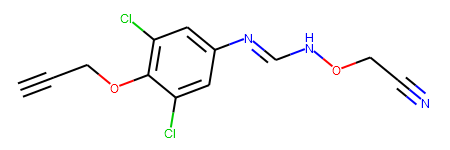

C#CCOc1c(Cl)cc(N=CNOCC(=O)OCC)cc1Cl
[0, 5, 10, 16, 21, 19, 3, 7, 18, 12, 6, 13, 14, 11, 17, 2, 15, 9, 1, 7, 19, 3]


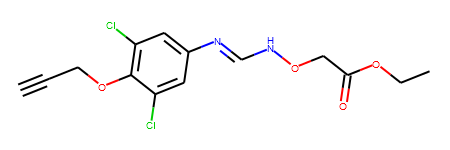

C#CCOc1c(Cl)cc(N=CNOCC)cc1Cl
[0, 4, 9, 13, 17, 15, 2, 6, 14, 10, 5, 11, 12, 8, 1, 6, 15, 2]


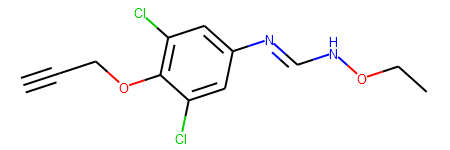

C#CCOc1c(Cl)cc(N=CNOCC=C)cc1Cl
[0, 4, 10, 14, 18, 16, 2, 7, 15, 11, 6, 12, 13, 9, 5, 1, 7, 16, 2]


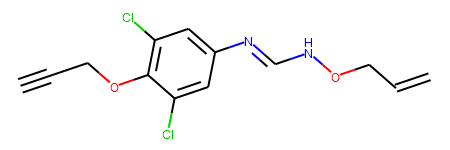

C#CCOc1c(Cl)cc(N=CNOCC=CCl)cc1Cl
[0, 4, 11, 15, 19, 17, 2, 8, 16, 12, 7, 13, 14, 10, 6, 5, 1, 8, 17, 2]


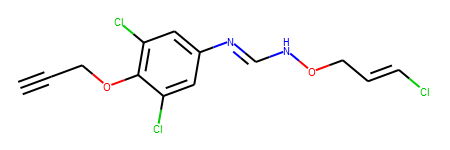

C#CCOc1c(Cl)cc(N=CNOCCC)cc1Cl
[0, 4, 10, 14, 18, 16, 2, 6, 15, 11, 5, 12, 13, 9, 8, 1, 6, 16, 2]


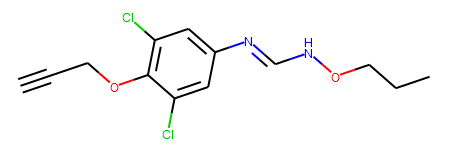

C#CCOc1c(Cl)cc(N=CNOCCCC)cc1Cl
[0, 4, 11, 15, 19, 17, 2, 6, 16, 12, 5, 13, 14, 10, 9, 8, 1, 6, 17, 2]


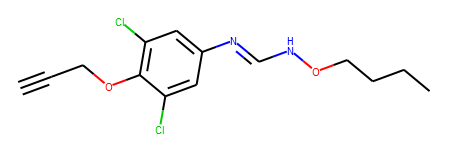

C#CCOc1c(Cl)cc(N=CNOCCCl)cc1Cl
[0, 4, 10, 14, 18, 16, 2, 6, 15, 11, 5, 12, 13, 9, 8, 1, 6, 16, 2]


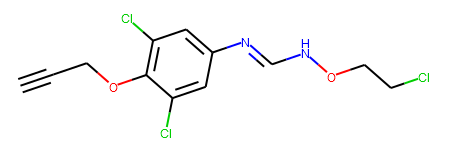

C#CCOc1c(Cl)cc(N=CNOCCOCC)cc1Cl
[0, 4, 11, 16, 20, 18, 2, 6, 17, 12, 5, 13, 15, 10, 9, 14, 8, 1, 6, 18, 2]


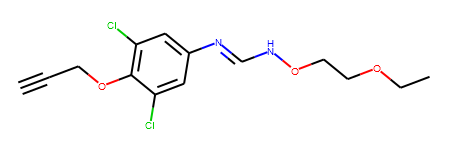

C#CCOc1c(Cl)cc(N=CNOCOC)cc1Cl
[0, 4, 9, 14, 18, 16, 2, 6, 15, 10, 5, 11, 13, 8, 12, 1, 6, 16, 2]


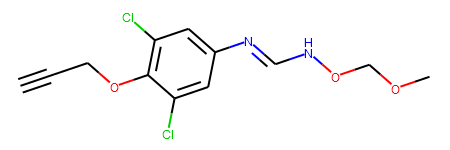

C#CCOc1c(Cl)cc(N=CNOCOCC)cc1Cl
[0, 4, 10, 15, 19, 17, 2, 6, 16, 11, 5, 12, 14, 9, 13, 8, 1, 6, 17, 2]


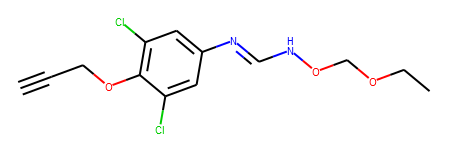

C#CCOc1c(Cl)cc(N=CNOCSC)cc1Cl
[0, 4, 8, 13, 18, 16, 2, 6, 15, 10, 5, 11, 12, 9, 14, 1, 6, 16, 2]


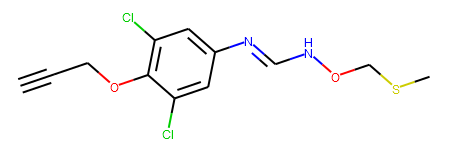

C#CCOc1c(Cl)cc(N=CNOCc2ccccc2)cc1Cl
[0, 3, 12, 17, 22, 20, 1, 10, 19, 14, 4, 15, 16, 13, 18, 8, 6, 5, 6, 8, 10, 20, 1]


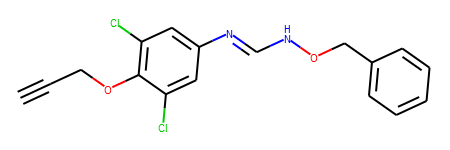

C#CCOc1c(Cl)cc(N=CNOc2ccc(C)cc2)cc1Cl
[0, 4, 12, 16, 22, 20, 2, 10, 18, 13, 5, 14, 15, 19, 8, 6, 17, 1, 6, 8, 10, 20, 2]


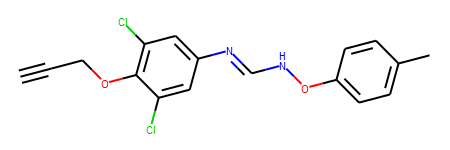

C#CCOc1c(Cl)cc(N=CNOc2ccccc2)cc1Cl
[0, 3, 12, 16, 21, 19, 1, 10, 17, 13, 4, 14, 15, 18, 8, 6, 5, 6, 8, 10, 19, 1]


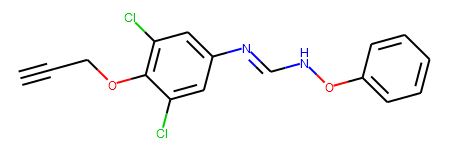

C#CCOc1c(Cl)cc(NC=NO)cc1Cl
[0, 4, 8, 11, 15, 13, 2, 6, 12, 10, 5, 9, 1, 6, 13, 2]


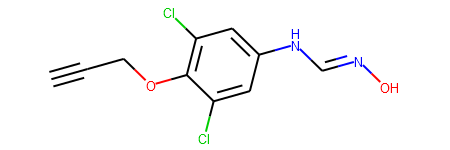

C#CCOc1c(I)cc(C=C2C(=O)N(C)C(=S)N(C)C2=O)cc1OCC
[0, 8, 13, 15, 23, 21, 7, 10, 20, 9, 19, 16, 4, 24, 2, 18, 6, 24, 2, 16, 4, 11, 22, 14, 12, 1]


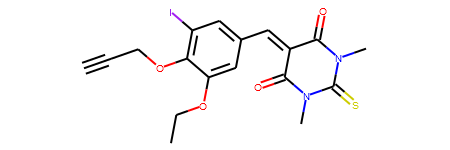

C#CCOc1cc(-n2nc(C(C)(C)C)oc2=O)c(Cl)cc1Cl
[0, 7, 10, 12, 17, 9, 18, 20, 11, 14, 21, 1, 1, 1, 13, 19, 4, 16, 6, 8, 15, 5]


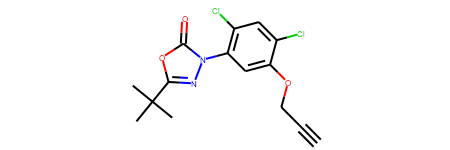

C#CCOc1cc(N=CNOC)cc(Cl)c1OCC#C
[0, 4, 9, 14, 18, 8, 16, 11, 6, 12, 13, 2, 7, 17, 3, 19, 15, 10, 5, 1]


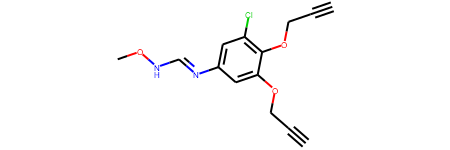

C#CCOc1cc(N=CNOC)cc(F)c1OCC#C
[0, 4, 9, 14, 18, 8, 16, 11, 6, 12, 13, 2, 7, 17, 3, 19, 15, 10, 5, 1]


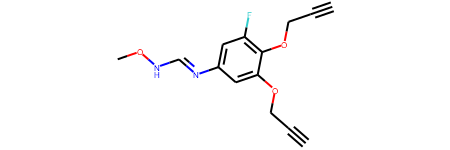

C#CCOc1cc(N=CNOCC)cc(Cl)c1OCC#C
[0, 4, 10, 15, 19, 8, 17, 12, 6, 13, 14, 9, 2, 7, 18, 3, 20, 16, 11, 5, 1]


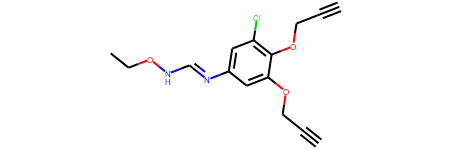

C#CCOc1cc(N=CNOCC)cc(F)c1OCC#C
[0, 4, 10, 15, 19, 8, 17, 12, 6, 13, 14, 9, 2, 7, 18, 3, 20, 16, 11, 5, 1]


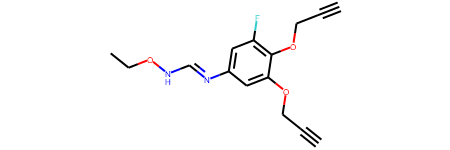

C#CCOc1cc(N=CNOCC=C)cc(Cl)c1OCC#C
[0, 4, 11, 16, 20, 9, 18, 13, 7, 14, 15, 10, 6, 2, 8, 19, 3, 21, 17, 12, 5, 1]


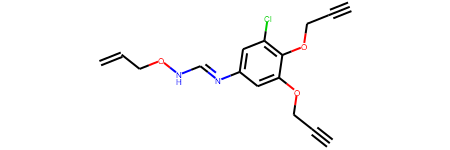

C#CCOc1cc(N=CNOCOC)cc(Cl)c1OCC#C
[0, 4, 10, 16, 20, 8, 18, 12, 6, 13, 15, 9, 14, 2, 7, 19, 3, 21, 17, 11, 5, 1]


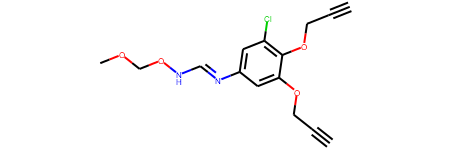

C#CCOc1cc(N=CNOCOC)cc(F)c1OCC#C
[0, 4, 10, 16, 20, 8, 18, 12, 6, 13, 15, 9, 14, 2, 7, 19, 3, 21, 17, 11, 5, 1]


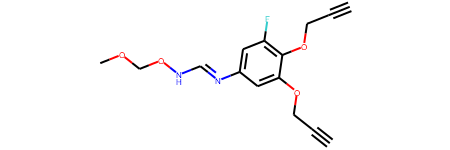

C#CCOc1cc(OC(=O)N(CC)CC)c(Cl)cc1Cl
[0, 6, 9, 12, 17, 8, 18, 13, 14, 3, 19, 10, 1, 10, 1, 16, 5, 7, 15, 4]


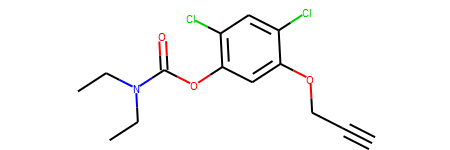

C#CCOc1cc(OC(=O)N2CCC(F)(F)C2)c(Cl)cc1Cl
[0, 6, 9, 13, 18, 8, 19, 14, 15, 1, 20, 10, 11, 21, 2, 2, 12, 17, 5, 7, 16, 4]


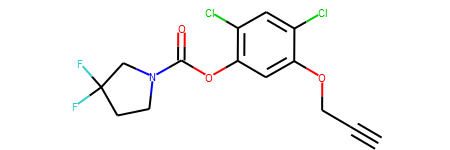

C#CCOc1cc(OC(=O)N2CCC(F)(F)CC2)c(Cl)cc1Cl
[0, 6, 9, 14, 19, 8, 20, 15, 16, 1, 21, 10, 12, 22, 2, 2, 12, 10, 18, 5, 7, 17, 4]


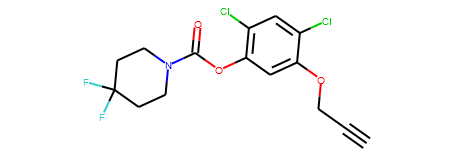

C#CCOc1cc(OC(=O)N2CCCC2)c(Cl)cc1Cl
[0, 4, 9, 12, 17, 6, 18, 13, 14, 1, 19, 10, 7, 7, 10, 16, 3, 5, 15, 2]


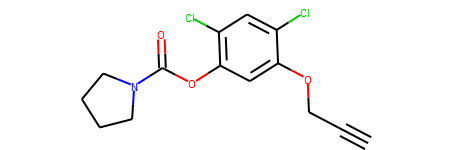

C#CCOc1cc(OC(=O)N2CCCCC2)c(Cl)cc1Cl
[0, 4, 10, 13, 18, 6, 19, 14, 15, 1, 20, 11, 8, 7, 8, 11, 17, 3, 5, 16, 2]


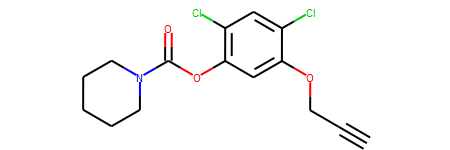

C#CCOc1ccc(C2C3=C(CC(C)(C)CC3=O)OC3=C2C(=O)CC(C)(C)C3)cc1OCC
[0, 8, 13, 20, 29, 11, 9, 27, 30, 25, 23, 16, 31, 2, 2, 14, 21, 6, 18, 23, 25, 21, 6, 14, 31, 2, 2, 16, 10, 28, 19, 12, 1]


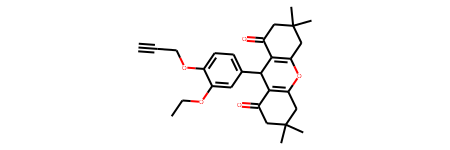

C#CCOc1ccc(N=CNOC)cc1OCC#C
[0, 3, 9, 14, 17, 7, 6, 16, 11, 5, 12, 13, 2, 8, 18, 15, 10, 4, 1]


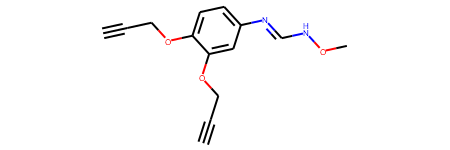

C#CCOc1ccc(N=CNOCC)cc1OCC#C
[0, 3, 10, 15, 18, 7, 6, 17, 12, 5, 13, 14, 9, 2, 8, 19, 16, 11, 4, 1]


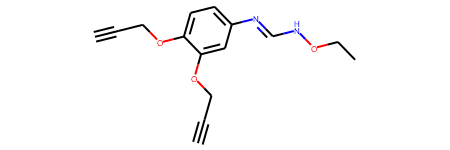

C#CCOc1ccccc1OCC(O)CNC(C)(C)C
[0, 5, 10, 14, 16, 8, 6, 7, 9, 17, 15, 12, 18, 4, 11, 13, 19, 1, 1, 1]


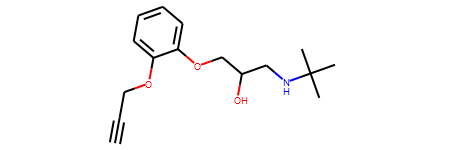

C#CCOn1c(=O)[nH]c(C)c(Br)c1=O
[0, 5, 6, 8, 13, 11, 2, 7, 9, 1, 10, 4, 12, 3]


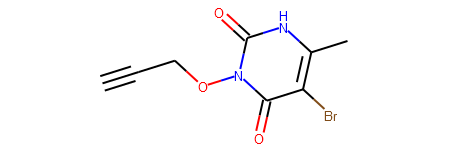

C#CCn1cc(O)n(COC(=O)C2C(C=C(C)C)C2(C)C)c1=O
[0, 8, 11, 20, 10, 16, 7, 21, 12, 13, 14, 5, 19, 18, 9, 15, 1, 1, 22, 3, 3, 17, 6]


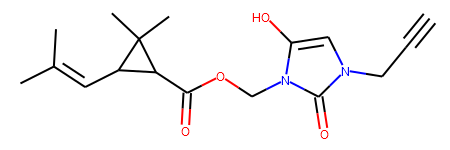

C#CCn1cncc1[N+](=O)[O-]
[0, 3, 6, 9, 5, 7, 4, 8, 10, 1, 2]


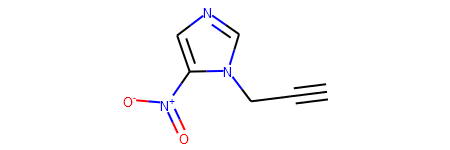

C#CCn1nnc(Oc2ccc(NC(=O)N(C)C)cc2)n1
[0, 4, 9, 20, 11, 10, 18, 14, 17, 7, 5, 16, 13, 15, 3, 19, 1, 1, 5, 7, 12]


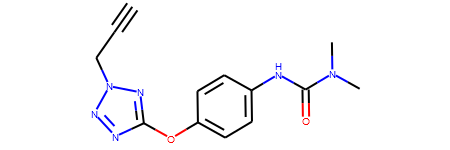

C#CCn1nnnc1Oc1ccc(NC(=O)N(C)C)cc1
[0, 4, 9, 20, 12, 10, 11, 18, 14, 17, 7, 5, 16, 13, 15, 3, 19, 1, 1, 5, 7]


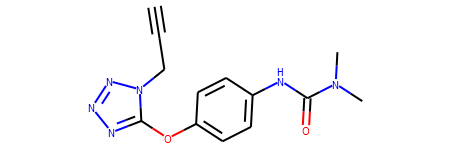

C#Cc1cccc(NC(=O)c2cc(C(=O)Nc3cccc(C#C)c3)cc(N3C(=O)c4ccccc4C3=O)c2)c1
[0, 6, 29, 12, 8, 14, 31, 23, 25, 2, 33, 18, 33, 25, 2, 23, 31, 14, 8, 12, 29, 6, 0, 16, 19, 35, 38, 27, 4, 36, 21, 10, 10, 21, 36, 27, 4, 19, 16]


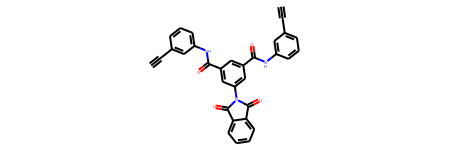

C#Cc1ccccc1
[0, 1, 7, 5, 3, 2, 3, 5]


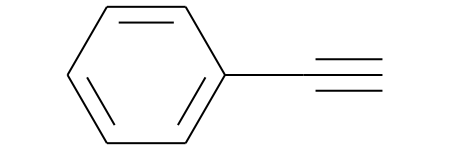

C(#Cc1cscn1)c1ccccc1
[0, 1, 12, 8, 10, 5, 9, 11, 6, 3, 2, 3, 6]


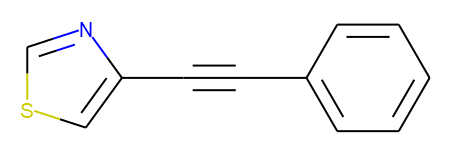

C(#Cc1nccs1)c1ccccc1
[0, 1, 12, 9, 5, 6, 10, 11, 7, 3, 2, 3, 7]


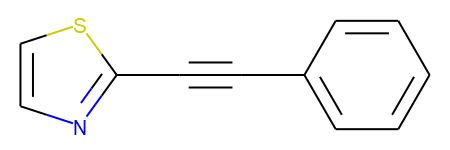

C(=C/c1ccccc1)\CN1CCN(C(c2ccccc2)c2ccccc2)CC1
[0, 1, 22, 11, 5, 2, 5, 11, 17, 26, 18, 20, 27, 25, 23, 13, 7, 3, 7, 13, 23, 13, 7, 3, 7, 13, 20, 18]


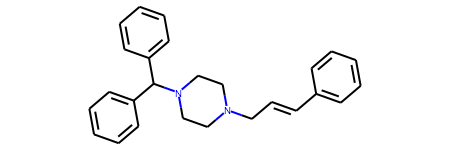

C(=Cc1ccccc1)CN1CCN(C(c2ccccc2)c2ccccc2)CC1
[0, 1, 22, 11, 5, 2, 5, 11, 17, 26, 18, 20, 27, 25, 23, 13, 7, 3, 7, 13, 23, 13, 7, 3, 7, 13, 20, 18]


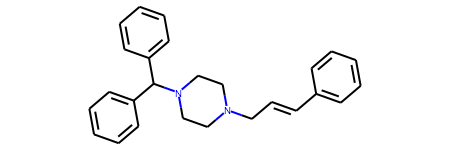

C(=N/c1ccccc1)\c1ccccc1
[0, 11, 13, 9, 5, 2, 5, 9, 12, 7, 3, 1, 3, 7]


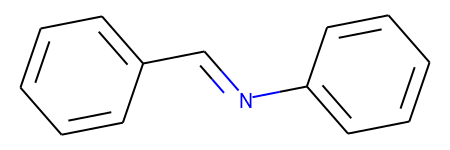

C(=N/n1cnnc1)\c1ccc(-n2nc(-c3ccccc3)cc2-c2ccccc2)cc1
[0, 18, 28, 16, 19, 19, 16, 22, 7, 13, 25, 29, 21, 26, 23, 9, 3, 1, 3, 9, 15, 27, 24, 11, 5, 2, 5, 11, 13, 7]


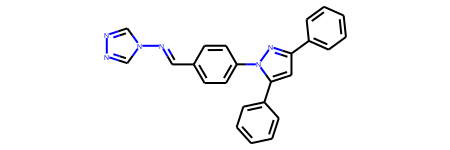

C(=NN1CCCCC1)c1ccccc1
[0, 11, 13, 9, 7, 6, 7, 9, 12, 4, 2, 1, 2, 4]


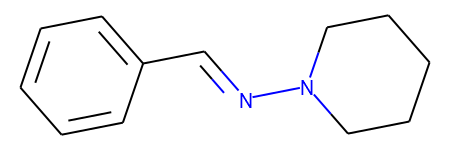

C(=Nc1ccccc1)c1ccccc1
[0, 11, 13, 9, 5, 2, 5, 9, 12, 7, 3, 1, 3, 7]


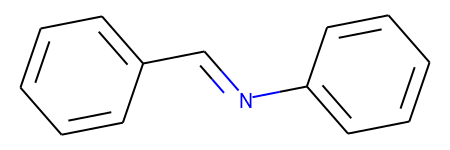

C/C(=C\c1ccccc1)C(=O)O
[0, 10, 3, 11, 7, 5, 4, 5, 7, 9, 1, 2]


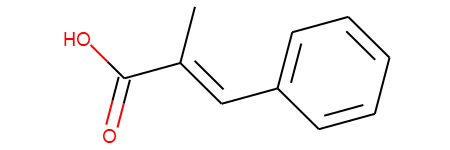

C/C(=C\c1ccccc1)[N+](=O)[O-]
[0, 9, 3, 10, 7, 5, 4, 5, 7, 11, 1, 2]


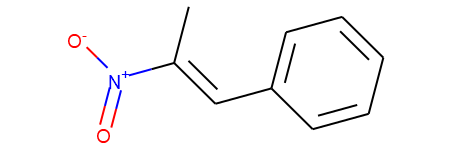

C/C(=C\c1ccco1)[C@@H]1c2c(-c3ccccc3)n[nH]c2OC(=N)C1C#N
[0, 18, 4, 20, 12, 8, 9, 16, 25, 23, 21, 19, 10, 6, 5, 6, 10, 13, 14, 22, 15, 17, 2, 24, 3, 1]


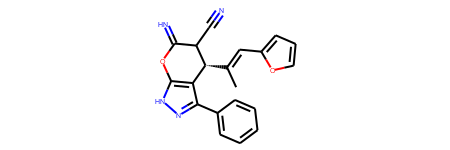

C/C=C/CC(C)C(O)C1C(=O)NC(CC)C(=O)N(C)CC(=O)N(C)C(CC(C)C)C(=O)NC(C(C)C)C(=O)N(C)C(CC(C)C)C(=O)NC(C)C(=O)NC(C)C(=O)N(C)C(CC(C)C)C(=O)N(C)C(CC(C)C)C(=O)N(C)C(C(C)C)C(=O)N1C
[0, 36, 37, 39, 69, 16, 71, 35, 77, 52, 27, 47, 66, 38, 1, 53, 28, 78, 17, 44, 54, 29, 79, 18, 72, 40, 60, 2, 2, 50, 25, 48, 70, 67, 12, 12, 56, 31, 81, 20, 74, 42, 62, 6, 6, 51, 26, 45, 64, 10, 49, 24, 46, 65, 11, 55, 30, 80, 19, 73, 41, 61, 4, 4, 57, 32, 82, 21, 75, 43, 63, 8, 8, 58, 33, 83, 22, 76, 68, 14, 14, 59, 34, 84, 23]


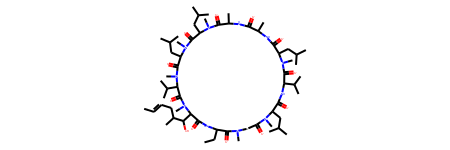

C/C=C/c1ccccc1
[0, 1, 2, 8, 6, 4, 3, 4, 6]


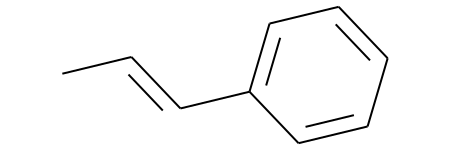

C/N=C/c1ccccc1
[0, 7, 1, 8, 5, 3, 2, 3, 5]


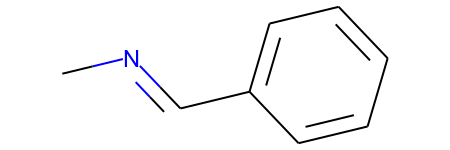

C1=C(c2ccccc2)CCCC1
[0, 10, 11, 4, 2, 1, 2, 4, 9, 8, 7, 6]


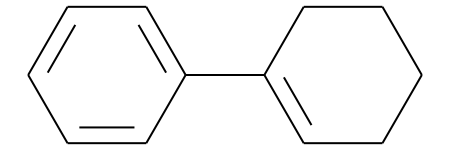

C1=C(c2ccccc2)CCNC1
[0, 10, 11, 4, 2, 1, 2, 4, 8, 7, 9, 6]


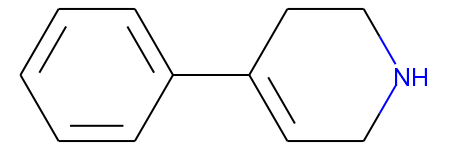

C1=COCCC1
[0, 1, 5, 4, 3, 2]


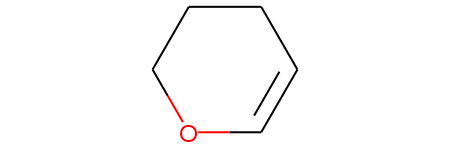

C1=Cc2ccc3c4c(ccc(c24)C1)-c1ccccc1-3
[0, 1, 13, 6, 8, 15, 18, 16, 9, 7, 14, 17, 10, 12, 5, 3, 2, 4, 11]


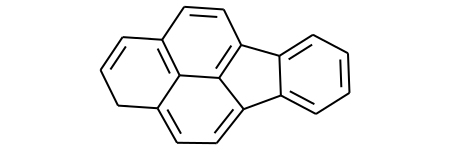

C1=Cc2cccc3cccc1c23
[0, 0, 8, 4, 2, 6, 10, 6, 2, 4, 8, 11]


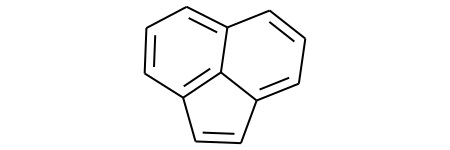

C1=Cc2ccccc2C1
[0, 1, 7, 4, 2, 3, 5, 8, 6]


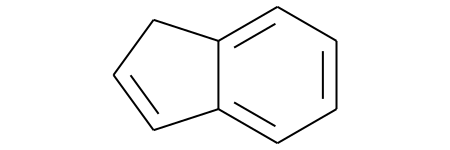

C1=c2ccc3cccc4ccc(c2c43)CC1
[0, 11, 3, 7, 13, 5, 1, 4, 12, 6, 2, 10, 14, 15, 9, 8]


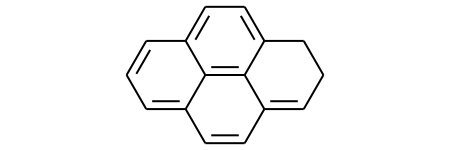

C1CC2=NOS3=C2C(=NO3)C1
[0, 1, 7, 3, 5, 10, 9, 7, 3, 5, 1]


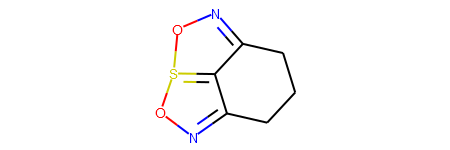

C1CC2CC1C1OC21
[0, 0, 4, 2, 4, 6, 3, 6]


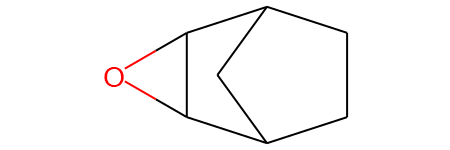

C1CC2OC2CC1C1CO1
[0, 2, 8, 5, 9, 3, 6, 7, 1, 4]


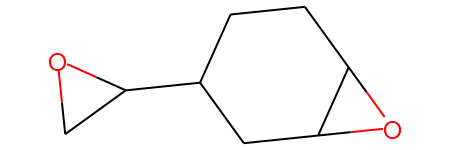

C1CCC(C2CO2)CC1
[0, 1, 3, 7, 8, 5, 6, 3, 1]


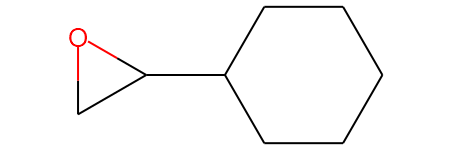

C1CCC2=NCCCN2CC1
[0, 1, 5, 9, 8, 4, 3, 7, 10, 6, 2]


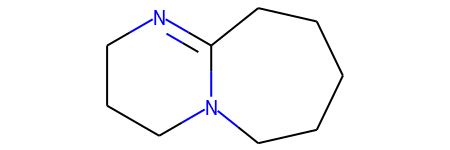

C1CCC2OC2CC1
[0, 1, 3, 6, 5, 6, 3, 1]


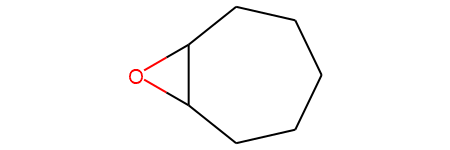

C1CCNCC1
[0, 1, 3, 5, 3, 1]


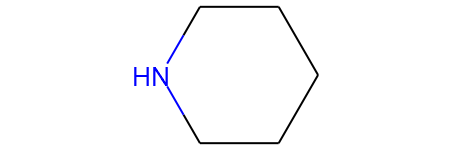

C1CCOCC1
[0, 1, 3, 5, 3, 1]


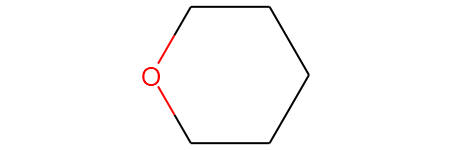

C1CCc2nnnn2CC1
[0, 1, 3, 8, 6, 5, 7, 9, 4, 2]


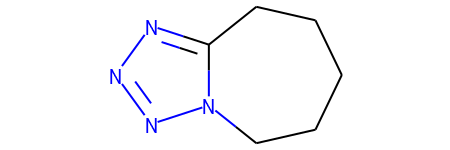

C1CN2CCC1CC2
[0, 3, 7, 3, 0, 6, 0, 3]


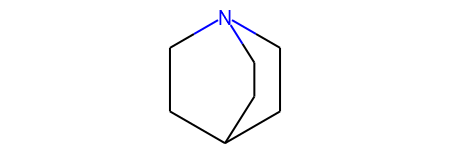

C1COCCN1
[0, 2, 5, 2, 0, 4]


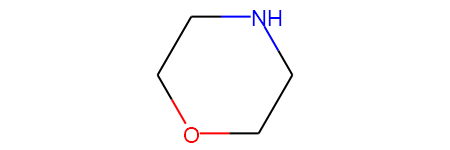

C1SCC2=NOS3=C2C1=NO3
[0, 6, 0, 7, 2, 4, 10, 9, 7, 2, 4]


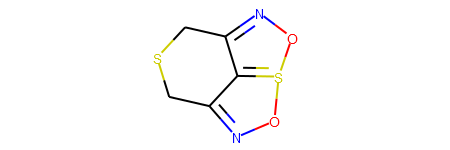

C=C(Br)CC1(C(C)C)C(=O)NC(=O)N(C)C1=O
[0, 10, 7, 8, 16, 14, 1, 1, 12, 5, 9, 11, 4, 15, 3, 13, 6]


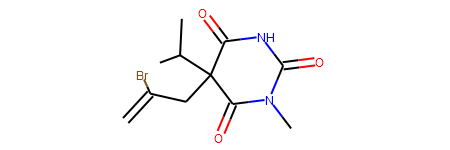

C=C(Br)CC1(C(C)C)C(=O)NC(=O)NC1=O
[0, 10, 6, 7, 15, 14, 1, 1, 12, 4, 8, 11, 3, 8, 12, 4]


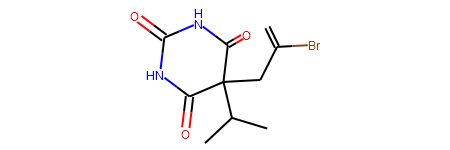

C=C(Br)CC1(C(C)CC)C(=O)NC(=O)N(C)C1=O
[0, 11, 7, 9, 17, 15, 2, 8, 1, 13, 5, 10, 12, 4, 16, 3, 14, 6]


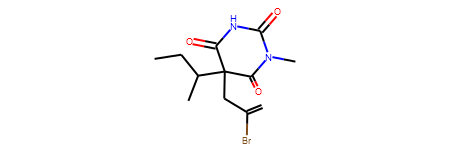

C=C(Br)CC1(C(C)CC)C(=O)NC(=O)NC1=O
[0, 11, 6, 8, 16, 15, 2, 7, 1, 13, 4, 9, 12, 3, 9, 13, 4]


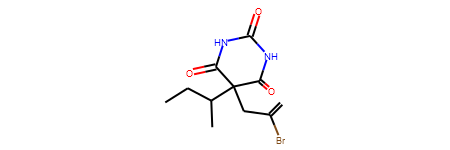

C=C(Br)CC1(C(C)CCC)C(=O)NC(=O)NC1=O
[0, 12, 6, 9, 17, 16, 2, 8, 7, 1, 14, 4, 10, 13, 3, 10, 14, 4]


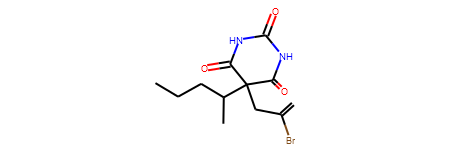

C=C(C)C#N
[0, 4, 1, 3, 2]


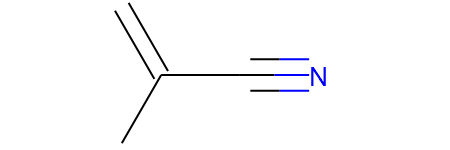

C=C(C)C(=O)O
[0, 4, 1, 5, 2, 3]


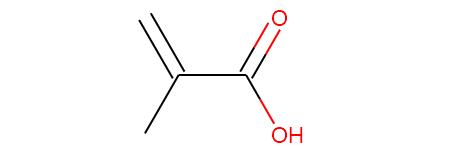

C=C(C)C(=O)OC
[0, 5, 2, 6, 3, 4, 1]


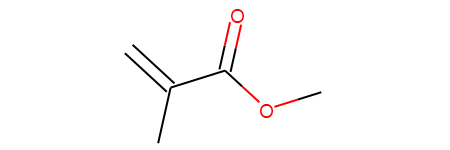

C=C(C)C(=O)OC(C)(C)C
[0, 7, 1, 8, 5, 6, 9, 2, 2, 2]


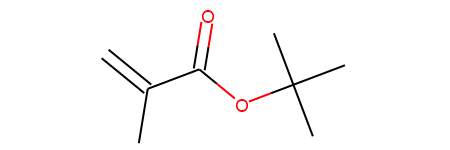

C=C(C)C(=O)OC(C)C
[0, 6, 1, 7, 4, 5, 8, 2, 2]


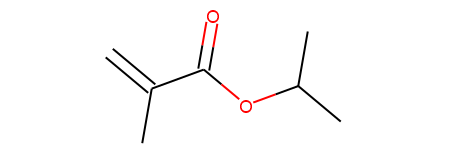

C=C(C)C(=O)OC1CCCCC1
[0, 9, 1, 10, 2, 8, 11, 6, 4, 3, 4, 6]


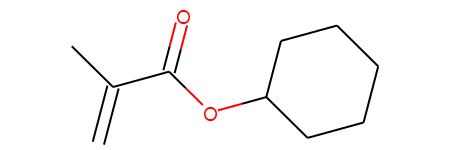

C=C(C)C(=O)OC1Cc2cc(oc2O)CC2(C)OC2C2OC(=O)C(=C)C12
[0, 14, 2, 16, 4, 10, 21, 8, 19, 7, 18, 13, 20, 6, 9, 25, 3, 12, 24, 22, 11, 17, 5, 15, 1, 23]


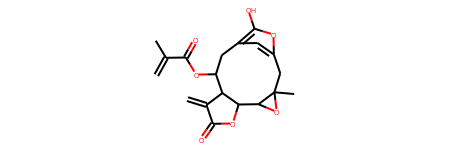

C=C(C)C(=O)OCC
[0, 6, 2, 7, 3, 5, 4, 1]


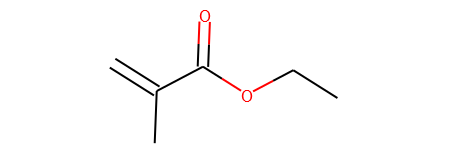

C=C(C)C(=O)OCC(C)(O)COc1cccc2ccccc12
[0, 16, 1, 17, 3, 14, 12, 21, 2, 4, 13, 15, 18, 8, 6, 10, 19, 9, 5, 7, 11, 20]


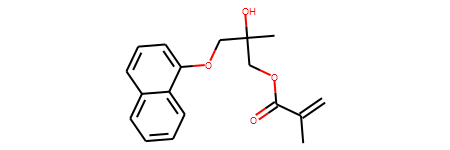

C=C(C)C(=O)OCC(C)C
[0, 7, 1, 8, 4, 6, 5, 9, 2, 2]


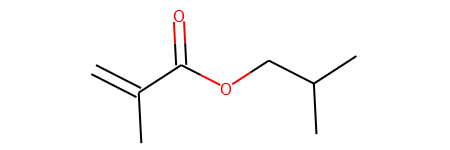

C=C(C)C(=O)OCC(C)O
[0, 7, 1, 8, 3, 6, 5, 9, 2, 4]


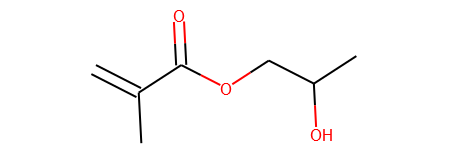

C=C(C)C(=O)OCC(CC)(COC(=O)C(=C)C)COC(=O)C(=C)C
[0, 17, 4, 20, 7, 14, 11, 23, 10, 3, 11, 14, 20, 7, 17, 0, 4, 11, 14, 20, 7, 17, 0, 4]


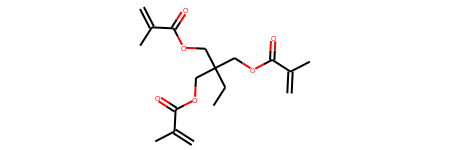

C=C(C)C(=O)OCC(CC)CCCC
[0, 11, 3, 12, 4, 10, 9, 13, 7, 2, 8, 6, 5, 1]


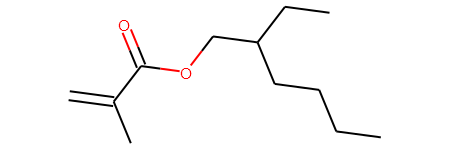

C=C(C)C(=O)OCC(F)(F)F
[0, 8, 1, 9, 2, 7, 6, 10, 3, 3, 3]


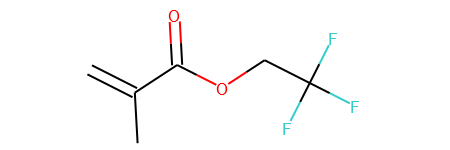

C=C(C)C(=O)OCC(O)COc1ccccc1
[0, 13, 1, 14, 2, 11, 9, 16, 3, 10, 12, 15, 7, 5, 4, 5, 7]


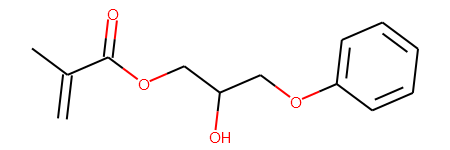

C=C(C)C(=O)OCCCC
[0, 8, 2, 9, 3, 7, 6, 5, 4, 1]


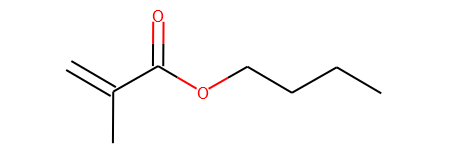

C=C(C)C(=O)OCCO
[0, 7, 1, 8, 2, 6, 5, 4, 3]


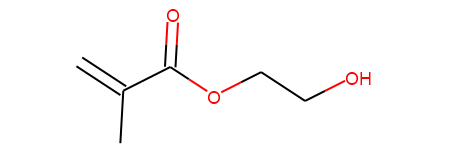

C=C(C)C(=O)OCc1ccccc1
[0, 10, 1, 11, 2, 9, 8, 12, 6, 4, 3, 4, 6]


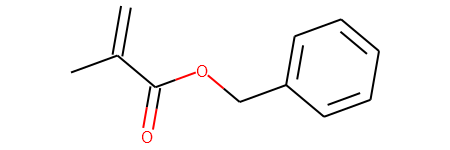

C=C(C)C(N)=O
[0, 4, 1, 5, 2, 3]


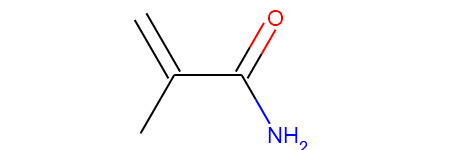

C=C(C)C1C=CC(C)C(=O)C1
[0, 7, 1, 10, 5, 4, 9, 2, 8, 3, 6]


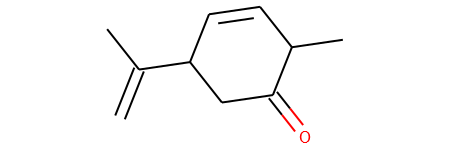

C=C(C)C1CC=C(C)C(O)C1
[0, 7, 1, 10, 5, 4, 8, 2, 9, 3, 6]


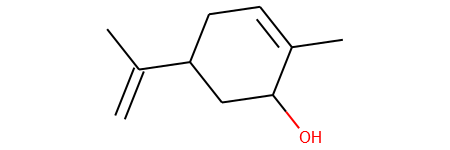

C=C(C)C1CC=C(C)CC1
[0, 7, 1, 9, 5, 3, 8, 2, 4, 6]


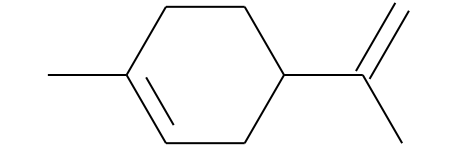

C=C(C)C1CC=C(C=O)CC1
[0, 8, 1, 10, 6, 4, 9, 3, 2, 5, 7]


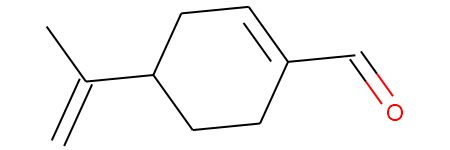

C=C(C)C1CC=C(CO)CC1
[0, 8, 1, 10, 6, 3, 9, 4, 2, 5, 7]


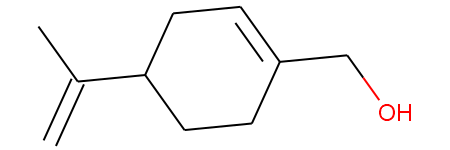

C=C(C)C1CCC(C)(O)C1C
[0, 7, 1, 8, 5, 6, 10, 3, 4, 9, 2]


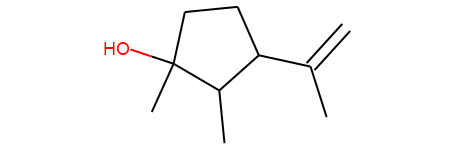

C=C(C)C1CCC(C)C(=O)C1
[0, 7, 1, 10, 5, 4, 9, 2, 8, 3, 6]


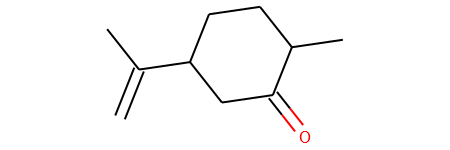

C=C(C)C1CCC(C)C(O)C1
[0, 7, 1, 8, 4, 5, 9, 2, 10, 3, 6]


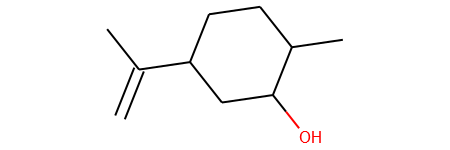

C=C(C)C1CCC2(C)OC2C1
[0, 7, 1, 8, 3, 5, 10, 2, 6, 9, 4]


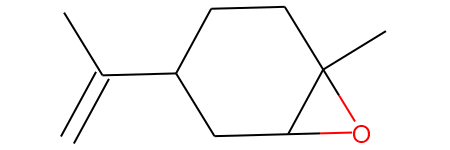

C=C(C)C1Cc2c(ccc3c2OC2COc4cc(OC)c(OC)cc4C2C3=O)O1
[0, 16, 3, 26, 9, 24, 21, 6, 7, 22, 25, 15, 27, 10, 13, 20, 5, 18, 11, 1, 19, 12, 2, 8, 23, 28, 17, 4, 14]


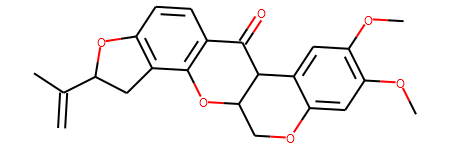

C=C(C)CC(C)(C)C
[0, 6, 1, 5, 7, 2, 2, 2]


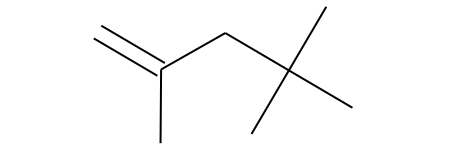

C=C(C)CC1(CC)C(=O)NC(=S)NC1=O
[0, 10, 2, 7, 14, 6, 1, 11, 3, 8, 13, 5, 8, 11, 3]


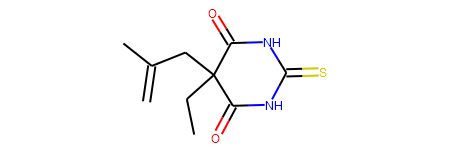

C=C(C)CN(CC)c1c([N+](=O)[O-])cc(C(F)(F)F)cc1[N+](=O)[O-]
[0, 14, 2, 13, 19, 12, 1, 18, 16, 20, 3, 5, 10, 15, 22, 7, 7, 7, 10, 16, 20, 3, 5]


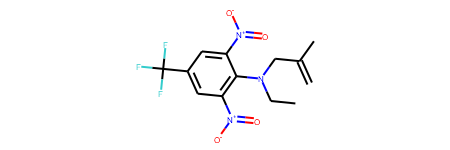

C=C(C)COC(=O)C1C(C=C(C)C)C1(C)C
[0, 10, 1, 8, 9, 11, 6, 14, 13, 7, 12, 2, 2, 15, 4, 4]


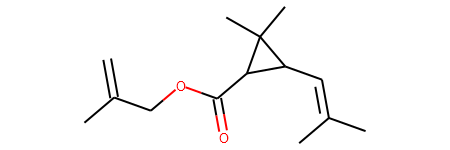

C=C(C)CSc1nnc(-c2cccc(S(=O)(=O)N3CCOCC3)c2)n1C1CCCC1
[0, 21, 1, 12, 20, 24, 17, 18, 25, 22, 5, 4, 6, 23, 29, 2, 2, 27, 15, 10, 19, 10, 15, 7, 28, 26, 13, 8, 8, 13]


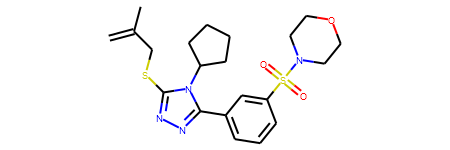

C=C(C)OCc1ccccc1
[0, 9, 1, 8, 7, 10, 5, 3, 2, 3, 5]


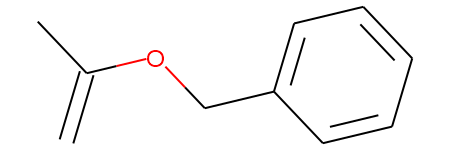

C=C(C)c1c(OC)cc(Cc2c[nH]c(=N)[nH]c2=N)cc1OC
[0, 14, 3, 18, 16, 12, 1, 6, 15, 9, 19, 8, 10, 20, 4, 11, 21, 5, 6, 16, 12, 1]


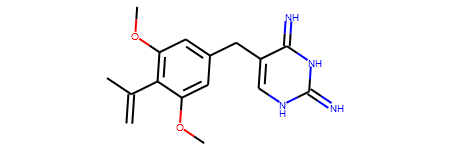

C=C(C)c1c(OC)cc(Cc2c[nH]c(=N)[nH]c2=N)cc1OCC
[0, 15, 3, 19, 17, 13, 2, 6, 16, 10, 20, 8, 11, 21, 4, 12, 22, 5, 7, 18, 14, 9, 1]


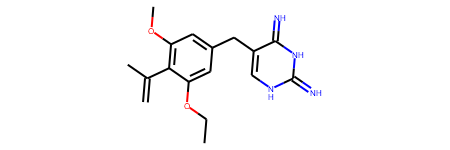

C=C(C)c1cc(O)c(C)cc1O
[0, 7, 1, 11, 6, 9, 3, 8, 2, 5, 10, 4]


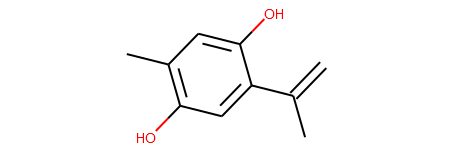

C=C(C)c1ccccc1
[0, 7, 1, 8, 5, 3, 2, 3, 5]


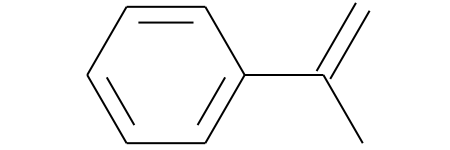

C=C(C=O)CC
[0, 5, 3, 2, 4, 1]


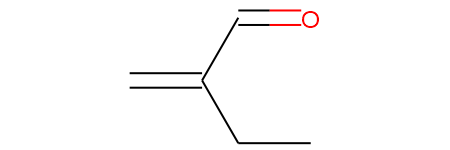

C=C(CC(Cl)(Cl)Cl)c1ccccc1
[0, 10, 9, 12, 1, 1, 1, 11, 7, 5, 4, 5, 7]


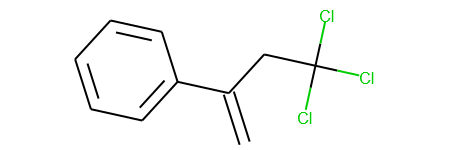

C=C(c1ccc(N(C)C)cc1)c1ccc(N(C)C)cc1
[0, 13, 14, 5, 9, 16, 18, 1, 1, 9, 5, 14, 5, 9, 16, 18, 1, 1, 9, 5]


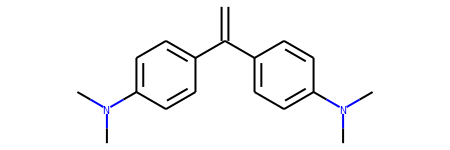

C=C/C=C/C
[0, 2, 4, 3, 1]


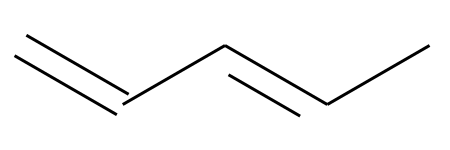

C=C1C(=O)OC2C1C(O)CC(C)C1CCC(=O)C12C
[0, 10, 11, 3, 9, 17, 15, 14, 5, 7, 13, 1, 16, 8, 6, 12, 4, 18, 2]


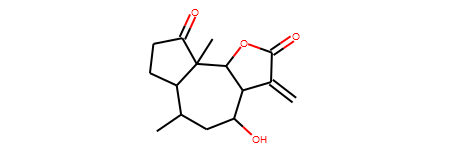

C=C1C(=O)OC2C1C(OC(=O)C(C)=CC)CC(=C)C1C(O)C3OC3(C)C21O
[0, 14, 16, 5, 12, 23, 21, 19, 11, 17, 6, 18, 3, 9, 2, 10, 15, 1, 24, 20, 7, 22, 13, 25, 4, 26, 8]


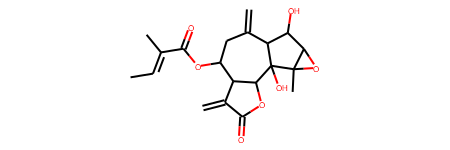

C=C1C(=O)OC2C1C(OC(=O)C(C)=CC)CC(O)(CCl)C1C(OC(C)=O)C=C(C)C21O
[0, 18, 20, 6, 17, 27, 26, 25, 16, 21, 7, 22, 3, 11, 1, 14, 29, 8, 13, 10, 28, 24, 15, 19, 2, 5, 12, 23, 4, 30, 9]


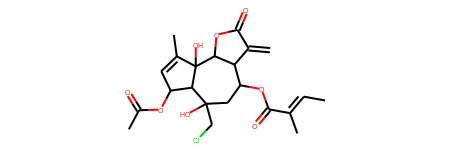

C=C1C(=O)OC2C1C(OC(=O)C(C)=CC)CC1(CO1)C1C(OC(C)=O)C=C(C)C21O
[0, 17, 19, 6, 15, 26, 25, 24, 14, 20, 7, 21, 3, 9, 1, 12, 28, 11, 16, 27, 23, 13, 18, 2, 5, 10, 22, 4, 29, 8]


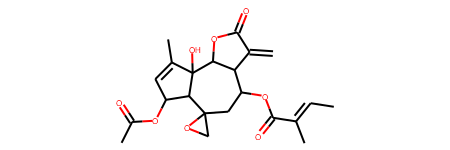

C=C1C(=O)OC2C1C(OC(=O)C=C(C)C)Cc1cc(oc1O)CC1(C)OC21
[0, 15, 17, 5, 12, 23, 24, 22, 11, 16, 4, 7, 18, 1, 1, 9, 20, 8, 19, 14, 21, 6, 10, 26, 3, 13, 25]


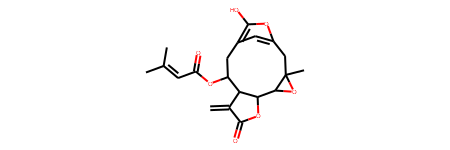

C=C1C(=O)OC2C1CCC(C)C1(O)C=CC(=O)C21C
[0, 11, 12, 3, 10, 16, 14, 8, 9, 15, 1, 17, 5, 7, 6, 13, 4, 18, 2]


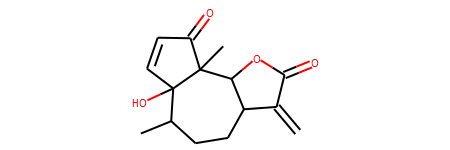

C=C1C(=O)OC2C1CCC(C)C1(O)CCC(=O)C21C
[0, 11, 12, 3, 10, 16, 14, 7, 8, 15, 1, 17, 5, 9, 6, 13, 4, 18, 2]


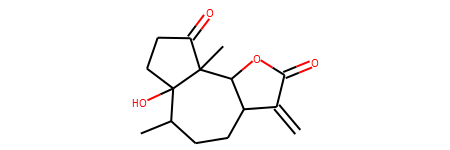

C=C1C(=O)OC2C1CCC(C)C1=CCC(=O)C12C
[0, 10, 11, 3, 9, 16, 15, 8, 7, 14, 1, 13, 5, 6, 12, 4, 17, 2]


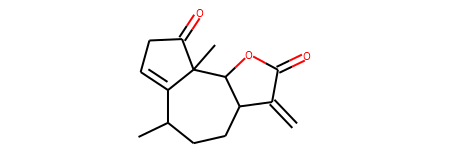

C=C1C(=O)OC2C=C(C)C(OC(C)=O)CC(O)C(C)=CC(OC(=O)C(C)=CC)C12
[0, 17, 19, 7, 15, 26, 12, 23, 5, 25, 14, 18, 2, 6, 13, 24, 9, 22, 4, 11, 27, 16, 20, 8, 21, 3, 10, 1, 28]


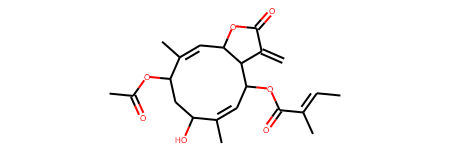

C=C1C(=O)OC2C=C(C)C3(O)C=CC(C)(CC(OC(=O)C(=CC)COC(C)=O)C12)O3
[0, 19, 21, 6, 16, 25, 12, 24, 3, 29, 8, 10, 9, 28, 4, 14, 26, 17, 22, 7, 23, 11, 1, 13, 15, 20, 2, 5, 27, 18]


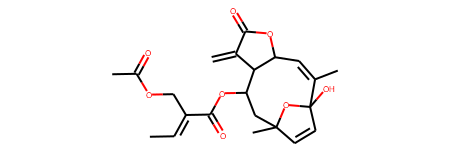

C=C1C(=O)OC2CC(C)C3=CCC(=O)C3(C)C(O)C12
[0, 10, 11, 3, 9, 15, 8, 14, 1, 13, 6, 7, 12, 4, 18, 2, 17, 5, 16]


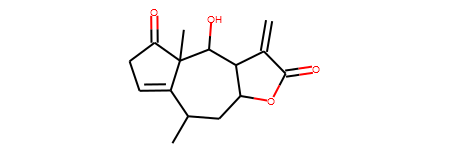

C=C1C(=O)OC2CC(C)C3=CCC(=O)C3(C)CC12
[0, 10, 11, 3, 9, 15, 7, 14, 1, 13, 5, 6, 12, 4, 17, 2, 8, 16]


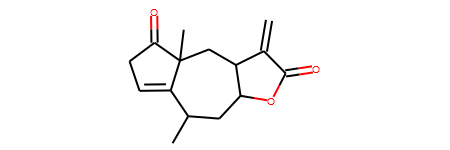

C=C1C(=O)OC2CC(C)C3CC(=O)C(CC12)C1(C3)C(=O)OC2CC(C)=C3CCC(=O)C3C(C)(O)C21
[0, 18, 19, 4, 16, 27, 12, 25, 2, 26, 11, 21, 6, 31, 14, 29, 34, 15, 22, 7, 17, 28, 13, 23, 1, 24, 10, 9, 20, 5, 30, 33, 3, 8, 32]


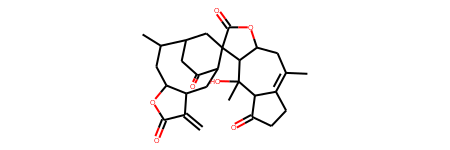

C=C1C(=O)OC2CC3(C)CCCC(=C)C3CC12
[0, 10, 12, 3, 9, 13, 8, 16, 2, 7, 4, 5, 11, 1, 15, 6, 14]


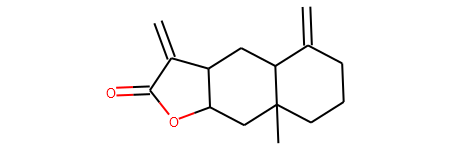

C=C1C(=O)OC2CC3(C)CCCC(C)C3=CC12
[0, 10, 11, 3, 9, 14, 8, 16, 2, 7, 5, 6, 13, 1, 12, 4, 15]


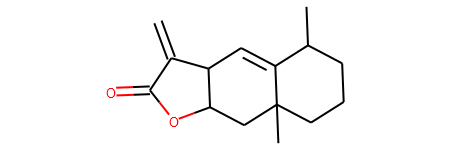

C=C1C(=O)OC2Cc3cc(oc3O)CC3(C)OC3C(O)C12
[0, 11, 12, 2, 8, 16, 6, 14, 5, 13, 10, 15, 3, 7, 20, 1, 9, 19, 17, 4, 18]


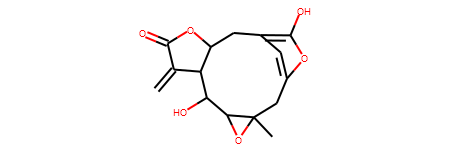

C=C1C(C)C2C(Cc3ccccc3)NC(=O)C23OC(=O)CCC(=O)CCCC(C)CC=CC3C1O
[0, 23, 30, 2, 33, 29, 20, 27, 12, 10, 9, 10, 12, 21, 26, 5, 34, 22, 25, 4, 17, 16, 24, 3, 15, 14, 19, 28, 1, 18, 7, 8, 32, 31, 6]


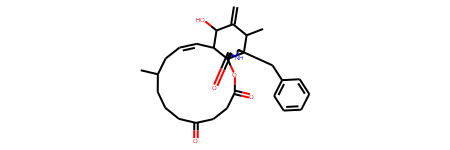

C=C1C2CCC(C2)C1(C)C
[0, 6, 7, 3, 4, 8, 5, 9, 1, 1]


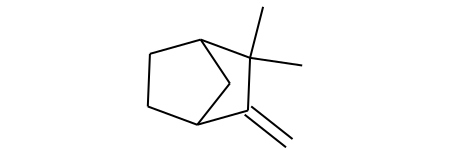

C=C1CC23CC1(O)CCC2C12C=CC(O)C(C)(C(=O)O1)C2C3C(=O)O
[0, 14, 11, 22, 12, 21, 6, 10, 9, 18, 23, 8, 7, 19, 5, 24, 1, 16, 3, 13, 20, 17, 15, 2, 4]


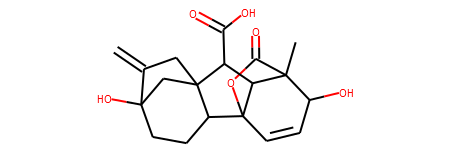

C=C1CCC2C(C1)c1c(OC)cc(CCC)cc1OC2(C)C
[0, 14, 8, 11, 20, 19, 10, 18, 16, 12, 2, 5, 15, 9, 7, 1, 6, 17, 13, 21, 3, 3]


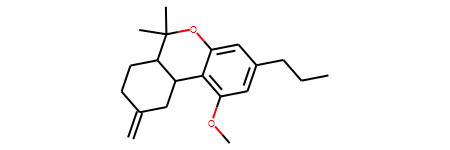

C=C1CCC2C(C1)c1c(OC)cc(CCCCC)cc1OC2(C)C
[0, 16, 10, 13, 22, 21, 12, 20, 18, 14, 2, 5, 17, 11, 9, 8, 7, 1, 6, 19, 15, 23, 3, 3]


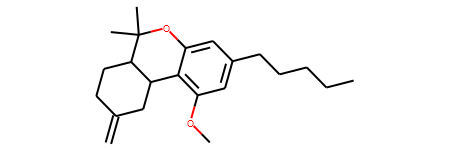

C=C1CCC2CC1C2(C)C
[0, 6, 3, 4, 7, 5, 8, 9, 1, 1]


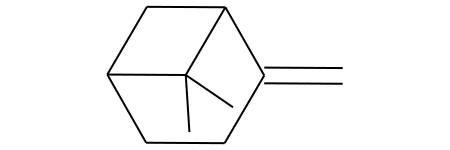

C=C1c2ccccc2C2(NC)CCCCC12
[0, 11, 12, 4, 2, 3, 5, 13, 15, 10, 1, 9, 7, 6, 8, 14]


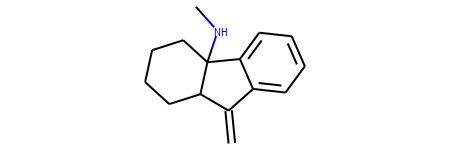

C=CC#Cc1ccc(-c2cccs2)s1
[0, 3, 1, 2, 11, 6, 8, 13, 12, 7, 4, 5, 9, 10]


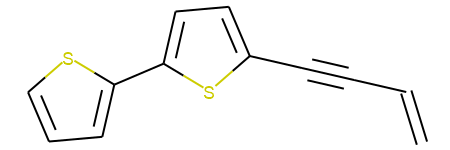

C=CC(=C)C
[0, 3, 4, 1, 2]


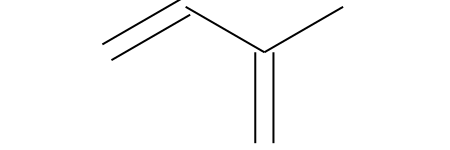

C=CC(=C)CCC=C(C)C
[0, 4, 8, 1, 7, 6, 5, 9, 2, 2]


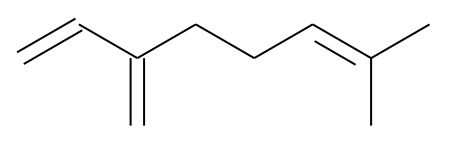

C=CC(=O)NCCCN(C)C
[0, 4, 9, 3, 8, 6, 5, 7, 10, 1, 1]


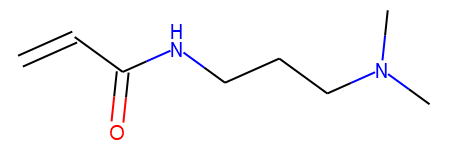

C=CC(=O)NCCCN(CC)CC
[0, 4, 11, 3, 10, 6, 5, 9, 12, 7, 1, 7, 1]


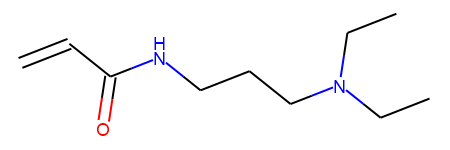

C=CC(=O)NCCCN(CCO)CCO
[0, 4, 13, 1, 12, 8, 7, 11, 14, 9, 5, 2, 9, 5, 2]


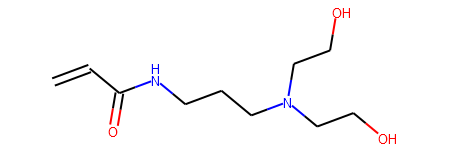

C=CC(=O)NCCCN1CCOCC1
[0, 2, 12, 1, 10, 4, 3, 7, 13, 8, 5, 11, 5, 8]


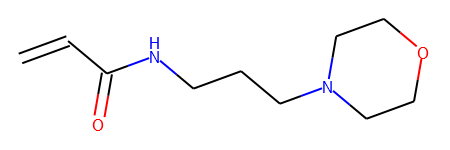

C=CC(=O)NCCCN1CCSCC1
[0, 2, 12, 1, 10, 4, 3, 7, 13, 8, 5, 11, 5, 8]


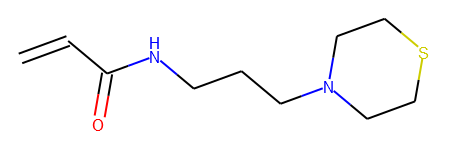

C=CC(=O)NCCN(C)C
[0, 4, 8, 3, 7, 5, 6, 9, 1, 1]


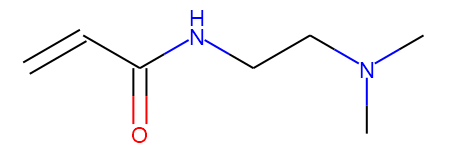

C=CC(=O)NCCN1CCOCC1
[0, 2, 11, 1, 9, 3, 6, 12, 7, 4, 10, 4, 7]


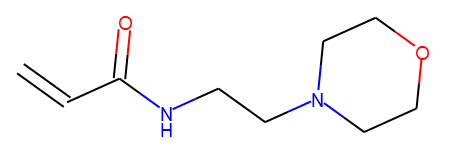

C=CC(=O)O
[0, 3, 4, 1, 2]


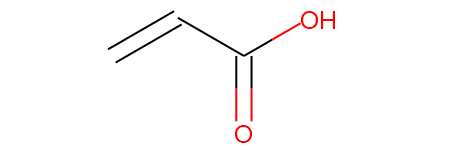

C=CC(=O)OC
[0, 3, 5, 2, 4, 1]


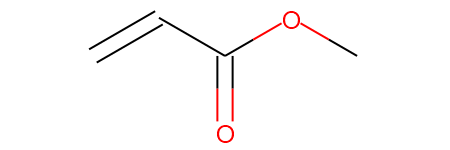

C=CC(=O)OCC
[0, 3, 6, 2, 5, 4, 1]


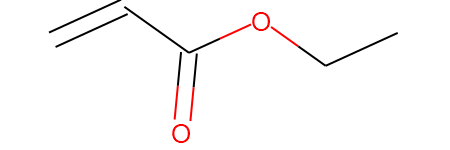

C=CC(=O)OCC(C)C
[0, 4, 7, 3, 6, 5, 8, 1, 1]


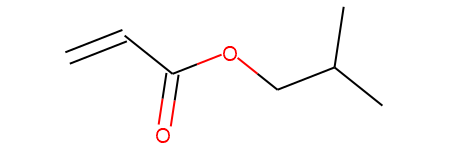

C=CC(=O)OCC(C)O
[0, 4, 7, 2, 6, 5, 8, 1, 3]


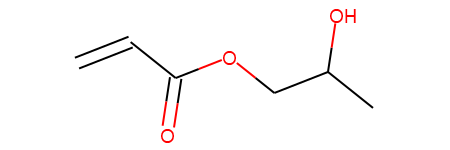

C=CC(=O)OCCCC
[0, 3, 8, 2, 7, 6, 5, 4, 1]


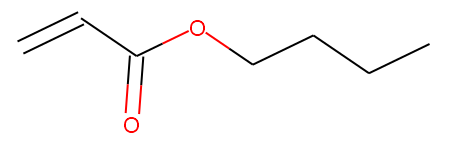

C=CC(=O)OCCO
[0, 3, 7, 1, 6, 5, 4, 2]


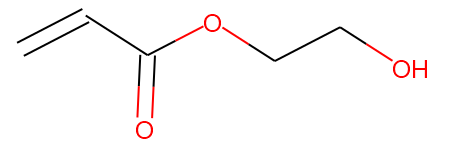

C=CC(=O)OCCOC
[0, 3, 8, 2, 7, 5, 4, 6, 1]


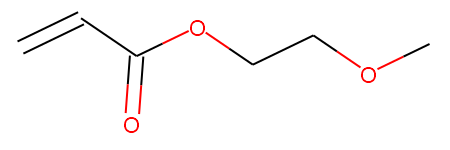

C=CC(=O)c1ccccc1
[0, 2, 8, 1, 9, 6, 4, 3, 4, 6]


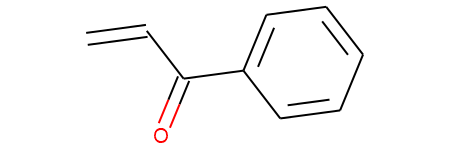

C=CC(C)(CCC=C(C)C)OC(C)=O
[0, 6, 13, 4, 9, 8, 7, 12, 2, 2, 10, 11, 1, 5]


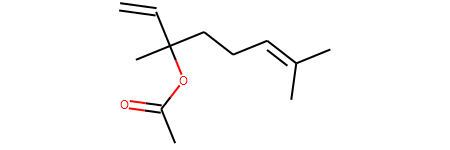

C=CC(C)(O)CCC=C(C)C
[0, 5, 10, 3, 4, 8, 7, 6, 9, 1, 1]


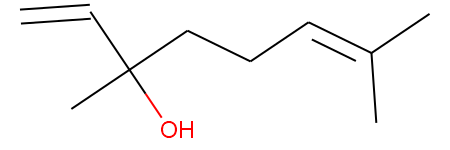

C=CC(CC)OC(=O)Nc1ccc(OCC)c(OCC)c1
[0, 5, 20, 11, 3, 15, 16, 4, 12, 17, 6, 7, 18, 13, 9, 1, 19, 14, 10, 2, 8]


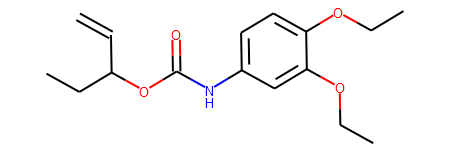

C=CC(CC)OC(N)=O
[0, 4, 8, 5, 1, 6, 7, 2, 3]


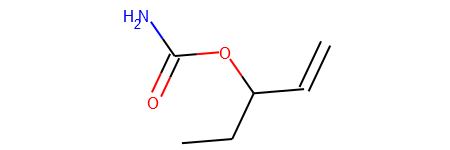

C=CC(N)=O
[0, 3, 4, 1, 2]


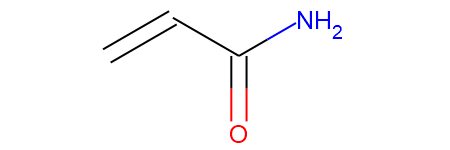

C=CC(N)CCC(=O)O
[0, 4, 8, 1, 6, 5, 7, 2, 3]


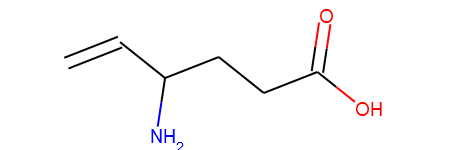

C=CC(OC(C)=O)OC(C)=O
[0, 5, 10, 6, 8, 1, 3, 6, 8, 1, 3]


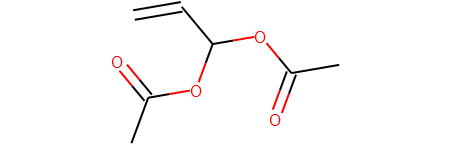

C=CC1(C)CCC(C(C)(C)O)O1
[0, 5, 10, 1, 7, 6, 9, 11, 2, 2, 4, 8]


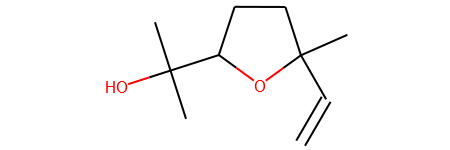

C=CC1(C)OC(=O)N(c2cc(Cl)cc(Cl)c2)C1=O
[0, 6, 17, 1, 10, 11, 2, 16, 15, 8, 13, 4, 7, 13, 4, 8, 12, 3]


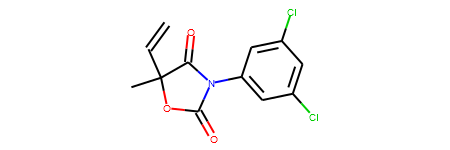

C=CC12COC(=O)C(=C)C1C1OC(=O)C(=C)C1C(O)C2
[0, 6, 19, 7, 9, 14, 4, 12, 2, 18, 16, 10, 13, 3, 11, 1, 17, 15, 5, 8]


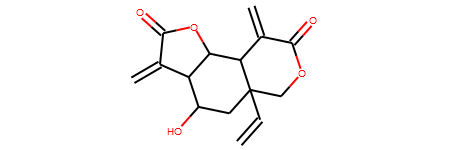

C=CC12COC(=O)C(=C)C1C1OC(=O)C(=C)C1C(OC(=O)C(=C)C)C2
[0, 8, 24, 9, 11, 19, 7, 16, 3, 23, 21, 13, 18, 6, 15, 2, 22, 20, 12, 17, 5, 14, 1, 4, 10]


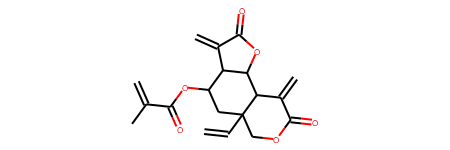

C=CC1CC=CCC1
[0, 1, 7, 5, 3, 2, 4, 6]


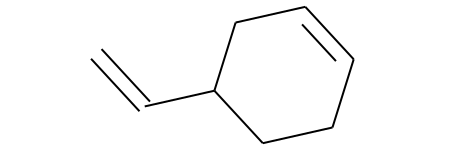

C=CC1CCC2OC2C1
[0, 1, 6, 2, 3, 7, 5, 8, 4]


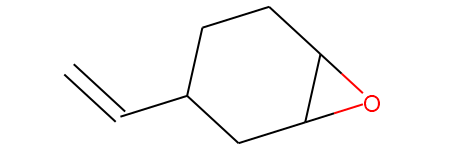

C=CC1CN2CCC1CC2C(O)c1ccnc2ccc(OC)cc12
[0, 3, 19, 12, 23, 11, 9, 20, 10, 22, 21, 2, 16, 6, 4, 13, 17, 7, 5, 15, 14, 1, 8, 18]


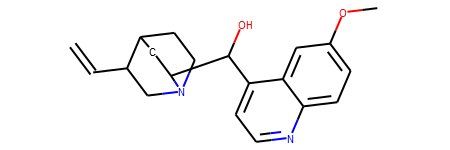

C=CC1CN2CCC1CC2C(O)c1ccnc2ccccc12
[0, 2, 17, 12, 21, 11, 9, 18, 10, 20, 19, 1, 14, 6, 5, 13, 15, 7, 3, 4, 8, 16]


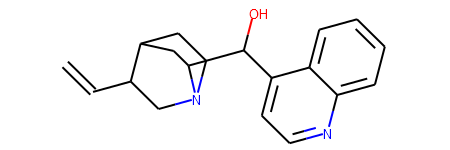

C=CC=CC
[0, 2, 4, 3, 1]


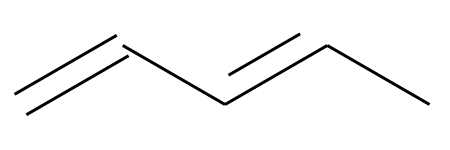

C=CC=CCC
[0, 2, 3, 4, 5, 1]


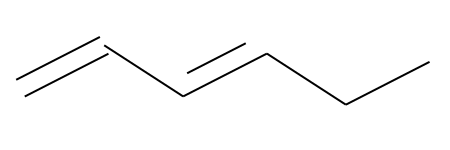

C=CC=CCC1=C(C)C(OC(=O)C2=C(CC(C)C(=O)OC)C2(C)C)CC1=O
[0, 9, 10, 11, 12, 20, 21, 2, 25, 16, 18, 7, 23, 22, 13, 24, 3, 19, 8, 15, 1, 26, 4, 4, 14, 17, 6]


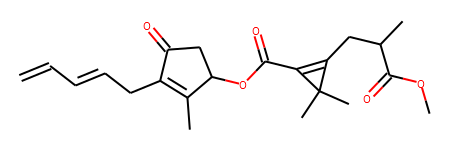

C=CC=CCC1=C(C)C(OC(=O)C2C(C=C(C)C)C2(C)C)CC1=O
[0, 8, 9, 10, 12, 18, 19, 3, 20, 14, 16, 7, 22, 21, 11, 17, 1, 1, 23, 4, 4, 13, 15, 6]


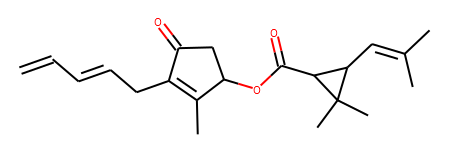

C=CCC#N
[0, 3, 4, 2, 1]


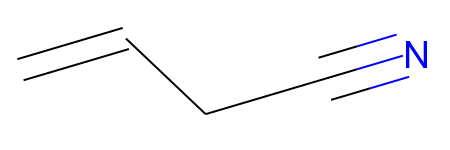

C=CCC(C)OC(=O)Nc1ccc(OCC)c(OCC)c1
[0, 5, 11, 20, 3, 15, 16, 4, 12, 17, 6, 7, 18, 13, 9, 1, 19, 14, 10, 2, 8]


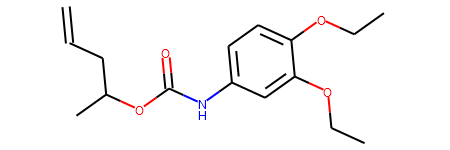

C=CCC(CC=C)(C(=O)NC(N)=O)C(=O)OC
[0, 7, 9, 16, 9, 7, 0, 14, 5, 11, 13, 3, 4, 15, 6, 12, 2]


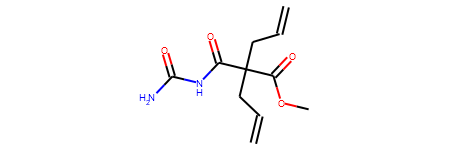

C=CCC(CC=C)(NC(C)=O)C(N)=O
[0, 6, 8, 13, 8, 6, 0, 10, 11, 2, 4, 12, 3, 5]


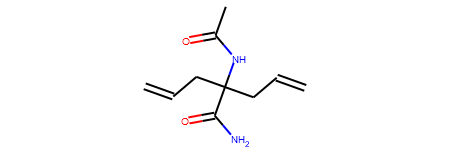

C=CCC1(C(=O)NC(N)=O)CC(C)OC1=O
[0, 6, 7, 15, 12, 4, 9, 11, 2, 3, 8, 14, 1, 10, 13, 5]


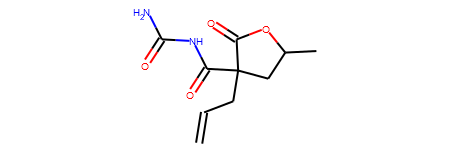

C=CCC1(C(C)(C)C)C(=O)NC(=O)NC1=O
[0, 7, 8, 15, 14, 1, 1, 1, 12, 5, 9, 11, 4, 9, 12, 5]


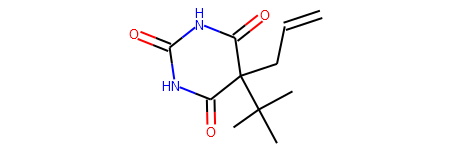

C=CCC1(C(C)C)C(=O)NC(=O)NC1=O
[0, 6, 7, 14, 13, 1, 1, 11, 4, 8, 10, 3, 8, 11, 4]


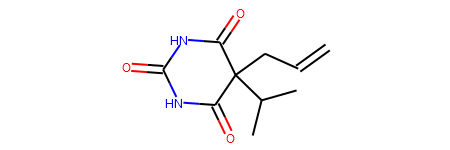

C=CCC1(C(C)CC)C(=O)NC(=O)NC1=O
[0, 6, 8, 15, 14, 2, 7, 1, 12, 4, 9, 11, 3, 9, 12, 4]


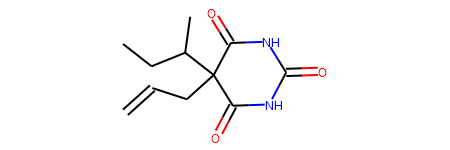

C=CCC1(C(C)CCC)C(=O)NC(=O)NC1=O
[0, 6, 9, 16, 15, 2, 8, 7, 1, 13, 4, 10, 12, 3, 10, 13, 4]


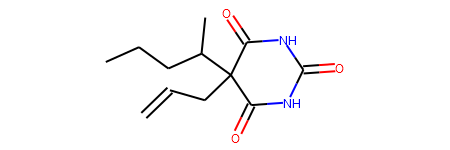

C=CCC1(C(C)CCC)C(=O)NC(=S)NC1=O
[0, 6, 9, 16, 15, 2, 8, 7, 1, 12, 3, 10, 14, 5, 10, 12, 3]


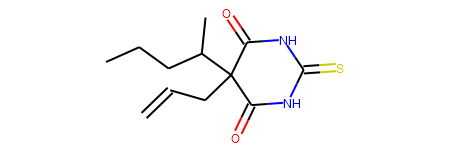

C=CCC1(C)C(=O)NC(=O)NC1=O
[0, 5, 6, 12, 1, 10, 3, 7, 9, 2, 7, 10, 3]


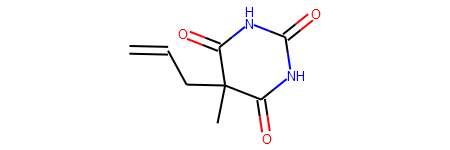

C=CCC1(C2=CCCC2)C(=O)NC(=O)N(C)C1=O
[0, 5, 10, 17, 15, 6, 7, 8, 9, 13, 3, 11, 12, 2, 16, 1, 14, 4]


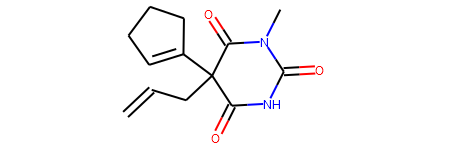

C=CCC1(C2C=CCC2)C(=O)NC(=O)NC1=O
[0, 4, 9, 16, 15, 6, 5, 7, 8, 13, 2, 10, 12, 1, 10, 13, 2]


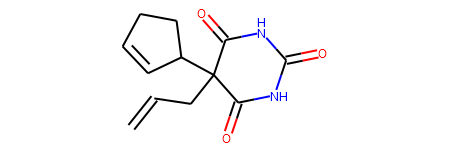

C=CCC1(CC(=C)Br)C(=O)NC(=O)N(C)C1=O
[0, 7, 8, 16, 9, 11, 1, 6, 13, 4, 10, 12, 3, 15, 2, 14, 5]


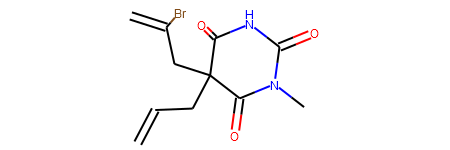

C=CCC1(CC(=C)Br)C(=O)NC(=O)NC1=O
[0, 6, 7, 15, 8, 11, 1, 5, 13, 3, 9, 12, 2, 9, 13, 3]


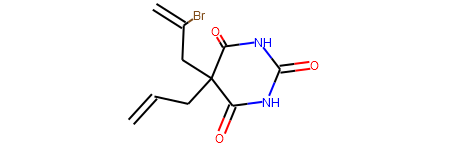

C=CCC1(CC(C)(C)C)C(=O)NC(=O)NC1=O
[0, 7, 8, 16, 9, 15, 1, 1, 1, 13, 5, 10, 12, 4, 10, 13, 5]


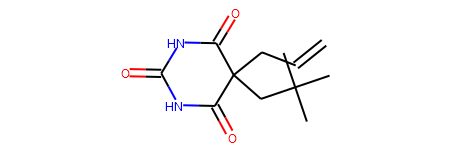

C=CCC1(CC(C)O)C(=O)NC(=O)NC1=O
[0, 6, 7, 15, 8, 14, 1, 5, 12, 3, 9, 11, 2, 9, 12, 3]


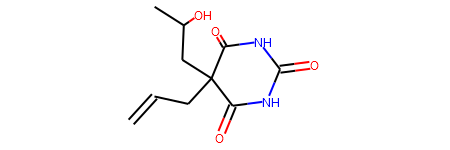

In [48]:
for smiles in not_symmetry_data.head(300).smiles:
    mol = Chem.MolFromSmiles(smiles)
    print(smiles)
    print(list(Chem.CanonicalRankAtoms(mol, breakTies=False)))
    display(mol)

In [49]:
symmetry_data.describe()

logP
count  609.000000
mean     2.617438
std      2.336735
min     -4.430000
25%      0.880000
50%      2.390000
75%      4.250000
max      9.050000

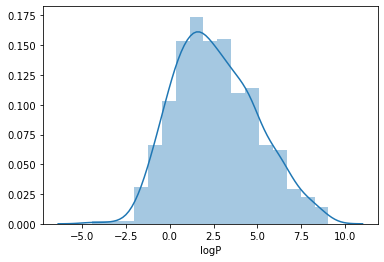

In [50]:
sns.distplot(symmetry_data.logP)

In [51]:
not_symmetry_data.describe()

logP
count  13168.000000
mean       2.101819
std        1.839059
min       -4.650000
25%        0.890000
50%        2.020000
75%        3.210000
max        9.960000

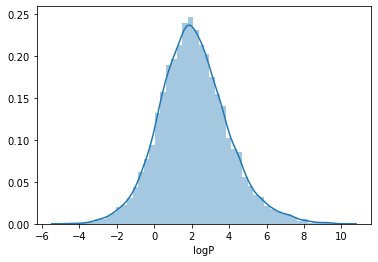

In [52]:
sns.distplot(not_symmetry_data.logP)

In [53]:
stats.ttest_ind(symmetry_data.logP, not_symmetry_data.logP)

Ttest_indResult(statistic=6.674423939990685, pvalue=2.5769942488178773e-11)